In [1]:
from suffix_structures import compare_suffix_structures
import pandas as pd
import matplotlib.pyplot as plt

{'suffix_array': {'construction_time_ms': 9.065628051757812, 'memory_usage_kb': 1792.0, 'size': 89040}, 'suffix_tree': {'construction_time_ms': 20.125627517700195, 'memory_usage_kb': 768.0, 'size': 177264}}


# Suffix structures comparison by text length

In [2]:
short_text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore "
len(short_text)

100

In [3]:
medium_text = "k8PHjpK6eF5b5KizA67XvUfZ6y9Reat6WrKS9p87v0xrLuApgpRAqGmcXgftBUEpPX7Cc04ncNc9fU2SiGRWzwWfj2mbEw5Dp8PQtfhcxUxiTLkSirNY7HCynkuLStLXD5nd84qKygWm6uLTFjZB5BAyZFWJbkwfquv9K9V5mgQLMAarqJ4eDBGiFXMnVL3D9c17Dh90zzAWEM8DbzgHjT3aqUueW7b7HXa6Xcqw1F8Ldf01ZN4T2J127zcq1N6D7qfdrUxFJAqBwyaexmbUbZviDVS0YcBkqzt4rHbS2JQ3TeyNQ281vAbLwAFd8160GiPzGHewvASixvAwJz5nMS4z0rj2PXJx7W4jUUpHKNpxjJ3nS2Ri3030ZTLCFVLdMjA71e2GQC68PuCffzY604EPBPzNJQJGG06TwP6R708FFpyFeMQJtyY43n36E0cmgpBEN3d8NLn97RcJiL5BWzFgyDTCAbWqwSjxzBAH8mCp0MtzQd11WkYtc1SXhNG5QB7ztU1wJxyrDJmTw7SJYtkHuNu85i7EePa2dWbX7vN6tWuwUhMrNneGqbYSdTUMge8FC0Rm3q67du9MDiWxdQwYgryz8W8fzEZr5kxrQ0gYER4UhN4v6UJw3B8M1xQ93rhuNTW76bz5UQD4YdMCztJTwPn58LiRpm3g9qFAPKDDqgRNpWpicYJJVXETerjuiGMVcPnvVuf5wY0n32TDvu44rgCBBT7QTY35NeCgTZ81kwAcvSdqq6KwAQcub6wX1CXSafrx3zFdTkCguCqKAxmTvZNUBxAZxxV5fNPfprNPxcCNyTUQBEgRNeMh2kui97Hywac9DzuESgvyXiyeipgKe1fBwDm8meHBtzz9ReWZFbf4Gzjk1ZrL4P9VGfChtdwGfdJcrZ402Z34PLdtZDn3HdFthr8Q5zXSKD3B814krB0Y1TCuJ2VTk35xYC78EcPq2w1qB8GmpAkG9eyYfjSuW5G2MB2mJV84u0BN"
len(medium_text)

1000

In [4]:
long_text = "tBkLiLRWdPeAKLiSTuYPPv2XLdc7exw4Z1xNrNELpEk26Uy3abA7KZicSDnygfuVUQkm8QV3xfNW1db5UiyhFCGV2fLtC9yA0HxJKRwrCYMiSjrwbNGiNxt3i1SMe9N05HjcapE66QFXQBcAhYVtm693jEw7d7geWkxgJc42puaPxGpHDcdhL2Xe0HAH85NucRPggaY0Pq46WMcE1ccTfpwLhqbrqULwwA3kKMrhZRCfnmVNH9K0FDEmMn6Wp4Xtu19ia1F37x834HXJiFrHYnL7r7Wq174xzkiKLSYNjv40u7pVkruQ7vVxrMdf5JTaZfXLcWZMiPyrEUgnpuQFdpLG23kBKTkQWTUd9fSj7knQMeBRkRh4G4i6mn0Vax4Zv6f3ZrBxvm11qaWpihUHxKuvnDiPf6Af8hnPYnBnHaEYPQu9xb5pdzKfBtNfMdCV8jy5ZMDyg49HKxxk549RJFBmjj2KXBcQxFdvVqSAdzfhqvQq8SEcLcAt7YhS1QxnQGdwqYfVSCEXj3TFunMe89HkPQZV1MhQn001pTuPXBJtBVBzMNrGq5ii4F0c4QbZ68Gx1AFB1GAukRN0D9NJxahVTaHv8zxxNGcqSbCNt7jHJpdXicHM9BchSHq7jjk85yDk8wJRe7LDVZbMtahU6M0m77gUcjY40SBwEKg7dGwrTZNG9ijPSnd9St9VkKLp729q1XVRMv35RDhuC94KahCb0yrZ5vDpiJ5R3uCFqcRjxbaV3DhgN2KADX39D9nAnZnweKNXUnUPR4umbdyVt9gvY6NrHM4ZQ6HRPVqZCfw4Lpp4cxQjHqpSawJZu7EL0vrtte47nKmwmHYPvtHWfgirtnKJNcJgMhj9q6vY7bmWVUvKygMF5Yy1k4uPdNXRrRRHTbEUbMcdygdWCap9T0zpDUfpJiqvxqbm7JuaqEZkVEeH5VgFBG8S1SjkADMS25MhHkrZ2Vnbp8rkPgh5dG89xF68KCg4ydUFzGp9FnKhmk0yWUq4iUvv4BghVaaGaz6iV6ie6prxm9ZZdd4zQwNngYbFGKdqThKTnnkhC6t1WH2LZKG11cdbDZRQTCuA048ggpVcnM98NVeRe8dcaYc5GG42ZFVm0kSx3YDGL8qgKvJX5ygK3ww203kXHXvkMwQFPEgM8tHKUJgScXQX5fkHELnKLjVYb5igr4Pc2XMiJ2LDznqCHX19wDDkkFHZwNtYCiDqctHY1Ph1ChZaLnY8nmC7SyxcHy67vEEFRgJXaHFLP6p3trp0ZVpxN1kED1Crr5yT8ibZHiGy3kWhW36FNwHPpdQbD2P5RpNcUK9TbCp7p3eFLSwcnxcPTmAtfkv34FBPRDfLqQeUZJjdyJb8MxV42brccrTvt3zYSAC11FNqSATfabBatF4X03a4C15CikXPtgngJxDBX6yM8Uy5cg5gCZ9Kitx75HH5LH3PxjXaehE9cUSKwDXcZBinHYu68dTpfjkhxNQ9Kk005SgU6XWaC376Epc4nYwHVamXVLAWQhAbqULWYTgdm44A7JPmpWeG5E1NX5ckEVic57G1MwmjQY5NtiYkDzfJr4ZNMfSCYhrjk991ut1La7wGuN2pPe7pBwDUhj1HBkXADuEXvZa2vAw71493Ynnr5EiphS7D5y7herhzzdFz9Vhm4Gba7c1u802QrEgbPadSb8EycWAExNjCD4SSD5G5ZeexwtqRMPtxh4dNLwCeLkBvSeEtmhLbRZAbNkGpG3wWPj2L3Ygh3i8iZcmpR70VGSkmeyLTkncf2RD5W0DviKfgiLUP9ZTqguwKvWD2i6S1RzMjzqF9F4Ufrp7i2BVvWNQvnX5tvfASDAxgKxv7iZj06pSuiR9WRybWD6yVcEjmYTmq6vpSU9YyhMWxFGT2D70N5mQ21qQByjMhXbYVb1XKpzt5ztHKMhrzEkztNuryC8FCBcE9qjL4u1D10Lz0JvUjr7c3XrFpuDGeEDM00JK6xdKKvMqwZZBwxvbL9tTU2MJ4VPqmuf3vHy4yr6M0AyRAV3M2KJaqnn9YdLCiGNCnndvAC0r7LDuTiqJQqujcvend6hmwN1ZKbVEdS3yHduPH33uLTF5HmCJrAtyZj6kjeESYLUqUXSkqSD94J1TwNxSt5qMvuVKKCH8h9fKGj7DhKeBU3q3X404gCt8gbCgqTBdWPMw8N227nbT4khTxzkPPbWWQZLLq43eumX3e0Qkpe60pbg1iYJa0ANdtSxKhtRrdBMWneZSejd0uCzRwA7eZx3eDCVW4Ap2me3SbQ5hiHFV5wb0SA4B9cZJNYCGgH7G4JkbQXvWSjPZhMinQp5vBJrbT8C5EtFH85gLjFc0XcuxzbGSq7YxdubbdK95rDNUn5SRnHu3gEnRw9KMgNrUMVkeupAVu7qDXM2WiG9Rk3FzSL7L1MwJYyptmPt3pZx1rKVbyC0uLjZbW1GSYq0RvwVbz95bC2Dw47neEiCHBwuFJLxh6ctMSctAEaE9zP2nw0EWFrn1kcp47km7zHGvz4YB94bRA7kw1JStn0uKzX7Pi8Rt4Gpvnuy8yF7gB95wTSvFnLf8EqM8Ry7xDAWLb2P1V2PPnFNqn9jZ6Pm7Kbprgv9ZVmeuV5d2ccWihMb8H6RrrWra4fu3gXPtenuH81yhcPCNb3jxfBzt3844AfBJJft0Bg8m6DDD7AiHDmpVK1eaZkMjwFuDMjCa6ekcR2JYSwDFVxXtPx4qnGA8UkabwtNx6NAr8bKi9aCgTgp8vJkrN2JcPzmBanYUfk4gXYDpg44hgCSMpQkWtWwyeMJPfjQvNtqHb5GikV6vKjcbTykrWYmJUSKNy8fQgVEaDfc8M5CNrRrqbfj4kNAaQepPKY58A2f6n0CEFEhzSqG3bNnqH2AFHYp5yBiaRTDMtJw5eBQgEGyXqxwCjVrBnKFvjjKtWFE24RYDrSXnYkEN2aNJnuGdzZYcywk8QvBkfmB9GtgQ9hZ1fwRi76xeEG1hTc2xxVqDaPxLREVwy4CnRU9McW5giFSwUGAKhitD9ZXWKmrRHcDcZXcD7LiafWaiAcQAdGQaKfKBrTUp4uJxiZb3B8EBTgPw7XibNanz8qkSRzGdUY33g00xJB2PvpfqKCekFyLfqeQueYhyXZud9MndwpCTMatKftq9MXcGRLDfZ9MXLfhbZYU4mDQVGT3cXcNJ7cgFVpgUqgKGfNT96bjp4fQAQinqXJ6BGZiCJzd3kYnnVQmau4nU6gXDR48fbVKUFapDNidKfpcL8R7YU3Qh3XQ7amcJFvAT04ZUTWgcZxDVc3djux3HAK5UWZWNhM82Zm8w7iEYSUMk8CegfZcwxUn4UifzRSwHrbyhe6b5yJuCS2Zpfv7SLbtSEUEmXiyqEHECTCg4SpWHFqqVbUyug9S59zr8g3CC9JDGuW9eVgBK5cAfSM0ANTa6LtPXNHDCJZhreXMNQXNBC3tn3qXuC43LXJd4i2gx42CxBXDSYX0r87rRvuv1HM49aNvWiAAPJvC4GhVvk4qqZnVvH7TECFyv06NwKjXAnj69Zn7DLEjG8Ar1VyPZiTXjaS66gF9Ex1TPhyVbDEHULx7QW9Nv23UC6jq14hjtvPSywwdtTpVAwJ5MM8ezwU0FEhkj96egkRxBudimn7eEag9dQAyDbcb8hgq0uND2fQK6G8jUHwUGFw3Jv7nSrDi03dpFbE5AtggY3uPEa5MZXEKKZ0QeziuJSQ64Vzyux0QG622HkgVp5hUFh3YcdxfGrbfXqqMtUZqXb2aYSeZPRbdJSFk2PrXEnNEatG5FUF3C83Uqm46v9k3vvbfPTp7Q7VLyTwy9NTDmQam7pJC5knp0dJwqLWGHREEMtbY0NdBB9NMF8Z0xMUMenH2fe1BT5uZFCiVi940ycJ6zcb5arC5ELxUbdqpQcCpLfEU7GzkZGf0g8pEvvBfYd5AcUSurpH44tae8qcUMAYwGnnNPnEfFR0RDxT0dvxKUQQz6F5WQmb3fPSLX5cjCUK7MbTBu7n3mpiRi8RVL4CS6AfXF4GUjXqLJVLQmtN8yuMweguTHk4prfZnBxLpKN99M49eBCREa75ucri55WqN9mM48vR8gHWHigD8B4Nh6ZX58PwkMmEH7VEkrFj2QLUCFZ4BrQXGBV7z6a8HMTRkrcGrcxFq1GZUiKixUG0qxx1UuriUAQGwd57M9ccLpQZXrrQdDvuS5BiTtd0fvk23uUwzrLtSAzXgnALj85Uy6QA06ahkemteutaWYAXz3ihKX10j4p0R4geEtCH6NMtB4FFnhddpPp0KthY5TpiE51dwx2P6inBVLBLHAdyvfkNhF45UM2KeBG4Ef6NGPbW6wcedE8buxdhyAvReag4mA237xZbhFbzeUYAgdjd8uy1iD9Whr9rk0vJUcHeAUxeM3kpZeHRagPz0HxjPDBEDXnAbnhvKaPN8byptJQYCZR38v1Xh8jUTdxrkNWHLdbgSRPFc0QnMaaEVwe323NnbuKn2RSCZ1jkBwUzUCS7j5cm8uaueuGUxZ1Zf7i9ipkPhAAcW5Bz9b9PtyAn8UD59R1rSynzqVgBCWuBVYCfHSxSx8EbCKcDuMvn8AprmhB7eA3FNjaRupnUw9J6CTk6wBYrkuDpRQEHWXSae3Cwr8YVfJphYU5XWZ4SKaMLpNBjcQaK24T1amf9Y6Wxpxdwq3u4XFvUggBEQdqATuPdmvShdpGpX0FqXHeqjhTMyYS0pzwBVw592jdRNhA2JCdj31SnRMc0xHKqunYcDmkDS4jRu6EAHBpfC9L62dAJCXpwtL6irrtdKHSEzaRz86uNhrGzP0z696WvQCqy4cWumtVXDNAQUNguLxutp6SULWnytxNEeAzwjf5EJkCX7D2fZKuCQNHVPGaNEXtfRSmKZB4Va1fxgAnYjpL6UqL8fiQ4WAwnUSZkyYS7fpAfk9ECv4Fzt3jdden8xyjNCURN0iw3qab1REzZKfmJxiP982nb40yUaDtUjZrSWG0mi2b2NA2pKab91chkqewhd9gvWU9CShT0qq0X0S6hmZNV7DhJWMtTJixVzT5H4ZBHqJ8yixWwj1n4LPfXkyF0Yc1t9ypcKerdjKeNDrgne5PupdrmY1bmzGrLX6c26KPbDd6b0eJgHr2K8B7qQT8JKyyCRKeNr1weQ0cvbz2WPpFq879cTd0yyDp11WGDBqdUcy4fUQ5AU0BKDUuGPgUDbkKv6UyRXbnNK6ryqU8rRc4EvDhACU7axVxEZDUM31g09gbmUUa0H2c6xXjGjzgzkAyxXvnkC1tRU6MmQwkn6AEU6L2YCqaeBtBba1vrbpMwT57gL62LzHD4ZHXEwZJg51bAWCnfcEwg55kT4Kt7hX8vfcYA3vrjqPEvr4Bh7DRhR7VgSZdPXCDPzhEnNzPvwqZ9fnUgrtHVKzXrM5nN4rn4ngXAbUivQAKDQz2ykdeaUCRy99HJVw8FWXSQnc60T9GFic9mXUeix5YGgckAFKiuNZg25Kwz0rXyJqmk8RGNweYZtZgHD8a15UbWPUSrfwCw4a3XnEeB2x8zjf4aDpPDBB1WYSrjTYLKSERhF0R2ipZxpzzr7RSxdmiEMGKPHyMmfiEQCwRYyBpkxiHFQKFRKwBrJLKr88bZcWB1ct02DYMAu3w7SkkFFZFAZWMfjDj26MUvbdjcdU6EqnESdzBa8zhFQvpAEVWevynTww2mNjyPYyA8GPWXBTbtgib9h1vdvCX3ixG9i8zwXmmdY1mn49VtR83nSWHKwy25qemv3f8Ugre2VLNw1gyPgHMRqMGdpeXtMUMJQ6Mz37wF20nVWhR1Z3pZnMJ8uzjTVZKVjZPLPDpHYd6xaV5cmd1t3BDD1aXuLrPzHNzctbTzxUaz9Rk0RhmvamKfAnL3xJGFvVPLc4DSMMq8Lr27fGXQ3rByKVNGhQZm7VE1eBvvHunDUpYGUVJdiUpEexTULTyD3cPEjReeSiw5EymMWEccHZEm1BcF069QnR1T9TccNx7MBZYXAaW6GfyTxF21xfnu59FD3j3tPcFpFXBXw77K3UJFxaTQA1RaWKc1i78zgw1uCTfrw39uVMtTicZ4Dn3Qn54VjKGGavhiGzM7Tq4q8THXQVFM9T1cfJgkMDMwuMEBRGVG9u1GfCHjaxzCNnKcwcAw9HRa9CS0AJvRJphephwXGBKi9amJ8vpw0FSSvKWAmJvUFBEGYrnBpGitJDGaPyR76MX9CRKXVqhA4aNghCjc4WAWrrDQUwnVMxPKYEve5x8eeQynYrcu0dxzqmCckNAw2z5dKj0N7Sem8TbBvUuTX4X4hcUuWbTNZGYw1SGvxw05HtQgdvkRVqeYDyZgB2Pt5ZQC8xv7e9KkHEygutDJTqhvzSNezzMi69QdMhMy0WTWDGxjL9T8BRhjk9G5iMP8GFSN1aUCJKZmE2KgeQFiQKwGFx3hMuDdvQMSM0SSW5X0JNZud9YKweZumXAKDeAMmV8QZEJNu0K6ijgqgEpwnqKub4ddTNc0PTJWYHTWP1UzTMdGqw99w2WaQ5NBAPLvYmEStAMrxcKieAce26VD6QmX3uJp8CgbtuTYepKN3VvchXJySFnK43iX8gEji3Jy40n9uiX01xq1Y6NDJa3jwPB2AGufNrCV0uKYHgU237GqHhKkSCZp28b8iH8JT3QmTmNSiwkbfReRUAL8JVwXXVYXe0Yrk982pgS1RtqbWAbkBay1RnU8XUv3hym6HXgzYGJLFwhZAdA2tqR0T8LUZvJuzwm8VAia4JYt2FuMa5UiXm1pi9jY2TynWNnBwegLu9d7ZGqJLMF3VJnD4aVYHdkY3thQKXn03AiNnTEFxVQNHa7PVASejvd0m2qDrMztkdeAX6mB4tqZ8YZcZmbuCy5dNY2puWJ0KjHbLe6iZNVdpwWxizgawaJ8TYVnEaj1X1Q05Zz45ppkZYDi3vuW1VgBEbjFPL6JBLNpvxzm2jHWAXdLgwyYed71ihPB43A8CEar4mTwwqxaeK9D8B0NvM5ybzhG9DWXb0wfUj9ipM0KhZadVmS10rvGjapgErLpKReWQEvhvaFqBGt9TbDaugFk8UYMPnw92D5RxjT0WSrAS5CxX0y0H1Hwr1qvUizaacW7G8W2fh1feX4Cdd0gAkFK6LU0BLLVePFjWJtn4v1raSLkeVmfpu3rVzxBv0zB6cNBYa209gATWyhVUKWyQ14zaTJkAMuKMkkQ8gYBeF8EzkVVVa3TJVjjAh5C205phdwM2UmERY8dmj3E1T7WnLkvXP1HcVv2Xr3PbZYN9c85TD7vVxCY0cWiGN5i2hRwVjkDcnUJwGPBg41p2meLnWGHezGp7w3Y2Zr0UyyCLX1bJKXicjjRtdNXKFay8QyX3uR0G3KCV0Zgmh30NPccVkGYQFXB0KGrvDim8ub6qRLdFArXnRuDvTmVnaJJcq89PMUnWjBuFdGq1NHVHfHj4LqmZ0WBKVNEm0mfKpW6Bz9xMUj8XRRQDzSNfZ4894hPatbiyqp65dNJdtBughr8BaKFHcY2hZ8n8Yfu9NDeqiPkwyVTmbRhrQARenEHtzzqW1WEk8F2BUSjwNfGvQmCt68QWvwL607pMhHwGH4wL1ye15nH4evczH8eWYrWgC4jXXGx5hdti4zdgyQjHc35wXZtq2vqKChReb2YK1auicEy3yrkxDiwFFaLNARUyY5t7cGVgUxe08dGxQD0p1fmKMA333aMrWhbKj5ft6F8mR0zKiHhfJcEBddaD53gptk98MWF7mKfaY8Sz67grvQugk02uEYHijLHYVpBBN6fqkgT3hWgZfM8HYu8WhcfecGbpKk3aG0TXgBAg7XXG4d5NmyA1K4yTbNDrTApGz8i11vZDNv5ZknGycNW17W19Jm7CFgZV39NPZ1F7KEY8hMCHS2P7Uuej6eVW8ir5qHbt7Wf666VhKBVVwFuy9H3uvz07751n9DHBw5gXiE57EGA4DWHnReywaHKvqk8RhjHYY79jwVDUj4L041nF69UkDuqggAa6Kh0fZ14zVPDzh9VeLtC2ZqiXQrCdGZ08B0WPYepLPMuTTfyuh9utKtaC4uvtiQXBEV9g5FXfUaiYrGV93bZC1hv3tQXdNXNvHRDgkuf4XL2R5mWpyxgSW17aL3VyxwitXzbgfjD1KgZb2pjcGyxwXp573aHhRGTMh4vBezB2AMkhmxWFMaFWGAkKc70SWrEEAh58DjgzF3YBgQP8Gy9cC5Y2VTnDgiVhEVDE215jZjTih3DmR6Zy2FLQDTXMFbHV037xzhGm9nEijN76dwdLegEDWRiFMRcbHBp1nV01VpuavvWAELpRai3faAExkjVv99BjTFkYEKhKc04rqX3rWyCgQnnujdPdJbxfmWKjjPCBJEfVxK5PY1WdbHMD3yzvN78eXwAq74LESW0DgNyieGbvkSVga1q55M3UNbEyey0qTakQAtejv3Cjvy8qgkuKqZGRX9aiC0FzdCgzEyMUjQ5pDYnDieCvHUKxbNMybSK10gYMZqDMF8KUK8xJ8BEUFhpuLvjDE47Jj8Dz2t0DWud66dVH0QFDjjuwj3UjME2jR6SBVuVt3FFACmMaxvpGCQSt8K9BmN25qukju0uci0AbJqqmVRCD12u3fjGTugfuBuZk0Tu5wz5P876ip1vihnQgFn7qE3gXNuQAg3ZScCBcPKKLH1igWzvaHWZbF3zQ9r6mDWaYqv7qpFQ9Gk6bd2nbn4Di8P8ZypextYAQ6wR0nk9AfaL2VUS31zyWarPq4ZVmgnjbGUxL7SpBh6jigYWW6zraz1EPnRE4ErJDgCeBAtURLF6nff4UwNGeKR6JHNwcBS0bN9heiD1g4EEkS6xhAVqS0iuJCrqTe46YvVhYQ5mxF8NDL9vYhFa95eDnaVKc9fa1gYA2xcwptTanDyn0rLjqx9VPigJdQPqLhyY171CStavFMrjgFPrSJzhr2cXPWMYBhbykV3NM77c0Wdweqywpgizaaz1RrZzKeT1xAepeUru1FhvbDbEGQvkuiR2tPTmYKQ9BUJYSAV87FgcL9KVpf8xJ5YF0JxMawM7vtGHr7UJqDYVem663ELf5Zg3Qbtkn7gM6Qbj3Mb2XLJ62TXtmFJmEuGvvAHSHkh1t1WXyaq8ZA8UW0juiFrPS170xLuuG7yBDdJuQWvjBRX2F5rZu6F37PMGnv2Ch7XUYH7qMSHkDuQ6XE6zxkpkwYP1wh0nMn9uKbwx7EbXSJXHdpDp2gge7zrTFMzRWLKNS4KUNDVSjLLZMjxPq2pjYRXDWBvuNtwAJ71LLdYx3N54gxZdz6fUm3VKcDkyNPWkbNZ1cQn3cbr1WfxuAQcAtznvLzVX2M4YFy4DQK1TABEL19NCAj2ZfLNeU4cUQnuCeiarFBLWPnKqxRE7uw1j1mQQVHyur8CBj3vqF8cb8UVSu8q3ZmFBxkGW9kPQVQHExt13AkrE0PuahddTMjhehCbZZSbWkrgWuwqdwtEiqxL15YmHaUi7hCbU5J0JjEYSPRE5EkwnQTyPpg2t61x9gqRAMSTBi2VTqy2KMgHGK98dNa66jvqHMdi6WZ3We71q0zJngHmUa5tpfSzUQADpeNUPMjj3n3xMvKbHVL4wRqMxpVNdrQk2AmXmhH5iQS8kqrGZ8Dex78h9BA5BuTUyvPfrnbpnfudwz53DKyXtB5drGv8UAej2dAZtkEAjHeP0iB2u85TnpemmC9HW08Rpu2ceGjBmE7L6eh2iiM2VwhDT65FD5PePJvudTvNzEhXaJaycW5JBVPThUagAK0xdAXrPQJYmn74eAYCpR4ASNNXYpDAUKfEqAjGBR5q99zp1LLaFHgpXLwpqvtbSUhyctZh6mwKDDSTa0p80qfuUEkjuQVSEMGZHg7GEPLzuG3HwVkHa2ZuPEfABcnbnjKA18hbtUcwQMnkDRh3Yb5irn8LWyA9ZYqERCmE7EmGJ3DWn7hSL4jkZ87GMbA5xjL8MtrD7ru4iukdD2ZrDu3k"
len(long_text)

10000

In [5]:
very_long_text = "wT5xGeHAVZ81rECuL5P0wg5WMUMvBYgumqYhgyBKr9RHQmGBd0nS01Uv0fGgb9giM0b3uSGJJdFxJJUuPh2JRuN5Xu4eR8474Kxkh8EHagdi7JiJWvD9bp73a6wZ194CeaVkqQAzZ7JhFRefnwD7SRURCDPRnTMgS4MYgJZgKtFBDVJgrhG2wCAfunrNUQUuE3T8iHek6niSLBiQM4Hyn8daPjTJBGUAvNHaAcJZuUUju608AA0u02NdFbgQfmMN5VAeKNDa2KQzjRRjDTU8nxd1w31vfGGHDYF5jL8yiaDFtmh2xaytDNARxkmtTkGUPZcY5FDac27qjZkhXaZUMCMvLYW6i0hv7FxW4jtAm9qLet9NvJLFFUyVZwWKtNcHJ7VpQhgY163P8PQXvM5f96xQmizr1dS5fJmD4Weq3fghm7VhRu6M7pfz6M8Bm1X4QFzLGZ6UERRJ0RwCkcJyw9U3V1dP6TaPw41rD8bTZ7nYT5UrVbYfgiD1L2ZKyxJQ4zj5AQQTrjCXHyUNWuH1uuSBLvKxrzx7GNU7zDXZ2w1ZRfGMDq1vaZ6HZu4krzqy1ZQuAFhWXw7U5dKb1EwA3wJn8MFf4jUmJVKrmAvzvL9ThbU2D0bhhPQSbhYTFE9kxD5tTEJyMuvv2xDxTicwD0kG5q6w9Tznb1JAxrWqehpZLuMN4Lk74w9wPyTUuZYJEVAcdkS3ZcrrUAXPAVNGWfrkkbiwSBctuhqpHtYYKJ3TDJyMFabb2hkdVeMNP8wzRG0a2kn9G1bSbLMyxR5qMJ8guby1bMnxG1GMPRgLdrCRKcxVFv38iVL758i9SwQH15gQaUSm17bgzBBiVLpEEtrXEp2Pk1v0uAWdqZjyiAmd5ke4eW0CaznVQh7f8p2rfn6JCNh4rX6UY1B79ZxNiYFbtp45a0YnHedh90m0K4ZeSt5ppmPjiE0z6JLn4iSfgnXTtzBSzUH4pc9KTHxn6dRLYBYQDkMffwkpKkqhhfabRwZS7feAiv7NPED3tn93KaK1quBkCneVzEURZxBn5CnXYYPncri62Q8BkhmUCvmTmHVkrVHPK915GMK6Zd3p6YKCALz4GDJq3pw4tCrNQjjRtx17KX15ZD1hWCk28yKna9QPhAr1PkzkihrwGv8TLQz5mzh7uhLVrrcvWVwdG5jURtdqKRDnRESddm6Ey8Agpi28u4WC1Jv0BETFqfeueVdKuEj7aVRvWRkHGbaw5WUgGn8jwzR7HevvXagH73X7Wz4b4QiQGedryx7RGMQcezLDJjSia2yGgfLvF7HwWXHDpxt2L0DMNt05wBdYfwW5YwV30jZ3LuUe4hfxv5iihe0Lb015X1ZdaGqQV79SJDNenfeLgfSnBnTQ3JQzRP37TmkFbmCiWiXJQGHpZC0tDDG5qAmi56DUuTh7jBuRcGmjHmnd0r38wXFmkUgcrG5Zw93B82DF8wWqfnz2hfET8Jhm2PFutKHfFKPmL4FWzWaVrJvcqifaETq56bVUWFJLXeGUncmnUL2E73M9ytVK6vwrym8ty1inXiTG9ucvktZYmM2hHHGDSvCrQbTeB7156jRpNCyjPbXAuwUeaUuHiPWPkR5WNUMQHtFUZzCxG1nZxz0CcmtLHZeu3FNdZkrpF5gHpbRgWYd58zDYbTd7WxfwW1E1Pt1qet1N93q0kJMRwd8jrhy2hVvpxqUEz1iYK0YCkw7EXUjRmkQQUFhvMGCg4LiBRk8PLagX2URdzxJVNpP1QZAZXaZgXzCiR1LUrWJaeJpuWxXfGnJZD9v28w2SJPPbjYjN51qjSjQvQPvw2MDS1SMrV2FFn68dzh4HBChVniywVxTfhDpZg10gVK2WNKn4eefJwWdjCi5nSY5NtrvVCn50K1w6Hg0neUfGzLwGjaSCHZ4xvxLTjMaveVZkr3147mNavh1wrEU7DgzAa3vRaEWNPcLF4LCRBM6zX7qpEmAZ7kGZT6YuppQfNXKfxjzxKgLZ9hVMNUd0gCZcQ26ZHPEDiPHKdGzE4hvRqEnnbjGW36qbLxX9Q3QjrpJB9bJ3AJtZfX3QEFVRfWm0CG0XRQUWCUpaGib88XZvegtPD0nEjn8xgvjCDM8UeWyiY1BEQ23hR4QXz3TinMkYSzfNbkC53GJQm3yRRb52H5nNjnweH1fWBceByqZ5r7FfUXp2bJ97ZDkmntQXgA7LBFBkZ5NAZrDNLKeu8i4pSUDhZLC1a4JAv74Ttiid4rDSmYdh31z5wRe42gF7YqpNgaPJpw92V2vafN1BtP627icBih2KNQavkqAANSXV60jf0BubTGg0L9WAj0FyKUTWwTfq49MW7KPrZA0TquAwKL5yaLJ99Baa7cvPcVQ9tytU8ZSbQz0TyxTYEiYWxTN18afvDK6ZiniSR5cSuevWmSJNREjywjwyC27y9r2NTmpPAvwqmCQLLuKJ96Va1G7T1rRfDnZYYiu9EEMGCCzGbrkWZeXwikupuZbdEHce7qvdHu8wG2P0RNFw5z6ZCkCfHU5RtSxF1Rpx4A1mXxVS0e001zDDvtS8wt0LJz9g0S25yH5fuuNurzTEaUQmZwcCFrRHYL347SNPBn81RtSccQ0GHuG8CSuawFrFmkZAKmp2R1YNpZThNJFpu3Ayhink5QB43RSKYU9E2R3QTygSPRJiESCFFFndc7ubZd3vAtLrCNvZbRtSrTQPktm4tLPm0XZyzc4JSDFecwrH9xZHLg771vNRcayDbr2p39J2eMt5mn9VzhA0G15ySH5PpyF7UtyQ2MUJS26gUpeSwUydpgg1Ry38DL3PnKk89z5TdcAvrkG52ghXdvGxbCKMJjfrWR7c9iYWq6zxqQ9DkSQWr0XvgWbB6ugZ4U4x0b5K3LgQwgmjDXUN2Avcw4UqHBJ6Rp5pM2M0aEvJ8aqh2DwQrXpg4TT31temgvURze5NiLLJVMURy2mu2kxy2T4gKbbr93iYuztHM0pfZrgn6dZ7mEkMH4w69YPhrJhhnDAjvuj9wmxG3vrCWGiNSAvTgc8Jbx16HEz2R9X7D8gKFTfWuJdUf38x1xbKVciYbpt99pC6nvqB0yRA0VM0yyt6RKd5V3QTxxeBUzDJ3eQ6ZzJHeq30uzvrMa2VXi1TEjtStgjdngjPtmb1B8tvGjWHba8Dd5wXduDLryU72vjewKDDadzWgffV5cWeUzbCjL7ghAkYViZuMaLbGKLnidHqCYgrx7Zegx9MCL8znZ8hwX5z1xCqBJ1W0CtGkBSgpeGKRwD37ZB1GUWmS91vGAk42Hy054WXyPvKqKNdAcV0zA85w4e4aHZRDR4JcDuvDrHbqtAtvceYTEzfyMmyzzJFXQdEzHjdif46VecW06KaheWje3kb3GdZ0CmvTm0Q77CNjZGAwa8zFiExtKqq2ztiZBQmBhzGcpUkDStfyY8KKAZNX9YEYfREBWAxmtbydwnqNCZeidzZQRiJWxEpfaNu9YyMdTwzeVLBGS0iaAcX9BYHv0xaETC9AXLGPmuW9UxNQGHfDTvwGkxbpjzcDBJQuiDYZLhL390WNxR4XvJMRD32WzM0AMfPZwR7Gtyhu8P7jVnCmYuimVW7J8rEQZAafKaUzL3CAQwtuP4EfrBwzSQf6EkATqcE1N7myQ7xHWWWDeRLZEpguN0fGfZzf5fTQruqwbpGRAk9j5K8CNFRRtdXGEf0fdxiMFW2u20dLQfeVCcPvLa6D6bf2zpKQKGj3qXzUYjckTvQfQ32BAqVEZJMGTQ8GDSDYfjUqghLzjEp2nhzADrfVq4VieaxmkFUmbMBtiyZrYkD0bN7DvZydbKDdk8Pm9HSpXDUHMxK4awhBWYq7DtkxukwC6unTTgk1HCa13QJDJXAhXYDmWt6TUX5BkqwnSMDBMSdShz9cdNjQHgdXugmGAXNwqVRPSiumGVK97WvDZAT5AiPGpvaGfdhNg9bSR63B0Xgp9EaA1cwWdCmhvudT2dQjPgqaKhxZinj6DFVaCdypizKg3xPMrFP7m1dEii4wNxmD7Fmb9by44YmTnj2n8JgHM1gYPS1EAztxQBuWkA7AXgBKM4WBaqRreTFmybh7efAd0AZ0u7kpjmS7QcUjbJT3YDk6E1mWpKaag3qgekXWvJXj3pWqm3mijWajhc4Nhze3WyikJv7zMz0hktKHnSbzzq0iPH2i5YnQmik9YetAFKu31x3WqntiLv6tEkMPX0qZmpANC2V8wvRF01cTUFxUwwXZyhKhjQFQXU2Y67QtfTcQmvjymBfYUpi5KtE7CkWdXjtxKuafiRqeqiN36GJSC6izfzQ8AtrrD54PhCLVhLjhTu7WhNXThxJPSt5KKUHcDTyCv4eWmpajrE8dRbmkVcv9Jbgt3nzka6uRJhHWmgcWJ3xGzmvFiLga9m1q2bHEkHpbJbcqEwVCtbr0J2ByktWae3rPMz3d5eD9CN9ZCJgYhr8ukTFuqCiUa4N7yik1Q6rmKjSzEbATfhFk2GhC7cH1uN4NcbCmXhBucNcXrzuN5tzUbhXrfrfK0DXYVtXW2zNmPL6iaQv9V9jiWC6CJhyDpDrqUfxwkYHLAZ8vxGLWjFT2JPHFKiikF0w3nUwyir0DgRQndDpbyjNVL1YA7HW1HmdUPtPRgvL5rfxvTZbB705EW2MXZntBcYxqZA20FyVYLxmBrGpFdDkD1B3P57aUKNueVkZg6k5HezBk0uRiiCBcdNq73r8EHiLbwnzfDNERHRXAkizhnemJY0JSeddpXyLD1qabHEgPf18ju847KfGr03tynt6Rt891fNezfzn7TyMCS1eDy5raVD6SUwBqS87Mt9hQL0YJbjdX6yb3wfSTUWUYrGy7iD3ADLwinV2FZVnymdya1FmqPHqxJr3ik39zMGFib0XA2VYPGXtN7qctGziya4hPfS6d3V3Gi9MWEdw5yqJSWmVyZu9qAB1qnUjrfSRKjS6bzq8ejDakEabpg4Z9gqfE4JyuzJ0cxuwUUPUBq0JuCvXX3wX0ExxBQ9ftkfJmiTrAJHfYvUL3EL55PY3SG1emdu4YiSWGPxc4m94zJwVG2ZcTZGnaFgzadzVKrDhXJxE45vjrNm5C6iyRAaaK1mMjL1Wmjrpxi1Hy7eb3eCkbyBH4v26LDRHXy4DeVigi36Ai0yh8yvf9LNLbpFu7GXJSD8rRzdb1j8DWBtxnLgAPNzyXpPQ2xTxAMx3JeKLmZf76Ty1T3iFZcHhKijpFrd0D5Ud3R59zD9tEHrPvR8Tk8WFjaaWGhN48Fa5xQ93qq6ki4SbFK8d3FtShezLkhj9g0WL1wd6aW5e13Teubf87SNVT1qVuefEU2fC09B59jGUuh4m2xxdu9dTmcLS9t7BxK8gtX1RdNN5rvqE8ELM8N9eaYGq8ErUiRp3nQ9nfmgM014WJkk70mJKFXQ7EPLtvBzqenCCJnGdx4rwM1V3zLgt6RJzLiq8zna0ZBPHN2EHJxjWNAnzWgViB7abndQydPnEwzJ3HzwjEc8DjLXV7kp1xR4YqQnpe7zzP9N2EgpRfKBqz2RNMcKyt5qqvtUJ97fd0cvV9UqjG4zmYRgzMaWkWaza84vXcJYBedVg0aaJ6X21VUtwNbbRucXt8MNXTS0Fkqr2EqM9bCmjQrGtfZdDwuZESPLLEZzedTDmLgVgan5AP9fTxgRakphUQcqkmm4h1hCb6EyHD4FNWwWBbb5CEZnMqDVHbkJYPRJe5h9ESRm3UTjLXBLdHSq0HXSnwJz4dWu161M33DMPCjbeuNgwxp5vS5Z8Eje52PPRKzLxb87PkxfwqJe0YB6f2Pqa1ggDxyLu14euKWbntEhWKt7RWvMgDVmDMm5QS5GPRXNSqi1KFXyLw48X76gpQcMcfDYVEwFBmz7iW2RVuGEhGXLcytXvNRA0QU3DXpKYBeGirDDX3dEMaZT49JDnjDY3r5YWh2e5BA6r7Q2cw4buvVccM5G4TE713EHGePRBrAKDhJrCyTarFc4gwuVtWPD7Zg0va1XeM4VeEkDfyfVTVwi3LjDwJ61WHd3SGWjk559r0ierbfPaCF1Vq403kjc4m9DPf587MDCN039XNF74RJWXS10NxmMftAtckJA4MC5VNSDUPmyYS568hXgj7DVbMf21jnUZXUWPDugLuzYTCzAzY5EyFBj6ffTDLqbm7Ph1zQ2vAnuMMpeWLYM5cQ3PgyprfqDSPaBR1t0ydPHVHMmSnURaz387PVeaQEyUbmvJZeAVyZfXa2FdhnH1TChmAKu62Hg5W66TiTJVktfxtqMd9tEaLzkjm0wfC7JYqGgUk4AQeMh86aYjELhMyBfLB96UX5jUkJKC88wx4H7xTm0vtYzRaWF9JPyTKL1tRHC2CQzJTjQf3Lcgqvg1TuK4ecU9dBWkzp34mKKtWEiuqvu5amNHZbhbri1XkpwSiWj7vk311Fu0Kn8Erxviw5qiZu6mXmZuhBrjjwUXJGq5R2h8PjXgArpDEWcaHUSjZ8cCpa19tmqTW85S5DRT4Rg3Qq2riSWdcPhF5nh1UjAGEpRiyYrYQ3qrvz1rm7MXhrGJApaDxMwU3YSB3HvuzWPHddzd1TUrzFwUZv7HcfiwwvxZi5cpp1TBtrR5cj6J6eTzJfXWrqpmi8r2iABnfSjAxZqn8Gz799gL6p1uEXSFgVfQ83YaYBLdnjxfNucSV0kL2nRYvgzGJVd7wnUnj5rifrDcTGEYC6bcBv6FuNZfc69yUuPEg66Jx3uAm2grn2grW9F67JfgqXdW5ufqvx0JBwEPVwXU01g8QnMWZarBFdw1p34JfAcJzzp5Xr76dwKVLNgeztx40U7tLQzECYjpET2QGkkwh1fmjX1TtYUMb7URQJRNaNQ22nBi88QU1KfZjN3re5eQmkWATipFLfnShnfwJQjEU2eZHg4zNtevYP1HQwMuiTFQ78QDedZtzBuKyAwXC225YVckSzTeeZ9b0EACgCa9HEdy5civxgJUwa35hG0RkDU0zbktQxYpHJ2JSGiDwBMNuw85F86V0P4jbRGNkdqmiG837g5TNeKAiJw9hUfLQK8ukmAnezAJrNmSGAzZuvcwcNq4EVtnVGM1AByGGHDk3a3rpaSJuLYcYh918A4mAVdCtWPSNiT8N65FmePzt422cENzbfDuTufH75S7NFXkF09PHWTTFC9UgtRRuNHTuhUbhekAmgyFinaV4UbaLHhxPVvHb1dLBWbvPgyEie965muWq8BzFWtYJwd6ZGFbKD08dzzKArcqMGGyv9YxJWcF8g613VKcyx14gtrNLei8hVp97EL9yucrKrXkLVqttQUR88uZCZvTXHrXzkYFRqZhgAQATEq81rNN2PKudgzvGNMGzdekPGKQvTm2HfUCT2KBNxeu9bJURNG60QcPn996SUgeguV6Umnx2kTFeEhW09PHPcEDCmm2Ckhupfidu7qk1h318Pd7Y82Mwp1feMbVqvt6mGTVYfi29XDdzvg8i77TqMd789xMfpx2fjR2X6dR7haJ1QnxSLwr2zaC9tWVGPf16H7X5nKE0DhKHJLdBYUZV9Bj7mSri1Jhw46wMAfLj7f2M5LU2uHSYrinCf6S7xMi2bkDAq0Qkvw2CDveUtLbhgi2aZTbxJm2UvBD2wAiz4ESyQb0ypMfmkBzDjiNj51RhXXY8BhXgEzcD96Ai3LvKiaK57iUVVWuVvdj5uPm3KP5QvvTr8RW626ZPgg6cXniaKiGCTAC9HjQ9fkJS6B3kZqfqpxQEi1mrmk0kvfgYb1mhw5Ck0CHeJANJcPxU0gcQGhS7W5mi5vSC7F3UXYBzxPfiCVagRCEN42Weriy5pchw7vBda77zi4HijSJkSRWb59mtqFWMbe2EGncHdYWGFg2gaKAQPjkhjNqjTMVyrVCv3aBv8hc7MdGmpSkJvDJJaHMjehpMk5md66JHStiAXrSFekmgU1LvuC02fhV2GadDG3QpRtJx9AWXLdUtTBBvcr0r3cQ421eJYSwSz9BeAPXih5RiSZRqHzBL9jYZchJyqb9SDckpBmW5rk6dZRdMa3HFBznXVrBu4PJSRPD4ktLEWP7rnP2mGia5CUcUktb7QDzq5VgK0dxtzL8uVEEWqpfMMu6mhfQhp2SvBE2yy7zRMUPzAye2NGKqdNvw1dRcJ9Xn5BGcQvxVkEE9pQwUDNkj4wacqYYARjpEthqTXk8PWcT1Nzr7AVYM1uv1BnqdGM5a6a9LALgG7HZCqRQUrzS3PZqpbBSuKh0MCW5JpccR2i7qXY4hfF6U3YY6VdHvZeaXXPP1r7QrKkpUZV6QLc0NKBgq0mpAjSyuKTYLZyetL3HuZjQSjZbaERe3ZFk0dPr3K8WDxjteZnaG7aAjEWQkFhY0Zkrt5gUF2UtP3k0DcbvAFFmM4WTp50NbeiHh6tVBqL7BCPnzr13688HXmtfPDRukU29rFRLnDfAMVaWmhK4W0K5XTV9RMKh6pC8tKyCwTYMC1R3Ar7xvN43R5jkDPdBhpyrjazYdQDb2qKGSwSj3M6ffcrc3W04SVQ3LbhqNeU5pbCEcdwPCXkYE7y3iCtQQT5U9yZQ7EqAE6iUVNtx3jc7G1ayB1WwCS6TLxk6HgS69mbYj8ncnU97PDEmS8Qu87P2e6xaqL6ZEgzxKKnyShfDVcELBYvSZweXEPy8KLaDuH10peT5vgpkFitr36bwyZmmuXaTzzATxaurEpubRkmz9Yf2Y3dMwA7CRFGBdrvTa1F78LhbCZJqR6pqBN4t5S7BSh3rCGVt60JBECwjWXh2V32AM2Sqp9gVjxpj0B2YL0UVANPZTbNSGRvK4pvEB00pJNt86Gihgqgef6apM2WYeQt8RXxnEX3YrGZCNTHkMQbzACfiNiGTwbBvhvDMdeRQaaydepj8Ldk3YHyjSM6mCi0UGUHD4rWCKm73vw6T3Z4NcWGbG2qp8CYhmJNh2eYWRrpZz6dwP6vNYcVqrYK4CCNgNNbj6f9LgkjiEBRkgmGS95waem5JJnk1EQqWJLr4XwDxnGwYkbtV0FmPzURDY4nYB3EX3wAcyDpaxE2jw9EeyzN08N2K4TArQrWJCDJbggTvgdLvk0VCEhifagwEbRK7k1kcyK0kGfBtRuWErLHGq1h5Z5C5CC8ZN7EK8fhKM7zT088b1Zjxbb9FaMaQjCcpJEFg0P4iSUZveqftFvFV6hLuH1KX9vV0J4tYb4cvzLZHLfBdPjS9mKVJLpcBgY5q0xaBxFHf4neehpSD311MXVYTErFdrpxarA3mictpAeQAFjK9GpApfffv4tHhELz0a4kqyA2UzRdSYG6S42dPRtV3P9DuNbt5DqMGyLrJR5XwCgnhBHLP7FD4DMYqkX1jgAvhLHnDzWtPXF5DW628NdhawqSuVYeqM7YPDQAgeJu6vYrN81D7qFAJvZzzzyP1jqwGjxPPiV9EddLJzgKge2UnxEY7U31FeBndGdjECXKcSBM3fb0TZG6T6myxBY3zG2nfb6k4gjXb1r1SbbBcZcnHyS6t9yM1A06LBDjUbY71hdm7tKaZyFHuGrNqBfvBG8Kuhykx6nR0E4bkrMSuQWUp45QBfEYVL39JmeZNghnwUdAytDUcHXeCnbdeQT94YN82zXye5KbAfJdJ36PeNfrSCEL9vQUF1mgZUBa7kL7UJLZZ1qczHbCjhvf8H1RHt83RURSEanCtnH4JRveQLZDJKLRxQh51faH2PSkRSFKHXeYHrhJhyekLPTeanCVqPYk0dSQ559NY2yCYCaXLZK5mpFfK7U4uK0xyi7auKDDrNQ3i5bXLi39j0LbkWEQRr48fR2z4YrKcnuthBVqQuLGSqR8K1YrujUzQ9XktqvyKzcuLdPELAS7M9jTcP4qXHi46jMEKXxNrCGfg4GBX9r0vh9RUvD2gvd0KtRPBX4Y5MbqhLY5CmkjdRVx9R8QbCR6zvxy2kzBRWEwZvADJUVurnFwXfH9YpSVkUdqSVvQky9f1fjc3DKQveiGNFKcVhDUCrugY6brb0Jfw563fwVjtnejuuU3BvDpDu0F5tmqcATgFETUvZ9R1kBPJu0U4n8Nz4jR7jk7Cj89qNHge3rWfynWCtmBfKjZry8BfCmmJbEQH3WiSFektBWC1NUykuFbydBCgRcnRbYY0nTGV91Vb6pMeBBRUnjGbPSezrVD2tAP2VgK9C1JmpvH38b8LA7AphHy65yNUgRXwGg3t5vcuDt90mXB08wigr0u0z1SHBX1f9uxjYBxdWthevh6BLYpAQrwSJ118etwgLWiPJdHc15CvvT3u0ARbYJXF5a9WYyrjt0y0jGf2HD9rdi0YywFGVGahM7RqG9mh7WwiaSw0xwTpRg6Z6pyRY3BPHrJ5WVbwKgGn9n6ktqaM1U6dD38f9CBJYqDXfzDCFV6Z79c64Pfp1q8hU9YUNgb25j6LjtYT2cDbTm5Qc5uw38CJy5dZEA7czx6XUHGwH8y4TgrPXc3ebx57AS3E1SjbAcDJjEkt9VVCxKR7V6xUX8k63bYKXybmAEC802GBuDe5Fhpk2YurLVQEifm8JaraxyQQiUiAnRcnfjWMriVq6QqYn4tpWfvWAnKVD4m0fD3ruR0qVa3QP4Q7yyLwu6jeTWWUG9pe9N2uY3fyYqvGCHp39KA9J0790V5wLEh3cuqL5B6FT4NN3YDz99netxQx7EE3w3t2nWXQruyZ43j1fgCbWHmxiH4GNicirdvUDW5dVKHxKHBhTxb0rehN7WGbRNppHX4Auty4hwfHEdvGz3EtjwpL8yDP5J1x8MPc2kPMT3e2xTjjjfV2511UVTfznmhNUXbvHVqiQy0w3gnNicLYTqJSbwKKn9GMTXiRrkv4ar8NyqCy4mtPBHvrn6CP13YDn65L9JRRGNi4wXw1X0jjuXX1FaUtD00tr51aBN9pPaV6eVGD8Et9NpZCW87yJbhEdtYhfX7X57UUyGwnPNq7ZQy3n0MdEWfviD11WT0uqjrrNwh8UVcAg0LcqaqFi3L9y4PjL7HLwCgqWN3R7Mevp5pvm1mhZ0TEDSiPhkDDwVKJ0Am5vH3mcwVvPY2zEME1u69tgMD4xbG2PB9efVVCvWSkTvddJMz7fUNLRj652U7f7FQh1Dn8YiB9nKWwLnYxTgFUf8tHmQy37iZ26k8bRZ9mPSANkhZGRUUrTa1YfRUwVkPzW1mS6vBxWt0Sn6EJrk9aF42AXh9AU4kE4u7xv4RQXwjvwxDKH7B1YdViyMniZbYaUv6DMpqeUy7NgYQw1DfawYz8NyAWJgXh92T3kuu0rG1dmQZDjjnNwMbj9nDr3RXx9fXqaeMXuaNLEqzw7uECLfj7gtNzwyRG8FgAjfTU2p5nYajvBi3D011fnAeeHRSi42npRK4wP69uDwLEziKM6c8d7xB4paXa3UcwA3wyYByL2dF7Z7YYxBtPdPe42B8pPKm84cN5dgiBY9jpr0qL73xnLuQSGejufPzMvSN45F4GKnLk8kjM1gS9mpQkCC0VeVTW41ff559KMtj244ShqivTyMtCptzjSB63Si9362xecZtZeevfh0QvaiU8Y3yv4bt5aBc1cV8YHUjf6ZpL0ynwTwc49eyDzrBBHTFVJkKZX7fm5pKc3imqGjUZZYE3hcMBRMWimiEeXDyabTnWH3N8UX07GbWMn959xNDndYWUAF3HLA03q3qmBGCbrMKPGke6mQM2XdcqPCSvR80ZX45d053qGfZfQU4d0efVWSjDXif23d0B51VNBuYvUwHnuGzfUmCzUwjxYyYbqh5X8JNEKWYnVkDyEiNRdr4DPkrNpnNdhTHp0BtwYGFrRRypUbp0DjPPgxfdDWg3HLUPqNdAaMAgcAJ1piy3ndcDtLhnvSc4yNGf3mhZCrPeMc1Bw1bT6vQzKrq4LQLBG3NbMSmctbGa8LB000M3MCqeRJ2zMVRx2V2uGzZUTN0UTm6vMu4yLFnpNkCFSfVV6BUuntfrfJNF0pjrLjiyv6hTuMwTrrR6fqR6kzWWVqwS1LEJgri4S5k3rP8cN60keBd7MKPkQqVCb2B1Nhz8iDHCU3NAA75Qd7fmFS2tJHKmp9fGmAhmbVYNHqQxFbhAnTmrB7RqjkMDv8gPdeSGSZXcKmVvkMC8QjX04pUKE3mhQ0BJyjQaHVDAam1M6BXtUkywM92Jc5NRjTiSmRd8dWx4bJNyy4uy92NkDNN43LVStnD6p6iHpM61EwChgSMxfNrGP8KkFbvAKxY1NbKFc48VL1UdPR5m926TgMAdirLueLnLa4GMNujkk8wNExkDiey7WJaNunzz5pitzA5nwyyCqip9gk6iHMxQ37a1MLV19mnDhDt6QP0erY2egacYb1jHJBUb7VSc5hDph1EuafyR88ExkixB0zm8vTP3gpubGvZa5rTtjfhF6hQw7TGz5QpPdaUZNL0CZND9TL9dqdpLT6RKfmr13BEPZJQKR7UWnxCq1xwC3PGVVEqA6jXJKwDWFUQm08MAV4tharprEVT9LPKnbFtWjw0XacnSjT0MrfdNRdvbxuj2m7QhRTmPX8jK08W6SxQ0Uv2BbwCxexKegp8PKFfmUQnqaufxhy8acj0uwD56VgS6Y7Ftt0riVvprBpSSVLj5HhgUXKgmqUeMrNCRFWAH90k51hDGkVuVjkyzT5wT3VBfBGAKTyr3z8pXcneWFg8j62cGX3fSp4TZBDw6WnALDMrPqz0fyLBSJRA8D0dx7nnBQv89SaKCbcyuxWvPjWYTkBvT66AGaqBq5dbxXpLyhFvbFtYN9GD48WGi0eMyx4x6iU5q642W4XCceueeguBuhFkUrnGNyywBx5bcw0d9JFHFqGSKx9xYSHENcpT2zjF2xA2dvXPYuDedyu9xr2bU1RRarBKRMzB4cNZY9xNb7UNCgWexraAL2U5h1TW7YjyLfqvW9U4zKJhDixccKJJiWjn6J3RmYEXKqawA0ZmAPh5KNmwk59Kjwnz0XpTF9qyiSZUbRA3V1rBWRRdbBXuDGKKu9Q1WvaYHRDZSJ9jQLiHZVGVgxqaZfNiYKVME008LuH0ZRWniDEhv6ER5zR0ykXAxQBxbVwTRuRuWrwhmM13Qjj3GyGTXqmnqGNqNmVxzAKabKfhBVeGB0DwiSzgUn05xg0QwViJzx8ryTcC74ZCVvTFS3xmFqp7fngULge8NCvBcydEMUyWnq9TJXTechWFu2VpQ2WEN1KyDwzK5bSpSUSeUhq5naWBWQFxMBpjZSFWHtNKFAS0LDAZFf6R67tDJRWBu7MT4a1mWAcGU9mcJ9J6QgLhGdV7MbbxaADacWCACDMgbKpcyFLP6J4q3RCCcDDBfyF2cGTc2bWpyQ46KjZae7iKmmc47daxmakcKn0BzHf2grB0F4WGp3dcLL513RgNq4b0pBhDDLzTaQ3JKYxSVM8GnK3U1xEEKNJujP2cir0cr55zMV5aEbAgykD1BzupmmcHdgYWPQaZjF5UrxWw0jvt37XZEKPauguSKcNRxrZ2nNzuMe5LCMYeauupiSiTU4yk2d5bTWkyWt5ZZkJmarSHUKBvfkWhXCWtASuLCTMJV4N9kafj9kegkWcCE4BD330HiNGH0QJUvWrUZSMJ3E74JFn3H7Q7v4Mf15aUWPqUgYBr04Swap94DAYpbLFnWnxy9AytmD0vJ2hLuzAGu0DMLpDuPjUtuLSWL6nrCJz5Cefyq4FHFK3ThMdeWFtiJHuET65RTxSvM49JvKkZyvYLu25mrBb8a9vApzUDErJKDfzB9kbPX1L7T0SfqvgTPrF3Eg19Nr6D69Aafew8u1bHDVt7xZ8PQGV9qpCB5JtF3ShPASN5pWBuB70PX3gMp4Fg8N87cN8R7apafXq7vC4MLQCXB7Lfqp5M4c3mZCxAVwEKnd4UGj8Ai2nQvj8W4ReY0bwaBQVqBCjdAi6VAXT0aJ2Yynxr88rhpz7bnBnjyjqGbYUj917hiZDnxPpGxA5dTHwtdtqGZQdDx4rqX1zZiNH7tLwWSSLPUCXcFcH5FgTk07n0vhmMnhjFZwa7neLQM4KBhXCmtceGSUzeYKtWx82FVJ1mW2HRvmiiGmUtNYzQ2zS1LmnP15244L6LkLYtfQB3kPHEJn1QdDCm8S1N2haDfXr0fBfEPmPp1YpZbHAN6Z2000KyJNZcX86JnXifzMbj1Q7Q0xPjqgc0X8Az7J6Tc855NdKUiGwhRzD0KH0yrM8F3D3XCWtAVMEnYawzHeq5cy5AdETSLm75W5EYDMHjBR9bYi4eKNKVx7xyhv2GjB2hWhYXb01k0502ufUTdcipxEJ4TBPTitBqYrfmDWYzNbbwjaAJupvT0ew40FaxzWjBdQ4LeyfdmRv2Z3ha6iHKuTjWNQakHW7jt3UtByZfecnNbxuhGh7nHiw7EWmxMK4Jz14d5iJFxTDW5MuMq8kEYrmYMtYSyQMebtN0MBKcDtH3RuL9eZ7j2DXmJNZx40dbAxTP5FpHpFeFNanRy8XLSzFR021TVBJtUtBCHygitfkeAVF2vvtJArDedvWdJN0PyN9Jnh9TuKGRWWknk8w6Jbvk2t7wLawTbt2Zx5mtXGSimcKk5knTZWGucMZ0arMytZSNm44Kugd8FepVDmBRquQYQJ01vKu1abcJS5qRNwRfr1rHRMZxuZDLRrvpVFHi1zK5A87WJbAFhqAS9PBbZe14tCQ9DFzJaTkpxHLCYpPu0mpvXFEVMmFi5pnYHeMamd2n9bKiYy3Z5pQJyLZQB3gXex63L47Gi0rm5cXBCPG3vbxg7JhTh7DWy3D3FicbHL6f4Rf0q7u7GYNUTexjZeRpQWhc8pkECzWP4AL5QZzrLZkQjua8kFNA0Mg5XaazH8C5FxvREZP0RZPgzyMgDVLinV2nJ9JiSW9HNEXN8wyCypRSiceBXnKN8959ScFEhKQEf3d7mi0CVA1ZbMwAuWGitygwVPRcg3xre0xrKScATKev9PxUrjAYUYvhvTgLd4pvef7bMYmwku73qpHaEewveHg9Z1FVdR1dhpArif0BaLi9acxEzvP5P4tQn60ARYukVg7eHMzU83NzUaf2qMLaJ42r0VHAmczCSFZJbb89ETJ2j6UPEbZLaFM2M2bricvJGrD0eNEtLfrwqmKjQ9Smgd4fcKdgRqupq4XkW1WiMjXvbApq3UDzZn5cZ6B4fyPdTY7zG5DMYUg23k9ifN1Q6UdCV8DNV26EhuL5WhC72QEEQ1F9bS3PJwC3eEnZ2Ebxt1HHuPV1Q9igPiSi9frBx4a61ru0fdhPJXu3PZZaxim76StCdrMcD3twdrnEyXrhcbufZCBWViRc7vag1J4LeY4V7J078Y0PPQQAAkLtYbbASa3kJ70m45NDJAq0Yj5r7TXit688nFRaMHaxRBXa1yN6H4hJh0w86fT8NM2qn7nrp2bKy3MP9xJbTLVX3mS9xtAhfx4W0f4bwcwHkX8Fg0F9U7WYuShYpQPFv2aeXDuJNKWb1WXpzR9FEZwpWqatytTG3eLTTnMh4d9b4Z0aiuBGLuHmrhPBB3Zbe37hPGgUYHQ0SHZ0BWZHNW8CPU0XK5XeVjBXF0je9cTgwdwKudRBmrzkGCrfXDrLWQpqe4k1hRMW0Tp4KL6HUXPMTRvLNUwH4gfFBGD6yyjwgbUV51LjiFAQizkjv2eSDh1yXw2tddgy21pDbLPyEPt8W8iLBjA5vUveb0ZmrzceCwbmU2EnAR1RaJk1nkHcqz1NMZzW1xtic4fmbCv5DUVY4vAdqBJVQbfyuZwSDRgK7drUmAP8gQWU2fV9LAnh75g7GFnDKSQaJi0DuWhaTXJbQAEhpEg1PKLkTb5qB2Q4TMdfQSd1bewujQ5u0zvYEf0uZ7bELRd2jzPWdBR7maGYVnUZ3hee1ctdTuXnEe9ydSHtYBY1u3ACayz4FiBPGRd5rWKxR8nrkvpwwkCUy298JQaA5CL1yD2WqtAVBLKMywGfnt58UASPpEB8WPKBvj5wtzDdaDJvehk1gXKnRCyubNT1Wc1r59yY2BgyxXLik1aAWZaGHZHUV8pPvAxJ7JA64H1VB5gdPFpA6zpxW6mbSN172ZTiD2HqbwGEBNv2QnjA4zL2i0cnMc6uzDCiLX0V2F5haf3hWTCx5fnz3ARrd1fmJ8aUAB6rfCm1iDQq3CafUrkyCKVQqnzR1zPA5TyeMfJZBLn6krQiugQaPnA9Nr6KTPR1E8CeXCwpX1C8acxNxBM2vHFc9954agYdJrGGAdRWZfdcnh5g5TXT4wrhayYi1EzuqYuXC7YiTKhn9kk9BNriHuQYWcd1SzAjMVqVKRbJKbZUi38Nw6kLdNEJXzDRtTw3iehQ9c54MFgEBSpmVPjQtWNDfpmL3Q7uW196PY7JZcrzXG2x9RKB6hdyh7TxvPPbdThVyKG9MD0kVb8eALgXMqUdAun5GTqM8STfh5Hb26nVPbcPZBthZ6UqUVpgL9LMEEPULNbM1ZdDyec46UECQb2uBGWxgQfuAXLB7gfdyp5Z9PAkUXYftZEgQC3kA6vmYSQASZRGw2JijUyjv8Dw9SiQVeEwXdKP5hKQTQVqQbqD7ctEVf2MyzXh9rW0chmzP84wxuven0hdxxevrqY55JkTD1EF6Bxt6p4zzaUWp1bWY9r6DQp3S3jCreiKXnab1bzRe4HE6pWyzFS3yXX9eS26DTNvSEvR771u5U4AGGK7XKNBwYC4ND8L6yiRaGFQAKeP3UmhcACkCk4V7GN6xpyrqNgRqRGPqHE81xui89RRQinUDpZuY89vfSDiRFnV7BcTTvbdkw7uryBZ086nkC66iubkjgtj31EE2HGkKHHavHk1HN4S5LXECwZXgdaYHQBK3Py6YUkFKGk5jGVxgZjUVddHqLE4M8HJ5y3a1X3z2fypJagm5KaM30fh72bKbnpp3fKPvzEVpgJa9rZPWraRkM0Lzva6VmTxTAvr1X3jcrujzZV2GeeKFQuJ8mGVR09wndj1ZtgCQ145Fxf0k431h0L2zV1T0kE3n7EvB6ZMxnYger1GcxU8aafxG0wp3KawCZmSicvipFSkEC0xdV2pDtWpjh99Lq5yAfeBy2XSdnRU7ET3UMx791enFkd3APadZpYZyLrr0bJSzn8BCwd1qqPaF6zx1gj4Dz9EGEu49k6cG1uvrTaJDn9mCW9Ljf7HQhqMkUB32gDHWgcbkF0KMfqLB6pVyVM6zfgKrnr0tyHSjpDfgZwru06Lg0V5GGY1zbTgQBjLgTYgmJfivLguLU28rwdLQ0ZMwGhhY3czY0XQAa0ZpVLpVLnjb4rydijPa96MKRqNxJ5pTHxN8v0CbPUuCgS6Q7XyF9Y8mHt6p62CqFd0z9FnaM2Z2ByhSBjKUT2nraSkvfctJ81gf9y7u2KuMzAPLKgHyJHYNiQffdcC7NZgBSDJ6CSUvgrTMpEYakaMy9ZwPiZTd2tLfZeDcUR50kRHW6w7pbPX73wxRxH1uSAZjZgQVEZvhZQqZRbAwTrrYhX4VaaYLB4eu1qQ21tbv5jFxDJ582GacTavnQDPuZN9YMaktZc5qTAMq2GvrkfMZQ0q4H2ruADEd58MC3VnEF8JW2iXcDaGrx0DkUied2rQtuhrtj8ZCwcEhYuLbtBNNJMWPuBYVuC90eWEpQxZrLdumKpemZr5NfHBNC42GwpKpviPnVV82rvGGcFieUDY539LYPZUP1V8CijxXW9FGVWN9849i2WYJkCvwx639zY8VzuTP7nAiX6bGtgdu9vv6mpPEad3v5eVzgwQUJizuKTyxLfgSN4NLKK4k71JV9wYCGtrcUFYviWAYbBMacLXemKTXYHN8dL7wt3dhgNU0cVjvK1tf8G58DXzRhMn6LgPwwA7QySGG6Ytzyz6PzhgbtQX3NfJd3Bk10cfhV8KJZVV8MzdHiKGd7LH6Nt2qUYDLHqdE6k4nRE5EHuHggFiapMbtTAK9m0ni34xWzHgPqACxSvYcdWkDzQCgaxuZt0BYVSateyrJGLb1QN14Rt46jdbmn25LRfpS5t90NyGbZTFzMina9GkwUWniVw5wDn8iwwuNAy0f1XTLigt2iK8kciFnunX3LqxtBx1xcBGfEnL6PMZemhCmMWad50uBRdTEuvSWeL8i6hjFVneaZtA4pfTMzByqxjXJmFyLXy1SDtvdE5mG63eKDBGt1Ry1AyK0ZDC0n9Sy2BmS6evnhXViZ8gRU4iiXhrZ9huQbta183vXQKqtBdNHiwH0UQJQnZtAS3rXpgCmTi5tpj29gVhWfHSCdyZdXNzzFT3aZC5nj02rekGcXGYY28xDUCAbUZeCmxfFih3zEp7NS8NwKE9K2Kt0y6gDqE63DfRbRA8Z7pU4hyx4wUnA2gzTLxAzGb20Tr1xFM2PFERVFvvvPBhuZ8LLK79vdjfrwvDVD3LRmz1JNrnfCuvE0nzrPWiraQvdk9XCtGNUfYuhEdDSF7HaU7tZ0jGMtyjETxn1BtNGPmSz8d1mU5EAAvWPanYqULDhJvHK0LA8kYFxanBd98nwDXud860eZBHwzt0SGw4jVAvLUVZ2cutZumvFPprCmzPV8Nhy4d4Qqmzdtjfdx4QquJej3jj8938EUJ99N3EhtgC2fk6YJcELc7k9dMtvU5Tfk74XxnPuXk9uycvwuAjWR4epCmnMD1RtzA3actBJnXQtutfueJ1BvVJ2UtkYMqXzq49SLhMKxhHvbna99bme9SGCqMYzpj3kaAZnS96RPQcvw5FduCczNiTZV2g5gV09MbSQQHebDDCvnm8xA93aLGPrdRG2Lkb4cgxWhyJ0XW1kx2x5wjcnmuq6SgCDV6UL0zdmGKw4zA16AQBTvFS2EWv9jtVixqB7Btj8fCpNv7AcaZ5Ut8mMynQkQQWZR0dUDmSpfY7nVgJrxvvBSRM9Qm6yCg5JNQG7671RgEBt4J2ErXZb2ydQWh023zivyZy2jQibSXe5tXXVESfg4DHRDn0ZSfxk9YRxxPaX9NvvKq0ewVr3QbWJ7iEUPhB4GzJAcdxBkbzgcW21RzL5cm9XzgTXNtWNTX6r1Vi3aCzPHNxfqTVB9pCTUd1eHaRxPzcFGnZWvt0Bph4tkGirQYgRBMww7w5iaS009ZptfMeZMa3EmrjMPGurC14VVYBeZiwtAWiGA2jFi8d4vAbjUuXemKQL2qfL0CDPYHqnwNMBpR2evFmQeaW6ftw0L8rSnjkLhRua6T8bZhf81z0yL0fh2Avr4bSb2Tj09rSXSW3Mvwt348MykY0FaePu1X1TgKUNdye9YMXiQ3itTBAv7n5qQuUpBpLEfXdFFhceFcx3LdZ1WUMQmFQmLWmQjPWw26hby0VQrJHpRtekKVuNcbWh9fZ9Yhxm3CpbLRVhwRTxn1m89p86iyp2HdbvGwiYhxy1xvGkhYDPX2Xw6hQf7W0NAeABSn25U7S02SvV7HcbMEediV8Z4C8im3bQJTjySkKD1RhXSmnN57AWqtwSu0Tc1a4uGkwGBDCD66Td7EGtEtu9rVitSea8Ge7xFjm9PiLjSd34aSPw6MQ1x0Lf8HvLfxTfjRNv8gYDM2gmE4PdgMHuzPqmQDbM5SDHgTy4xFgcLiRgrjBxakZCS76GWkjxZdbNicBHw0hP1Wav7hSHNtyUczB9MipNNn2uvLAryPPSWSTXgfNN4HUvwAQfnC2hNZG1KS8jmUxafUCZJUnk6tujQy2dKYvVeQY4Y73feZprbBdfhe5vfifZe8LdRpFcXfT6LJ0QeDKpCVX2JtJdmXV8fT82V5KFyhzLvw3tT9i8E5miMEh9nktHr0CgSYigTddJjPHC8cXxb0HzAVugVbaMfWYAkNHMDf4ZVU5Teq2g5wkUCEbgva3vhwSRYCDME1Md48PGf0Sc9p2tkkNjg154TZqB3QRVTBESFjGdhUuaDpT3bmvnfcMUZEYLiLjY4g1rihK1y5dRwXbLDBw4MBASBwHrcaWkRKt4FV9YmDqMmauztMHRQKAtfT9n5BtWcRLNVugphHD921gKxSpRqK8ZmXWxnXNFuWkr8GLWTdzgA5VQYt2GYvK1BdVw5aFmqJWNka9QuVyyeG82XrryHNUv83RWqTvz1p7zcnHDB7CXCUByUUwbr0vGpR4c1mCWGxqx1wpSU9vjrge6aexedGX6T4VYK8DA7RziwTVxRrnK0xSSbNfqjQ7d70Xtmt8h6K51qtHQvt3iPPAMyXNk58uWb9TKS5BKVN9MfZJCY1R1Hm36UUDuu1G9jyz0c1vUHK8HVXCNQSfTDA7mM6ug206YNEmYKxF89LjrVXyZz6SqRCL7wR9P7ucYX2uatfQDNdN3c0Xkhi1DDyNnfY3zaKaSbbiGAyVv2LHD9h6ddSVuAGVxrw2niq1U7BEvAUfzvYMvUjvxwGiADfSa6f3zHQVeN8XHVu5RDWaFddbGajwpVf0NZrYUWwVkE5B7UgxrpYKXPx58jgtEJg99VaNp318zBztc9gtLi6AzmcN94RrXNPqbBgLjWU9Nwwp0D8grhW2eayfkWERRJbDwE0ctaXmjywPV7TvbK4hw30CWHTAd1kWCWyJwV6dbrmagihC6FKmF8VMRnX85PN9ixmchZ9q7tjPSTfGejm93w92C9EwrSPTM58ct2jEQVUpintz00HRVMWc2ugzgbdhp3vrVQdAhWCk1iFSNZcWnbcxP2iEF5KSHVY2EkmPp4TqAeRpef53GPTCA1eBAhyH12T0TGLDnbd9Yg8FfzEge3ULSNxwGz9HWq65j9nkTSa1CHgtpGaf2d2dag6FudXUaYnA9MZK1r0rgc5BYEfMDnzuVvCiP38XQZaPA3zGiEmChUnQX6CiUrQ2bhpeX6qBwkH6DWWkY7xTCxdXEYNDLJXRUrev4E8rStNncpLB1Bw3wyiJSRhBEcv2FBFA02K3gBX5KEfcCPmNrJibN1xjHte1FwvD8akdd6dZz55kKayG03317Hm94hrGNEuSNx47jY8aPi5rjARkUGNtM8xZtcdWb6RtMHQN4ExfNTZTpHQJ1HDHEaYTVHJB1UNcFWNJMmj51PFvubcNFDKYZF7zdu650kVE7ySV4HpTTuG525KKrBuUBJTp3cawkjdefzR3EphCFne8rTEwat6tNtMhVWSrwzbb1cm42avWdzgurxcPRZW1HPirWRXec6v1xCtAdynmFXP3pL5UGFfUYnAdt8DEEmNrKtPvnrPPUWkqMCwpTp0FyrKLMCwRahqSDEkbpG7jv1nu2XVEWK3Xq1McXLXyAk0t42SnpRpj59S6ce8VJVGgyxawcPHRNU9fCVr49gNkpX1nXLCAPNLWYfK1kzEHQ1gGDkNx0TE9t0ze3u6wRC7KzJ3NCbUP5HxLZZabrwJ6uygA1yAKQfrbmirJgKCdFBaJA95jKfiqf3xkmeDzzez5VndqnifDjbqYnJY5NF6XDSmE4bLpS3CQzce8cCZCVgFZbbCBFzLckxb84gFqrYB0HBPNz9T4RXUkxFHe1BUHpi5VbexbA6be8dmJ5jWQ1u27T4Rrpy7RT5YMmchQz3xw5gxKQzuaG17Qpq7zPfLqTUpSzhxFJ296UZjb9gjTXStLKjV7T3ZNG2rfFS2mwNr1NNA6jHPtbZgXV38AHUJaBJvyveQJ0PvChLdWeE3EmMQSSj0N1UeVjrQ377bqaMJrwtYFJveDrp60d6hp9wf550RqcbpNipahmMncM5k1mvMwuYx7WHnVv2bwqwfPbgy7bwJPvb4pjvv0A7tLDxn8tHjkv1RN9pTqHd4UrU77ijSKB9DKQa4VE3jCjm9Gh9ChrYg1XpWJN7T7wQBabxtSL3ik5074N3EMvgd5iUHMSEP7FzNiG8m10SJywJiz7nVJVpTUnYYMj3wQSaGBuJ9kziUA9SHT1PbJZZYXj1zNBrwDEFrd7hQHyi61z3rf3VwXZtY3UjFmwF3yqPBueXRVNn6e8c9zqca6uVaz2cYZcJDkCptqAUiVYHvi3wpFRprLWeCS3mYLixAG8tSVAyp45EDYu7jzSpBPVBjFRcLhGUP3grZ1BM2SkFj3vS42Me7R4fGKSPBf6Xe2UZYzmWYd03afdXGXCj7CLgyNvRQrPrG5H57R1TRWn8q7SdTYSuiAPkt8wFgfZkwufyYTqY9mHbkSgGV5gLUfdcUnZH1YAiPzFMiktYJUAgxkZVtmUMzKvJENw7uZ8A3N82n6uiBXxTdhuZVTrRJAEeFUUVd4KRHv08Mi1YBAkqtR8fE8bgXjgQBA9Kr3TNzQnYSNFErGB6ndpz33jYRFncteLMT40zUXL0qDPyDMXefQ1zcein1Jf8STSgbVAjVp51jZrfJWTqi7F2Ce4UYnWRZJAXWhx3UuKPrYpbvySenaNZrAwjjxjQwSx3Ma74LYF6t8JKnFSZw9GAi6c68XPrHNMP8iHtpGgewdkQbHWAYqX6d3Rpfc5CzQmt4Z2kheefmKw1Cwtpbg4kSeiUzFwpbu0g74NdfVGiy5LY24YGQkB2HVj5PbLJvW0BYZgdAirH7kBJ1F2H9eG58uE1VJ985RujjzKWF3Yrj9n39fQDv3gZR2bTrFGGZ2pa0mJaZzYhXRyCjQzrbS4tVPPdWkD4h9HFabYUQ5wnAypEE7cmzMEqr6YdLrwEmTRXCjCvdfBCD6wQFFrWvr0z5rJy0c2fkCQzHkHBkRMEE8wJ3JyRw6gCi760duW6Dgp27UKRW5jTu2vS9rqnBq6HPEhFM0nvDPhpAii6qPuwMPjqSjyZTiQiPh1L9QTRkWYi07qTEKxgSC01au1ZrRkcqjL7cUCtZEXKX8m0S6ZHi09q63AMDKFTh0GThwykqf17PvDgzzAhuyAen0JriVPuUv2kE0CPeXQm9W1BHVvaY6XBArM47AM2KpKfcyEgC2hXQizjwQzhfakCfUQiqLcXDEAU2GFzv2MeyPFUwMAvHP9uKqnDTLArfWiadzq6zASLNXNA02fcSW0XpBSMJBhtVZW5DBQRSaCLALyAKFven58zCpptb7ecPYckGBy0re0SQ0CCMPq7fXqLwHauXC91jpUTkby7brq1yw60h0Euzku4nBU6F7Nkj3p7ZEKYhBaSAi1H9gPELuwCLwnKQvJMMg2TT35LQSR5zexLLyV92EHn37jmQukEkD8v50nkvT6Fcz3gdvfg84jdAHfLLrNGVMS0efKAzCVEPFLbEXj6dVbkFmU7aqSRYkVk8ASJJ1hSufWHuKaCiiQFxLtEMpdMEhjrC8rwy0PBYnp9ScZS9d1cuMxH3WN2UYGaJbqvDMrjRBtzkgXxuHuy9miUYimYBrWzYDw9rJa65QaCbaDbb5U0CMM4D7wDj3bhgfBuXFMgRaQhadECbUjBEktyW6249jpDfHR5dSGCGRFrECUjRtxTbSHqLpPcgavCM3rWunYz6SWiREWjT2eJ8WSkLmhF2NTmqLKGztyKb2kMVi6jBN6m7NSSTdXJXyNh37rWPA1MqgyMVRS3SAuNbmgLvkbcnBmzi34V7axkw8JnwamvTaGa7eAdkaBeaqtwrtbuqyDFJE0bHLVCGZP2g7MgECXTh0656vV4XuG4zUWy33Dq4HM5rK0vWdUjxe5LCSKK07UnCGqvcDQChFQeerNTaQQrWwM9jqVrtDx3da3q8HeErLuSUGpArGXzpULweMeErM41G30NSCqFWxM2WJ7L2pFYEptyYXQewBChFVuc3VQZmT5wWPHParzNgvN7CpPF3RtKWEPCrAKM9ZKYuCkCZ0pQ270VwTVTdJ6Qh0dE0VqjSd5Y5KMSXHgPnD1gZuB9Nmj0et6fxUWWVDeq4QTk1uNwA1uNaVA9uDd82pDBBAdvBXd8HC3bze9t46ittVzv2kR4eGrkZL2JJhz64c4mS2inFAzBxLL8LTg36UGcKju4WgGmhW0Fkk281NiFgDjWz7BFY2ezwTHicuvp9bjC6d4qKdVZX1x1gKkdD5rv59jir8hw4uLGCDzqTn7VTQTDVuJ0DHj166pamX7uEgyPkYpfV9XT9nxLJLDJuJBXDiGLRqbRXgEBUb5C6vU9jSmiU5ggMPq4VDFjGtAKqqjd4MSFYVqbTuw4rYcnZVHEqEDBJyjSEnUXcxdBkTPJMNFQZuwzHBgKGmwE1d1aLMB8feGnibQn4LTW6gvY68JR4QN5ypY9X2Py93HZwDfTGuLLY1kUxSYraLxX32kXcu27PawJ1H7TNVnRR1HQNFGTkymv8759bWkr8JZjfXefxcSSn7e28XpfNkJvzitykwg4PGB58UKdQdLw3cD0HCzKPV66S6yEQSPcYmmYDJR6nXrxhUpm2dYyqrK3gX2FDrEpQwJmrMwmZh2SNy2rz2btJKJ1SNnvXmLPMcLBgm1LL1v3myY3vGadSvATik6V2gmCMR3kVG2nUDwaYXcNrbcBaywYfLT8aeBKAh4ZhEkaruVpHS4uXgPhRjcZJxKd22eNhhEJGNi8AYAPup6a1WXWE5W5QTYFSVpPmLM6B39XrgzLM1AEt53t9bQHS6yaHzxPFTCAPVvwg6LBmuuFZeyLZDcZz5KDST5dTg4XfqbZEutr9vGWXDt486JeAe4BGZk4wqXq7dw91u0h3Zku49AcG72KcYdtHq4x9c1fZPk1t3FfqYtHnkybVzNAwWSZFDwRPhjuVQ0bTHveF6UmY2DZAHCLtKbMHnrn7xD4hWBXdMte42VJEafw2wm9Ur6ETQ69t6F3nPJwzTUUrQQAju5PQNTxxR6GiYzuWxW7YgmvhUtkV0xZ8rFNwwX5p4DGEEW9jn16Jmdjn4x9GduMbvSjGBh9LBbeiXm37DYbkUq7WVgu4rLNTFTJ681JVxViGJFPLg103tFrZDDjc0K0HT5Fxe2rBhzMMdZ6ZL0Xr6nkQHxVxWU9ncwNK9YXBVKZq8QypzMW28ZUCLCLAaUcbiMFRPApmp1N4L0VVrThb4SmXHByNJjJKu89PTBNLqKbtg0yVQ6fZBTGz02TqTHEeyrSRRdukuPQjBtrxVzZ9dxB49GAEdz4ywQmxaR2iWhPrMWrwVQJ0d6h6w2AV843dNr0jWbzmAG7HuQi5M7bvaZYejmfuzFZwUtDD6ARDyH4EHnennnei26kMhQLpV80QwzxCwzr1QQQZXjxZZNeavPbJ63AW312ahTWakuUhfUk36DgRj8K88G3xJwdjTxgKCJgxfAYHeGqjQ4vbfGAgaR6vdJKmXw8wHCXQ6kAqRgu2tfah6pfpEAYx3xKFQ0Q73aJJmAKBxWZcVR3PgGkBKUhNeKWXFSXYZEzz9na4dkpT3bgtSinTU1gXJLVzgNUp1kyBkkyEpp2Dn4xw82GC1uAY4Qm7wdvQBSVvRcc8Nm3ZRCun3SbRujCaw004fAb2DxBiGbpiaVu8q0FVK0w6pcN6rFj26J88PmkAgRivjE8hLpv4B35q0iSAxAb58XkirkgDj2Mye57dhhHqbVU6eDEMMGfGjwQbdeWnNULTmq1xS641PEJ8vQT4Gnjw9cfUiNXAvjCGZ0WrJpQ7PreCeSt6S4Ly0A49iv7kFkuHxuZrjwJTantKNSGNbmSF6R2kN9JhVtNSGi3GxXL4MpQhezNLEPSmu7jiuJuDCL2v6mPwmHPGj2u2prudM3YDLCxiPL4MaMdXWw6vjcf3G9nGmLCjJcWkbgfGx6N3RHwpUU4A9aYNYVpSCSwR5antKHvPYArb41RLRpAWxBMP1AJXp3Pqdrj2khrNmeydkJm1kQXpH51JZTiqfkBcCQAuzED6wg91pZk4ApbZuNkLLRrkDHcJ0Did6Yc8iWJK22ANm5ufP5CmiVimRUzhj0RBYf15FuCGU8p4AttkmhCRnZMZqBwq7KHa4U71Rr3i4KeSGmKaXRWZ0tjdbnUeaVrUKP9rgpVXgMZXpD6BaNbk1Vv2r4pCX18DRykvXZKFQRcxbFnFRzHubTqSqYPu2anXvfD58akPHihFVu1cr6yCLxvf5JpZxagH29YcR5whhDEd0JJSj8HQvcSg0R2Xz4fnARSuvzHpZLA5UwL67rpNrRZpjbmb7YrW9KiXEt0ShCuBJJSABppDZzjGjMPbhgK5JaG4arqh0XWamWY0eP40M1N4cuDATpbmPrm98zRjmeVuGU6u1jKT9MMJ5CcxRw1SQ5mKJmRtMYDEYWrbefhBM8btfCypuu1LQiZBf87nMqkNZ1U6LP6kcNeMU1CNtkzZpyahErZ4TCQnB6VbdGyBx2UtuiFmjHXUTaEgzqkC7GALVrMMByExpxxFhtMb7bgSM4GA5zrU7SYDXWJCfa2e7pWtF0g84pR5vx6FxFcnFP3zmZeTptNGB8BX08DKG2hpCGxqunFKvhJ4urCmipam9ZHLiEGnzaxEr0ZYPMhKnWtH7Kx83tRqMqdG6SyUArRcmXWqPYPu9HSmc6JjLfzLhBMje1DAWwZwB7nzyywqEke81Cw2iVTBFpkfWr8qW2NMqE90i1cduJABR2UHhPnQZSmzDhv7fAdiCXrGBbHpHfkm3hj7GdyPV42mCc4p9F3KyaZFK5NzXUfywDCAtZCRxQRtpV6rPkHpLqCQpGLMGrtHXq4NChpmZM3yraxfYrDUKrcaVWF24Y8gmDSZeNqPTTSbxWW4yHnax570YnvupqtEvRFWK1wA29rgJPBZekrLCr2pLVmEqCt9Nq5KHq6cG12VJWELpbf2KCLzG9mNT3Y9YF3Gj176mqDGQBeKyyxha1CZPPGa1TyRQCjzNSiwAZ0QJ2yzKFQCTaRmRkdffhfAd4nW0LjyHp6UXhZ0P64d5E1d6tPf8HT8VbLf6De60Ap64FdcMpPv5pF45VrUCLSpLmU7mN27KjUxftjW1YqX5822dmcVhTH3AQ3RXFgF4hDp1KTxGJK8YbmZ9SkHE5RtvivHgLam0SGCHKLA0pg1w8ZBiKNUwXeS2j0zfkmriLKwdAkFDGTg5T4rQTzvZNFyHvmqSZbaZGY905pVmT2ygxDUn23b7GCdmx8QJ5z3XiCb5hjQkNkEvRz1UgZ0dgeZ464Khv0ZjrJt0DGeNjhg5gMv4DNRfLtdDm6vU25zntgGYF9aWBHGiqmaagPpnUjTkBKJfqD7dbE6VAmx5RtGe1fQ6TniaMKFe7bcbNFqyUzTCNXX1Ak5t9nTJr4NEh8v7vHYGHCnTSbqnEbKyJ7NXS5p0ZCxZ090NxvB26wvQJgXCG9RvLBBvxH323CDHNbF6rxtnQqz8tXP51wagtJnKWWT2Pc9wMzbLTykj2XU20S8KazUcmVZZmmVkvudQBQEZ0HqLvuK7BwPT9XqpN70mEKfxtCfYcmEUTqVKBEFjf3JURgjGXtYnqY5r9f9LEWBX2e4UA6t6yQcRFSyG8FZr01we5JF3by1btfwr40uBnkyv0Aqn0HAS8qzR0q8xck4crFJWAvHQ1mzGSX3b12AXkFTkhbXSvCiQntDkB5iRG6f83ePrvBcwbUfV4UXukAGqz14aZLzCP4bzgHJ6ZkrrC2rdbFrGPDEzcc19C97FhidwCzYwZ8ja2PLuQhb7tqtt1jRADz3zdgdP8yVZYy8mKqWVAGAQjaCXT6vZhVUcUARpRWBQxcJ9Vfx0ku2n5vG8uJ1iTkA4XGjDrnqHVz2KH2Ymv0azw6wdwQ8ZWy8L6d0yxJvQvb6va0SSweJ5Xi7r51whTZqbZXe2cNLSC3ZyjeRW25d8mQzKLG9bgNpr4mScWXe6rgEyMFn4vv24A9GrR0XVTSTcTZeqiQUyfQchbnrU8zuLVmwWpXX42k002upUuxVFVfw4eKU9bx7gQ72Ggf7EMtQMfELvMfDZW06xXfacAgJwHf6nn68PMcakm2jntj4jGiV5wybKGATbNd8qnThczLWHraKALtWfNtCbWKk5Mv3iLpWFdGBpEJBjvTMG9PQWZmp7RGhE81pLNDhQ5K3fqbEgr6nXhbCwJNw0ARLgLNLTBVdad8eZ3HefazAm1JXTdvkvGJc0npVhj5VH9FB1YRdnr40QCGrDnh8Ji1018fPhkUMu1q1vGkw13v3ur1SMh060bwJ0GgwFNqJdLCbXp9yzfxDGpX8kdQFf12tkrgK9bn9a0dyr2UHKw4VrTBahkbYgQ5AKTQSauSUGq8F6AZE6JLk9AhKAXEdKWFhPPNKYLcATfhZP7CRj0duEEdCW3nCYgPE9nikXN6Eh1XUacTPqLUbR5Dqjdva3jFcgMcn75UcVZ8yeeq6DR4156vju6UmYRuArHhJV8rzbrKewptbWaKNyFKQcWYkN13PHaLUSrXUjEbQCWpcgyhgLK2KPe6MZJPxdGGJZkUDQ9gA7rJa2nD81MzwZLGvqcbtCaftpyNtXhFHnGDjJWq2TLaf8qPqUUfmT4WMMFmRapYDYvREGDTWL12y8GXfHxb12m0VrdzVzm9huF48S0BKtcfGbK5JgJ1DGxRV7GmNv6dYUncByC6F2aw62p5YpjkkEj74G6yU0gR0AQVh7x4JY8bNzYDbyZtRi7X6L6twQfD96R6r6cB61qi8gmDPQK8ZQ8vz1mUJfHyBiMBYy4z9wtYJqYSZAdQZ2Fim7mRmGMaExb2e6HZuVVihajLBwSP3HWHrj5gYE8QJ35fLChh33myG00f3rWjC62w2PHWdh2MNcg091YtcZ2cNhX5UbTnHejuwgeypLu0WQP7vd9ZCQ8Jd7Vtj3ANgztnBpeZmxLemyMG8HVAWTWPmd11SkTVLeT57EzcttEnMHNXFhHLp2L8NDpNHPddN5CuqpqrwwqLLZ53ZpAUGPNgYA0cX9HYQxW1yT7aUk3xccgUuZtFcuSt5L20mFjjrG65zbaryDP9upRSVDi9CUnmN7mXRDtytawnVEixiaiXEDhWDQMqzkX9C4TKa8DqfKKU3ncFDcM3MpU2ac2wvj6tBJY3ZESriBh8qehuGHzUQ6Mr2th7wG4jMFSA9c60QutbgKjWiazJtGEHEnuJRq9mvSwE22VF6nMNutxTHPQJwW0H8DJfRLbxej7WkqBxSJVQAUmZgPCf0UT0iXJnXSjN4aHPahkZPfNukMDLviQGSdiPi56tntfS5PpuTZBAeacT4WhdyapnXR91UF55cAyBNqfk1tdUrb3JH9SA5eFXbZ7TNZnE5m5kxLHUzkM3TkMnm9LagvyL1x6wfcn7MVd8XD6USjRZhuD5Kyt4F74HdD1MDGDF5rbtiGxQcq1dq9bf4JSp1bVB0kNqitarkTTZm2KACZ7wmuL1Y28p3ynkbXg63YtfEfDgUGhSKnKRQQ2wphmKDFkVUZYgdreFkB3A6GMe5zTzbg3Zmyg03rZUrDXRP5qpQdhm3DPREBCZixRS8QTeZ53U4GF7VwBgApG6DbRVcLkuRRcbh8R9mgdjXct8E6JevM6upWKnNppSWvbQhAnCR5SNVG5rhHgkyRm59JNQTkCEiLHVXNehKXL3XRCGrzDtz7v8GM1MiztRCAZjnhygmuPDe4wZNmMMMZR7150pdxFdTMUMb5Yky944vLJRcGUWUatYnfxcxdkAkZSaJBwrKXkW3vrEN4FW1NpGWbTefFaGuFFE7dzxPYnQR7a7VTdMaCCGrPkA3bn4FthCRukVb1CWimUHTRLjkME4gMENFH9mL0u37HvdAF2j5VkRJEBQduVqkiMP1kcvBcKjF7Yh6mEKzq3Vq9B3M2EtQVd7APuyJpRiPDV6hUEvAi8vcRfev6cf9hXf8ZDJ8Pvj8HwiC2hNz99yuq8F1uFFLDpLQTKWHFmFRmW1VBVFqmnMCcBpPuRftUpeiL6kbLeRi0kQELuZPah8PjHQQbTZP1YeXjWdNTzG4bMqMiYiGHr07QSCk55dDPeJA0z9hZd6Sm3viqbJ5unMUigSFRdRFzydnHGK5UVzhFRy1pXUZKTa6bmj5tu2FXhXhQjJPhDNpw3N4SyX1JKqiV0XTPfD3Fd5SJYQBupGPSUyYN7HK5rCXhQDj7GDNTB2P8SXHqTe3rEZ8nhLM9zb3r9SD2YctcKPxeiKKgQmRJmpUMbufdYkqmkj6yUkzJXGaUTVicwXw8eCQ9NRKSH6uicB5jbjX5PnLztJ9kNEWB6HBkgdgtzw4K8etE8ztvNZWpRutn3TAfBBnFLU60nH4Fh8NEURf4WYZVPVaHQCfFdh9gMkWaf9zuYa5gDhiXMgUyprUiLuvS2wpBHWhLeXFHj72T5A5ZtYWh2KbZDDBPuxhKEcRcQ57nnPqriSNqQL5NSfkZnGjSGykZ4a9Djep6FpScLZN9wtj7xa1qjeKcYakAyZqXxiXdggXqEcrqd9KCTwfCqDTqvxHHwPpUfhLcbABpTu0vfH2cV0gzGpbNd9knBiKLrbiQZaynP8v8xCFgg86biKnXcn10QyV1FWe1607LC9CBgS1eNmDFCZNj9cycaFBGN9rL4Q3M5jhiF4xTuKfG1uj3hCqRdAfgHBr6jHBwhzk2MXp4JkeT397SZL1GDR6n2BYdZQ1TFZRre53F5hJu7q1Bd7D9vzJHL8CtxuKwQLgjcCp9CPqmhYuJwCfntQS3Jh83cUqNUwm2MrG1Ljiv7CAAjT56vS33KLjyRLZLLbFAjx3jBvF8U8Fuyk5nQ4F9WzEUtna26AdvGBMZzW01JDN2tJCRwnn30X8bYPxJ4zTwdAyi0mRPxr8DSx09fEx6G87fnmDWfJt2b01bVQQD2Z4FTfWT214KKYmA9Dh4MFq9iZmC8UgzVdeSwy7MBJumuYN3DatXWbbng9KMMjkzW2p4J6MPNHbxXw4Jd3M35ZrFMwbUz7BEDUcgUJEXx7NQ7iWZ7eNQdpweXjW78m4afqd2rZzXahg6GaJBPV6CG2g6BExukWcES3VFtf78qb9aTL0GYHiTT6Qac64W1dEAmPNKUXbmLppDy9Pb8UDUR0BV95q47k7ncqNNS2S1KUep0m9gBEHTG1cFG7SHbyvhwBAm1vh6bDVJYcEZN44ikmgyWf0dF8X9uPCWHLH5kGWvamcZUZWJa6CKC4MXV900WxieQ4AVUY07FKaEZbvny2X968W1dGMeiwNZQC507v7eGawNNc6rYWu2jVMhHPE9naSSSSN1LiYQwRhCS6GCDdpQ6Qc72eZairzS0jV2McfCgUKdZQm7HzwimPPEwHUVz3z7exCAxP3HQeSaPL9EF0uEdybjMGivikBGkj9d4BRtrVPBZkg7u0pCz293rrpcFrNEj99bdap1BqwUTZ0KzZTzqXKTNaDHgnJXvdJxUHtGYSXafKQjmYAv1Jt0TMMTJUk0bHmXe6KF6LEQiEaLhfFYhTtj2ejDGW1TV6KD82xdkxgxP93LhaFukPSn9WUxxEjRc6t4j0UBHGSjbXC4y6KFCY3RRQWaAY61JHAetkDhCypBLahUp17NJrgZg9Kevj7QYrTdGxMfgTvy2ZXjz1RaS23GdcvjFVAXNu5pQpYutnydrj1z3w8u6HkfKLFCfB0pbeE5BWnr4fA47KYvJTT7XXUjM3pQPPAF2vPtMHEnfmk2Qru3DhrSgDqPRv0HtaBxq4hXwk3XP9WnA6TrXPYSKzFTwhUbrTtzRi1zRvVTHREkRzGEh9SWGDDH3QSGnS6BPPcN9VDhzhmq8DSXwZxWMghCGwx0hyxavaqNcp6vJxzKznRe3y3RH51Kiku0AaXcKJcFe8AReHAWSjzTiB0XwHg7KVZELr5K6SN0Gwq7gMBN4iZRb6q736jM4Cuu21gedQJawFftT3Qv7M0qpCCFqFTAM0yvZnD6RCty6MWMnSE1ZErFDnDYjerzrbJE6bvuRJKbX3WAJypMvtDn3kx3tj5fABkiVxWu5TRJDdcEB8GcQbyrkx1yUwM3H2pE1GpTv5Zp5Di0N7P6a8Qvp3571JH0rx8Sh49m558PZ1X1eGV76fx4kvdEkVBQcdHBtq9uZzAw9ffwQTULJHTyy69zpHy2pdmqKgy1TmP6nCxpC3x9k541AeBkKMqU20mV2tvGgdBcCA3zuhBWrKWXYzQzw7ymLdALCJcv2vkBE5GEXupur36cWAHH4w9YUMNNTXt7ZMSL41wtGpGh4XRGYc82vcEpRtqSQ3pjxdRtWNxGAHttkFCwahwC98Ew6wJ8pHMxkxB431DQHTNjFDEh9bJNLHGvFqjmnGaa1X4AiNfbVq2fFJ6UX3umJvgiiXXyrE6KQ3P1jCnKDPRrYEhHA4vfq0fbWwzgkhYzBQrchS1pcgETvvJp7Zq6aExtvGevRqcmE5FS7iQBt0x5inCxq4GF82KQ0dN6TR5n3VSBttu25t1q6k9EWARrjW28aMhQYuqvuTc569Cz0PHnr0c1nxqXckw2jF0ABkW0VErLRLyikJaAf3GaZDhShRMXdXdm9wMJZnc8uAgGuaKzQKTF7qgpgmB0AHEm1cu3rXAjuT8TAtTYuTbySHyQ1mXtj3xUr90P2hDRJexhy7bRjjJdSYeQxT53ebKzfXLrPER4LZF5rMzajWvypHtu546FMuSB96Z76BQCYg9feW9HZFwL11xrFWgf42kE0SRhTHWn2Y3Xc8Rb7xcSUEvj5qp0W0DW9WVGqrzjnNMQ2hBWrJYgKPZfJbVSWtU5jEYtmNExZbxmbDpRcfLmNYcCektqTSJikjWy1zduEazjBu223CpqSMXwpzFBkScWjV6D6qWx6WiB94yAW9pQgZ3RCeLBFyTpxAeXPk73wASYSQ04WxLrYdTZXgdP6DLYgJeFt0v0Gx84dqqkceE5BxH5BHxfMAFKz94nLHaTZHVkEPgThP7YHHm5U4arRinndc9jL78C28BgQPW4ctS7x7qB19C10MK58fy9RRdjkyC7KvG51D2V1b4iAu4bedRC1vSG1qaGWYntZVn4nnQqdHtmuv8aHy853aK0FqcAGaV5fBeSb9Db1hM6cx7xpQnTdy5ZYDdEPrFz3tB7X8ZJTq9p2UW7HKXLH4WuNft5ujkSi6HUp0aD2JnS9CLgEz76vPDmGFFu5dw0WMZ3p3jW86kTrBtLfM4ayHmdWXUmK6qpdtuKGyFVE0PFdyKdmNEjAHWPnqN4pTWKL7kWKFfaj6mAgGL3rGkAttSS7KgdvqtNRZwqpzZM3VyWAwbiU07FyceGM5jX8FXVwzUk5aTxR0g4MkBAJaghbE1vdchbqw9faf8Mivma6Cq9erp9zq3FRJCX1ipM2EF6h1JX3UiEWkBnNv5rUikFU7ngpbwAF4506zLDYRm0JPXvjAxTSJF8KkY0eGX9r8UmeVg770U3RK7TBHSBB1RdT2R05VMY12nm3uehF94kr7CAHM2EFMM1Va2ZtMrKbieEXjpjH9B9GaFX7T5KMvbM9Ekk9KEpDFVreQAY5jBAyp6Dfm0MYJKQSgFb36TZUvTH0GYU4euCSUXCJwmEBjSjcpaZVFmJLqE0qV4BPJD5JMZTG0eF6XnLehuxgfQVwg4wcK2eEz0bKeS8mdjPJbFdXi0ei5XECEGMSZzeFH6Zq0ZeFhW6zU3ABpHMBV3z7AvbZwwqTFUZ7zqrnFh0APvtU35Vrk60kDFFJVeeuu0wAjAx890Y99nbD4irgBmNAi3vEM3dnNKE2L4iFYX3eDxLk9ybJLCkCE80S0fbmixMPUSz82YH0w10vayBgGHLFQBHggwjRXr1QSELcy42wFkt2WzKQNb2SKmm2icdT6kHeA2x7HR9k8e3UJpRFw45SWB2Rb8x7x30Qna8tC7MUg3FVx560nQ0h6zAtKc4Nxb3Sg8KWbMWaSVttMTaKpaAeqdHW1etYnRKxBwt0eJCpq24UWg8aNMrQBJtapxtuCFyEHW1aP6TUxJqr6Fdm7SRzWNfHNjNrN8D3EhqDntkVdaJaVUGCdGYaFMdcSrKpbbLu5cebdaRHQAx43XHeJA6VMFwgZvLYn5gvedVL12Jv1waVPMXEXTQzf8YLWZ6ChU14WBUnd55W1HK9q1ndvAfiMk0wL4Yu1MKvWnyFFHegBVgTvfHpb8NQtEbrdDpiiGXQrBL8J61wnm0tNT10Rw0EA7tCWGKwTwBgLWnQrnZnLiwNKW0aPXJJN70aeqCFYZtAm3FgwcepxPDURWzWhtXNA9HKk21LufJW3xq2idGAhWWrCbinS4Lp6arWi5R8P0yA13brw5AQuueiuwCzgriUCFC3G3MfLjaGYVWQTkz3C6vUe59i7hCZ2LRuHKPjEcR3c2Jzv7j8uemvNtq87EPXLuCFQYtbgG43L4PJvXM812famCFrfrMV3RKSFTTFuXA0RcwwTS984ykhaAwzXMjbaiFS1wkPSR8WJKaTmZLHmqa47ZEaran5fFnYeV5W7RSLhPiCuVAvL7MgHALgNHdAd1cU4qZnq650i6uc3hhc5PLhLax5xxHmA9VY9vTutDAapAd4CUkQM610zckQjSGMiEfij9EzQcDAMRVy7Nt6QvYCi7b2fxEXPUGEYt2tBFcFjnAgfdTG4T9LY5d4UymvurAJU3TdMRu6b5m1y416WB2RE5rf8mqYvKwx5J1f5M8hLZ4YZv24FpUzYaw9EaKi3VFEM46USmwUrPiUZ5uKrLLHFpSW1WX92LnXD84kHmjjBGvzhgJhEwqQD1LRW47GHFZyMxzU2pCC49b5eDzr8eGdGrJ7YgM6HjASVEHPTQBaH9HFQE8Xab5PbNCAHY5mvkkUjUJzg8AeRMEUzfH0jumjYddV3N28zVGHxkzzfc6fMLcYfKpanvn0Dt9prAzk3u091i300YtSNJz4517gFg6r7JGEN94Vnezck3Rg90uie8WA5mS2iFHhfyZdCftKEEfiFPqTXZWart5KF8Cf92Djxf7gNgtrixQNHYF3EmnHirCL6Q97vLanDe2YtpHc7b0NFDrZMEUfZyezee1e7Xj467BN9My1cNTHrRhGBLtEhuLYfrkfCXYpNciGQmw6pJVWivy32qvgrcvRGLTWAPzLvrb3Autg8VT9ap9g4D4gCt2UMFNAyHZVihZ1Sytim4nDqfB0w30vgAYEGeihHeSbnLEC8piXcbFYSYAwchXEy1F6wNrBaJS4KDYLQRQz4X2m1eaigaWFEnn7mg5DYgDrwMF2tPjrJ4GFMX1X9PNypAGrrwLTt04p5WrHAAftvLEdxy6MH6UW2jHnJjQrwKZv9QfV4R3ieaggjpfgYz9XAvN6QgK9KTnwBBdDSX4CAz1a8Zmk1rqEcYBA9gzMThtck2aQH4HGtHNnrNvAQp3yDKpth1VvcCuEnYjvbEtnZrJTxf6Hek0j4EkvzGK45Y8NKxbmprnJkkakcekMjDBxBbbutq85gpqaK4G8S1MZ7a8cicPeW6755kEDWxk2BqzHXnbmpjJ71dSua4QccryTACjxFiXuZ17FZ929R60Ecq6cYYZyYXP5zSPJJEtP7iZh19vJAK9H1QcQPhejcHVmpwBxrKfXjk8G963KL9rd37ewMTyE6WBngY3xdCUrw81gcabEvvyb2E3JtrSdZDBTubMax4znYmB41mCpFSWT2g7gRnvhRw2HhEKnVp7xfFXRz0rC1mmvVKzae8Umf6ybRVVB7LdLLBp729Sbceg1f3jXPQcLLJG0brX7AhPwcvCMmF1YSEz7UVTCbRvuKAmhDQfjjkyuKVVRjfhACeQXy0KCdYdrSLZ6CieTCZuURp3fY8v8cqVxunZBmGtkbphMyF9gyJ6jBD539Ggbb42QWLNAfA52bwkjxzx1BgGmFeyWtU3cx9LiWwQLbnFSQHY6KUBMaBGeyyqBDuNznwweLMzWkEC3YgnmPHXX3xZnAJVuHSS39MxwKVxPGGTX2kKiG0h6RBN9aAeT4y4dacVNN7yiupR0bGbCv2VR5p5j6whgwi3PuyWfhAKJVdDHT0URNJ1SCUzd4xKhZkmHk5hyWwTJRVLC7jtY2qcCd7NcrcymV7Z51Biik3xRybn9HA8qMtEjAakz7UENfEDA6gP90kK4fnBTEBXwzNmkXzRQYLj6UXLktYg4HN5e7i9ZB96F13PeXZXMAEd0ygBuiMWbz38vGtmq2zVwKx2uYQDdg4kK6fQT4NkeUyaGKaYC81Qk1qgMC9uem1zGhfAPegfK5wdjBTGb8vNc9uRtNX2bMMqUear0GBhQfVrgbxipXAchZEnitc8AySbAatUTLCavMU0KLMYxUGxxSAtYmTx1E43fd48xCtpwY4cGx36RKymgheXh1tD798NDdtSdJP6mizGgirT14nXE2SN2q9HZy9MKXEmc1TXgnqep72hvpBpUJrQ2PEnejCcRy2TxHDKTWpXHTrt6NmQW2TUNCnpDUzdZ6w6d7Jtn8xGiBNSaSK9Hd4rgjD0VbDnnJDFdRtXG8CYKrxvq232JW0gxBytXk6Aq7AB2FS9P3gGztbq2Pd7Afiv47KCCZFuZRXYV1Mm0rgZqUCML3kfYw9aDGqUAuVXrqyViRDifMv9NiqGkAGQN26aPD3bSSi8XG0EhzvNVeWPdTUf5iPNn5ufxtkGGbefd5pEEitXu3X7NH4DdrM7J2r6TAhw7rLcCHLV18AcjYm58fSfSta5nuRGYBBnSxw0CuhPK1gPTDdP7iQgSNWL7igv7A7tx6xKG4wvRtrv5Qc7HfNZtGZKXtWH0TTr3LuvmJVSGqTjX5QP4yH8CbBBi76uGgm7CwD1HFv1kVUF3Zv3pjNrbXyeFzCVtXRHa7aDGS9nY1wejD4SewXK4EEmzTXZ17xKATV3kUqQfhHVy4Ap25AWDCQUkJYFkx4hU8HJR4tr5PxgAWDPvT05TMbXSQea7qPCbx3GEmxZ7h56BfGcZ9cKBS0A1k9xL5e3ZEMSAjccA3YZ47XedX6AD8xLhquBD2cG6F14uxNS0zGpjnjXhnjpiBRDfKAeEkD7tJTifYn3U6UyT8PBHzcuu76rr39xV2f32udtApkg6Ebi6NgzKtwkqfiazGEJ7rT3MgU0dm6rEQ3VnvPAxM8KUNbRzjFWaeiNH2ieGfWcuUzYKWpdyem6xczjQbBKG1A4Azqz8508YqwubBpM23Mp2rzNi4TYzrU06Gw4hjuYgwKHFF745E2HX3eCeC6kFhXmzud0NJXMVc0UVaavB7VqhxU06bhCwbBXGEfD0q5E54c4uKUZcqRFTaQqzLfPdV1rFrBKpH7WjgTmeAy7rtaM3NjbKUgrf6NRYz7VkrP6ndHAkKPJ5VfD4HNVy6dg2imArUgXN1kY8SNKXryRDyugJaxwPACDQ05cRLSgKSeyezYiGV66N8a36F5aXyk9GRnMKgWXF6QPViZAbUZNHJdMrbn3Bx1Qn3k97GcZ1fEQwZmFMMUjeG3gAEQd8DM26dbqaw6HmmhkwyTEwh9ng7chhtRC5fWBBy08RpxAeVN6uBdFLjUmhqp5L4uihSKHv2kzV4idwMuBhJbNwmK357WLxaYbnL1qZx0VW7VznAqq3GH3LvU6gjCEpEd2Yh8CmiB2MC6XnQuU5aNXRpDk02JXiggqaE0EEM562dTmNpyvp23rbMDpU1gExFMHJgv7zKvM50yn4EC6Qk2SDuK4WWdtKDhpQtNTaNxqPVzmhpGyKeh6xwq2fBD4bwjaR9JEqBKdjjXitSn2kpECQfCcKnJPMxumVpAu1E7EqgxGmnDpGx3Devgpke19qGTdFxijhYGG4ZqNv3xfhcJqt4Gq3RSiYzy33k078t9Wy7vCMMrHJvRhUz6F3vz3CBPh9T7T8BSkrrb4mctZvMpUeSdpJ6cz33mm2xD5VmnBgn9MX2EdLb4Q3cMmuinwkbCyvShyAWqVAPtHJq6DFn3GxvizmwPVinDy1TZdrffRxTbxE9Xh2WQi8e8Ra6ArNyX7rhUriJNGnne0UipBNtiWvQrvWPFucX1fkrn2hzfDmy0igi307hqLrrBMGdK6iN2G4FLAJPg7tzRR8wnMPwWWxXwf15G3pmpF6RDV69ZTbRTtFVz9SQv6VW9fCVvyHRXETE5wJ0fjUCtqBtNjvDptL2BRPjf5bt0xrm483eDBhbGkHJvVyUtDSk2vExzcnndva4tNP700bNxxbxYzKEnnK5K71JPS3izLteAdjBK0BgN03qGvZ8VEMyftffNBTGyMx8NX6xBeQZEqQgCy9WighDKeqyt4JbfWbPRU03Dgy3LvcAmxfzPqhjh8W1titMVkaetiu3WeQ3iBXuCa4XnH4N0ktQZT6S2YNLEnrmCdDrATW4fSgNvKfdTB8TNArbv5r2cCQMek1mdfZy2RFHY7KAmg56amEFG5tjTqjfjZVEgNKVpVdEjAtwhfZxQGGHyEruhb6j6i2PTYgK7u5RDB7pr0166FhBnEAncauDp45qd555nCxUKe6pfMwTWZmkadSfCziBuiJA54aqXyZRBi1HnuN4GcvxCC3qgF3Nznr7TvwDPZ1whwEmVicFM5Y7Ma4eKzHtzFkKr3XJZ6v6bUtbKrvZdayRGZRQGahpTQ22dxSn1pED3EbXfJvEVMSukL0BvxmxctfeMg8NL2J7YVXWJB9W5XSU6KHb76xYKQJKd2XBDnDq2KaMGtxE9NrNiCH5cTy27EtaXJ2L5ufVBVLeyiRtvKa6n0GZhqYtL1XUGvd1JCMQgzPTZrrSeu5uc0Q6T5Wmre54WMTJx5d0P9z5fcvnyKaqcWE7papAW2R4FZvwY5mMZYMtcRbSjhadq7tUy6yTirwELAJQ5g43AW2kn4ETMgLRLB5AErPMkrhc3d6nQYEX30UGRDxrtUWQeigxJa5QCYncfhXCS6KWF6HEnkgGq8xU55Wzt2dXYP7XDg56Kjv5SqM5ZQVPSXcJDP8y2fuZeRKuCUMj5JKQ2HN4vkxuyUhLeAKrBnHubbjCjviFvf2nCZTM8Xg8TZ6SUD3EJLAdgiU8QfdQ3yaFrjL69VPxRN0EerEXKyY4j5yL7j2FB1tvwSimFnDLTtpEg4hSV38Mvv330aBf6N4UWEC7rcdpABJYiJBdPGSe6KEVraRnPNMWRALkD6je3EZCdEN6QbKA2MXBr9QZ6zuPEP9FdDHa5zbvhVeuAak7LUXcnrGijqa1My7GavSt1eyFKNEubWi7yATPA1LM0wj6LAwtmh96r5aPDzpZcJFFXr8mVkbrTFFa1F9MaXdTJepy47Bt0hdT8zCLf3TUMRRCVyXPrAQ5gXVJSAPJJwEZhuURvKdZ1ZWCp6ni2pKY1WWnaBizjMubzK5XfFAZxqB8WFwFDhy1tuhrjvxKWbM2wFR2vpQRqhUpK2kdnvpBzEq5LUwvFmUYdSiq6YkhEZTGfQaX8veT9gppdShGSfRwhKkYjeTYM8F2pTbwwfjLeHaB1QPgSAT5VWB7WpHGZWFE6vqAybC3er1dq7dqzJSPjYuG8UqAx3Fz5QP25NucEHBSmVKaPA1Qx1TcSNCKeTXGWAYDKBZSKqf0iGT2KK0NneTAQ8uZjdAUUhugGqeGGYw0PXJVtWBDkvCEvihnwUKrZvCFBzXDEfgnxaL589MC462pDk824PdEf0p7tSVJVP5hFWtdyTGDKMABXY7yDtuzNYKV9m5wA7HGJSL4r4BRf9meZjruUDNrnG6TnZ1hTZVCW4AynPFeETTE14N0kjnaJf0RrZvV2GKjQFWLzkPjLzw5UXinu5vdPacD59pih1VVkixRtTv2VXVQpyd3Jdk3DvpLXUGG4dSX64ytfPJF3fez7gBffMCF9WBcmYBzd96hDyeA20viSFp9YSZFVn3hPfdFd7ARLNFa1ryrSnBi1uSY58k5pL87htT90LTiCRute5MapjTB6VWVbpZxWyRicKcYLzwnibim5KtZj12vpYvFRE39PribqgPNbFdqZC8QJtN9RLeunDweRZnc8XY8gPFyfQiaAY2UJ2S0rcYuE0RqxKdbMNaFLVLDvJgeGk272qjnjHnBSFJAaBjinHfz9qTAGRKLNHFJCPZ0hviUy0WNETyV6zYeKkNjzEvMGUbb3aLU8MfWjTPvnkdRpfZeLxParmR3mEGCxggvx2Nm3mEDMHHev8WTM9k277gq8UpSAyD0aJ96SCceiFVAMU0g1XHWzkRrb3P7X4ARtxUxU34Sk9TjUwGVpR8pFf4ewSWN4Wn50ChVFQujA8aQ4DkbdkxrnK6PDm7WH0L6cdeUFkgcRwZpfypNU3WHzAFBTNYmBhdYLPLirHuue5iUk3PgZdajCxuevBNWxnXU8NYVZarhmYnZMpLzJ1zgkeG1UzKQwv8UwbhvxKEDQk5nVg6FGvS5ATca0qNUFk8k211dV0VYCKyZW2HNfj7bA3Z2JpdYh1XZpY08i0PQSAjg6fCFXRWZrAPPDDhZEtgQjGKiWMHBmnaLwYF2MGnCe6EFPqFagnY7RM9QpdrU0HrJvqpTAKHx1DEWpPzSxVq59nUg2ARQcf8Vuvy2UXcJYvxb1cjCpZd0PBPSPAabmpUVLMUPgQCXdQByU3ZNzJMt5heMaijVyX9vg2YWCQAv1zVvrPruc2jA1riAMXTiTq3dk4d2eMujEXH6LTm3w43BhF7FwF6phNcYgSSXu7YEvPYBeG9iqJF8CXYDK67wfjyW9wY4cti1R8hzRaZ7pxmvjrWqABqgaFdmaeT40ebqx9X97b6APuTgfdHwfTvdpiAVzCvndp1AY53Hkq0CAvNTpcRWcw4mYSNRj9tUTYxxNCwrSK5yC1AQrwKHqx0fYwXXF2vXNpfjNAJfT0WYqpYu2MZ4vwm6wLuNS0J3a5Q2K3BzFa8CwkHFhAQCQvkimuArtP4X94rBjzPcWYypU9URxLtmvz13LRbdxMg8kp51PQ5DPuAEzjD9NaRNRpF6KP79TvSmeGkt59a6piFYydW1WPk97vML5VDqKWfqXWc9R2WEXDHVFhzAaQ2d0qX46kh0GTfQYT7KkSn17PwTBm84mubQUk58YzbgWtviU96KZwAdaegjHXNWp4ZaeP568XcTzAR63cZhMXCcq2LgZPcghj5kxvwhSpxmED3YnRrpZTNUw4bjW29EncMF9mnH316pykiyra3EJbXGfWqu6gPBaT0Mkfut25fLTCUbeLgZHyMfDgN4MuVR2ccArX5BK0QyPTTQdRTG7KPUUXTmRJJSkdfTt9VqFvNiKdiSQhephxZ7yqpdmKKd77umQJUH6WH6u3KVrHcULr06xMp0Tpt0EYu4zzL0vTcgyTHWnWt5DGdRgpMeR2RGyXTiHkGkngCwvtVFZxfRr4rpvN7NfmTmgvUf8N6655T6BinRB7N8uicQZ86eG1WpP3Tmd9VdZY0zTR5KZXacGL7yd5pT7hHFrLNgB6ugikaqBHebBdVr04XYv5FWWJhjFj4p0Lm9JwRtkjkDibVEyGvFccBCERMPEVq2bF0Th0hFb1bXQnmtp76x8XpX96Y7T6YhaYV5JRDP2ewF8e7ma11QRmRYfBdExYeMWZ0iKJT86SjZ1bjEACSB9kqTDB7G6uU93a3YpqaRN35KUcbrRcYhFJw1jauc8AU51LhEP2NevXSM3heS3xrL9Tvurh1kVuLpBUgLkbj2R7N6mMzQCJeva060dDq3A3BhTaaJwp6P6B5AKpqWcN9CcUP474S4jYwEDcbYpfJETWeArtK3rk1MFtdXYVj2AUiSqjQHwqcp1hDP1EAzzptT8ffWfHp8eQ67Hvt2zXtjGXZ7zGfvSXABeS60L78v59Qjz3x9MtwBhd23gx6r2uZcVUYFm3104CHM8b2qacN1MbAvJfdcz6iGp6u8gmJnJ70NrJ6ZjNYcAenGbNBddrDhhhWxi1qdBnftWbaADTQRkn4Q8E11YYi2X1GfEYPhD3ZXt7uD6U42VzyE2NVrW5i7jB9KvRb4Th59tARwFYGSwCen0nYeCHpTN11LxCEGSHnDURpcaXY7dmgQbiNdvC6cLpVN4RvUrCZWFfFdAZLHpN4FZtgRW7D6qBcdKrBuJwP905tTi4Evtw0UMMNrVfr0qV1Y8gweXZmL1P9JcijQgh4hBN2TYWFD1qJAvPhHgw2vhSERmFw5vkb7JynptAiYX6vY3PhKA26Ftqg1jY3LdnhhFVK6JZHUUpzKr8QvpvcdKKMixh9Ku54fy19UNnarzkehbzkEuQhpQ1XHUz61AgtJxR2B48AKLCQXkgfYYVg3tzNpEG67M3BLXu6PM2hjDKzdn0E0CzMTSrmrb1VhXWbF6Teg0TtzPvCkuvQkhHFrmfPUnHCVJnDkTPG1Jphi2ggNbiADejVQSLaqw9VXmz9g2thLAtawAmaZj2THghZx3Zzhzq6apjiF2XR3B9ntQVFvtrkdFB2E1uwtCTvxurMiVgLPzRhiQR5wpM5pqpK2PTzzR9MNAtBZTrZ1jRxvvEaBdgkWH4Z4DC8pvwrFgiUKr0YCRmpWxvUiQkxrarE3FBYEFtSRuDJ6uLc3XCwhXfwEy6YaqmNu9vGimKuZRC1CbV0f54kTxyHfAvWxY0vTWbPg98Q3f47Tu7PaRga8R27hVhTB95TTMw8QuvhYjHXv8XmQi5jNHRCXtghm6mECb1zmZSP1xDTGWh2MDLMv2XFgwLSPLy23F2S64TadXXfEJvA1ctTbqHPv2VK22P7tdVtpjVhx7kJdT8gWL8YMr76DjNa5dtk4hvtXWeVkB0uAH7qtpbLyCDycZQ04yDX6Vpt1zndHDDb7y9HcPb4JuUd6bUdBe1K15XKWKPC4xFbfT0ef9vAzBm3pT58kpkxm80P66ANAS0TACX9pk5hWG4SW9x1TwZjWNfLHtf4B3W4cktfXNMQTH8LeKPSvTzxKrtuX9wic9Xq0dGDkwPWQwASGm1SPN6Ln8aEhru3KZiXpzTSt5GrY5pRmLiJPmD0ZpqMY3dyXCkn2bNPuiTTUdhH7UCJBV0jZiySxrDxr2YMBmvnJcHmM526UpT0c3nm5bbY8WCdctkxrGSMR0KtZENPcDRtEBRYwp4zJtTcXQUcxJGhrCdGuXfZj33Ee7qj9WArDUYNLdPjj6EFJKicRCTd25cdWh7yiKxyXaZ0pcrv11vmUhW6RA1DUCpXaMV5Cfnev58tG0VgJ4Q7B33Duyjbt4Kt7QjmiX3Jm578m0ndW9ZStQWff8a550YUZPm3J1AYrRLcGjLPmnUgNcJN0KXcGjAAqnzKYP7BnMDEwCxc18v41w0caHNrjzw5uVhFbz2cNzK80nRpk6BShANDzcLzfZQEzWHz32gqPQEnS07RP56CtvcyYriqrXEz09z40Q3twmFWpDbUMj1dm69uRfNeWvgzXH6T5kPZmdiDLdYdJfHikJVybL5haCd8iBadqqFt3AwZVhBMMEX2uqy4Cf55vrzbLHf4BzFQt1Pi3EVyP0DE1CyRn3HgThErXujQggPPehfye1RxjVFcTHPzN123nNceV8merQrFU0Qi4LzX0mYimJHzxjHrptAxCWTxNBA6KpgKc8jKdZAkLSLx6Nzg2UAcLbFtSB6WYvyuneBp3UzSdJX9r6giMfKzLcezmEHXgFFmK0LbGwQmjLz8kc4b7dKFuzZe7pY7jS9RkRE0zuXFaqzECt3CFbL5jrP1uTa41ryQGFbnjXHaj9PHEaaQQ0nGK3mw5iH2BdeSnqn9Mu63nWEt5UquUEG1VSHEpVYKe0wSfifHLjV22C4m3DDr5qdm6cCVd18K298QQ54TyZ7qX58QgbXzS7eCvXrBa8czT6pwef4AD63jaQgKSDX0gqzZgHUNmXEgn0vgVxagGTwHJz1NqC4CyJj5UHyEPcvgGcFzRxvvti7dSyiYUqTyeAiJfhuRdM1fedSNv6gmJTwPqK482yiNxfvJNtr9AHuT43jfh5HNuAxSfn1Nixm0a7Yzticx3rEKyHG9hkxJBcSBHYm4yDep5ydLqdBtixSpprH8xf57UNRgxY59nyLuar4wqjRxdiqKYnJDbwV7TcMmkv7rT2kedJckkww7RKrBbgiaKRgkydKH5QAg8TzNHPBjRWcTGrzjZ3vcG5RhpqkfpfrTgPkLQZxUxXzndMmUAQC3kegHW64mAS420FZkzKMYCwWhzTzKi2uhYLGSLFYbz3wSkB9MTgd3JVMAyJ9C8aJygR5gwbRwAbqQkhr6UumzzvC8XTpbrgnQQtGWedZVFrKT2igCEc69RVhHx1uM5UMY0hbvKBSdY3MeYMJ8d1m28LMD5ZZFXparn9NfeczmWwfriFwc41hWePi4Bmw8dpiqWLAvSVk5ZnqLAfimhZBSTRCgFy1Qn7LYRbveTtEb17ZSrixjD9Wr3b4ExvGjAtNW97XHq8LqFTPxeUzv1r0THNfGBSAJFj73jnYvZGB4h55L9VnMEni5PNFMypCHyLq17RtYAPrKXZjgNajjzuLDJhkHk3UA4rNUQ5FZ3geKfFKhLTLSi48pzLFPeriPkPjSH9W8WuHXvWL3PgVuur9aRm0T9NNq5tWx0qrQae087naQig1kW6x9yxThMxYvMQR4zcUEZ7d4gwbbq5Ff1CpdmimtejEn4y9dr1jA88KeNAdSrpyDZuXVCF5BiJjKq2vxXD8z9XmuFTVbbTRG227zKZc45KBNYgPKAmEagLAVYBpvWmkdDWvaXMMR2YDb23LuzHHRrP9meETfgbyDAP4a4jTGfpj0YMDamgdj4Y0EFW0kFkzFKpXU1PqKvuWKTPdryTE0CZYBkJkqm05JxZwmPxecrxiGA2YtaKgMQuBhHf7X7kG5mV5Up6UwwRnZv0WpBPR7R98RSXNb7uaZzSY7R6h8pPP5h1Cq4MEieXk3FLgxKKLPmN6F4h6SQYS124z9uEP77GEWqkmpmHBEQncF0r3GtrPD4ECCcP7uvyYMaq2yufzqi8DQaKnCxHEhSimJFZAUakLh8rGMJJKdKzKrx6MUCwragqRLPFUR9YEy0x7Nt8HWdkv4CCqepiGcRSA1zmU8SpGXz2v6qZWNcFUUDFBegcrjzQzX1mH9pWtvVQCt9XqfQmRSWdMBqVaVz9tyCXi7WYSyCnXTEn815kz8tEfbU72MBp7REyUj23xeePQR2QYq6z65WvDPjK2Gk6fpBeMNN4AvxaXMPM4mrWqh9S8X5H2eXnc1vujFHjuFPa9Hf8ytTbZY0ZijcjjBWXXRLYd1bUQ6YLBFYP5U8iGFkLuYCAJDmLdPfV5a7XaSVh8BM99C9DhfMuKVqq6qN6QJTeHAPDPZHjxjfaZ3zQHWA9kVSZ51dBZM8uGXGWtbjC94e6ayey6g01d4y64NRQf9x4eWtqG1HKfpZDbMzQ4HFrHW9dCDZhVtDBxtyp479i0Fnc3PWWNC6ESEdNU1kxXhTMctKXCznVYNL6a56RLqfbzvcUxGagTC3RY9ZhSZ7HytTBPZKcFtdTHuQ6jmKAgDcMUECT5UrZ5PW2HEG4wbpudFL5yKweyjhjnRtwSfUQgn5cS3GyX7xXq8wj2GqvMaVeZAUYMQQP3hrNhmdqEVRUHC40SFd87uYdVcjc9RAYXCxFhX5MYSxeCt9QuAhzWZNgcTHBFeUKQVQtuEqKwa0PXdWqhxxvW7wC4AN1T0pJgwT5Qgh3QeFkF6WWzAyjJhhjTtnLNMp28NrJbLAH4ZBqtWSJPukPmv7eG4R4T6PJm5teNYMWxQtCcVZppdx41eKRC84Wz72yFK6jNK3tTAWih3y4yX8x4xNUG4TgH49bHWV4k2f2LS3n8aJSSnEEJrN5kuGHntE4Ynz7u7xgfchpYw8NYUyZMim3Kc0pqyQaxqPymYaGnUyhdtFKaGJ1XP9Dnwvz0A93LT3Gpb2aMFpNFyMEu6XYMUz90RVxhTtFkt8JgyVJyYvZajWt6E1TYG1kzVJY2j9t8t4ZAwGh8mwveHPLrFtxfakiv3Vt5JqFhzfKSG7HvNitqztWRNzXhtNbZ7G1gZMQ2JPJVfry2VCiyxnjBMRj9r8Kna7Wa67WMNJDKqhT31vrnmSKtRAhXpdHZC87AwR6kJ1YYDa24R8xX8mcJy1TXHE6Gv1qPX0QKw6ffTQ2cAkbNiEtjQgLNLbhtHmiUExvWwqP5tiExVCZrhT1Nb7X8nKUJmYwW8p01F3JfC8Kv5zBjuYGEwRez0XRycSnyUXD8xn07xfr9aYQ74XPbJmJYevKUtUwUUAcf7CityKKkdQmx8mdKrR0UMSGRKRivR0PbYjXBqjUhpZQnLfG8ZQVzAvHW1E6ePRaMRhuf5MPeFwwSRixMCtmWCuUSGqdB9cm6ggvUY8E7EtKhnLpCaYJ5dfSrQLBrebqNMMCpD9eaef7ZHtic92eWfvrt1zE3TMeXd0eywXgw0tPxGZTZTHpkpkgV5rkCgKMK0evuZreRgeSkmr8Nc6fFMx5eWnwybtN4mVy9MPdvCKV3YTh4ScBzwVGqLx6Uunn0kAcBrG7XKEXzFc7LUcS7w5V4XL4xED2zH9ViNK3gwKCUmUdAdpQCGVyCuBaAK2SbaUMQ6uNwZ8dvVtxPjpcJ19VRMVvSUbXHTAzYEJQZiWSbZQ55iJKYBLwK8QC42x06gWHHV8Hi03Tce5FvJSX0dRwMqfYA2YQ0GwyhBVVDch4kckmhVp6Ldh7Bce2WUcrcaevdJUXB66Gwa0Pj34di2F5gYPX518bAjwm3G4LBkmZ3CjixkqQyUPF9Z9J9rWqBEhv6SGNbDLg7bE0NLYCGVuGZnE4tC2G63eEDnwMZcFiZ8DN77a84xHH9nrK0MWCreYb4SFHC1P3tPw5ALhPMNXYdYzDxpJBztu8k69T3ge0BC1MGHu4LNzNdWEHeSEuFMpy87zxemuc8R4w7PBppPMQ04iUjvcHMV0fSFUP7zjn81CXpYA99Ck4z038ADxjyTy2vrdiV2U0KceCXL2dXV1auepFw5q1JENSdNSjyxWm0GFTDzL6QZXyUgARAezwuDx5n0yTSueeBzNbuDcqTR4ytxcwJ3zhwu0XyayQvHiX42Pp4AYUwPM8mUWgbUHCq1B61XKYHeeZdM7mmb9avemaeBz4gXjmNi5nG9Ujn4gBvdjkbHvjTSfCREyFjWjRxwpXgv1FB14Cx9Be0eUUvN7zW2vE49UNTnibge3aTKCGyZPmeYtnPWPmTUuJ3feEqVkVfxQX4DF0MZWfMJ1hZtHFLazWMZpReqrzx0D77nqVe6MxrqtMZV0TW56SRcKybzwVF62432wW1Bp92dqmqSnSk6nNvkVqHriN39whm4zhz30z71K8U2BpapS8JDCGaDma0U8iH54Z9ghzuqLLHQK6BrdakzYLAP2AKSW2ZcYKMqZ1rQehbWv5ZjbMgzGnrnYMVcAj5wYV6FnJtN6SrJK8Ge7TJh75rT3uW5Au15RKxtVB4xNL087VKEW3xeFwuqpiBcce7S9xAUVJvdegFhDEZ6gmj1StCKfE2SaiWmYA7Yk8e0tiUdU1HJav6gFEDeYCbV673dAUa2Z3nTTufZSWwfA10wXjeLi9Z9hTKiwm1ZXxQz8EUVWQ1xJwfRapnRFxfpN5vgkHPhm0dyi7vbmn4VbkHL7hfkg5XhvqVvLkDLdBRCKA4FnaRRTHJBaYeD0waB37ie26HLgzXEE2DBzFzgYLmaxeFabgU0VCqStptf5EVby2Zk20pfDdvWWW2FEGR5iWDykfRPngqYFiN7ZM7mUdTqwHP7rFT37HABNgjCUBDg48D1ybHB0N37dg5AcZJMSSq7jEefMhvMK49E2LdfGRPFzEgeVhJLvr77VHZur4VMaMLVPTi3ZbwCmRgt2jeJiejpY4T7EPYTh01bVmNf4jfqJemtUkiFYKYkP5mYXPV0ZVNfiUNPm5rgDkj46fqZNFDd2cZgXqXgp3J4tarJ6mJSFFaGaTucaBmwAhdE7UXEx56tiXvDVfXFHR3TWtVcnm2WVYYw6JPtG39hCnTLZceXrAS1w5MdFu49Mu053hL241P8SVNb87WgMHKuci3DRgRxBNdLjzUCcjrS2aYirzKi9Xbfu2r8GUt78hCbj7Cv0VAu2Pexd9BypwAeAfrDcXgQM52c1W8dU7X3uUM5XCeQB8YxXiHD8y5NHzr7Q1PUwR9WeUj5JH5BhyStZg0ejaqHC037g9ni7qUPXHF1ruyuv85Bi7hCf5wi33ZXE6Tz1SZmD7PbC8fijGEpu65YHxQtacgFhVYh8wvc4eAnVZtBmQiw9nd7TJfLajY4reRkHwfqqCmYtBeWAxmRKHhYA1XwpZb0NzepcTpexER8WjkFDW4d9zWiJxYayfz0RJWFxY2106hkQZJReKu4Q9PKkCNyd3eMBCfgve5PAg7iHii4jyMW0x4mQBp4qYugmZ24p4D95fHukDXtCTcjiPEA5TzJM6ZwMCY2vaxJwtGDtqrqiB2S3A8BbVqY1UdbnHzpSxN9rwT1ejFQ0FXpw1afMK52KtTMRWFqzqR0htpk2adkCjdG5MjB9ijNhCBQE9yUhzrSPtZhqjmUUWRCxMMb0xv9z1j5J1E8GyUMVJ1fVCXNKMYcqBBkjzMzfrdgMPPSMP4S1tXv86TVi3UtHGJeYtkXSiPav2PxitbR40SwrqVurBu6zzXEuczzMP2nXdpuz4hA0aGz9hCbLYVridYT0qWhv6wW0npAXS6uVNxfaf22t06w2AZMYD3n3VE00KqKyhvRFyT5ifgTXz8dLhmnTNrBUyCxzYrnhaQRzVih2kaFKNCUqjBFSpJt3LFVFnJrGQ9nLvjbp15xuTXSJKp4J1qKxhtnzrNMRGUjgixuKHkbZx51gWM55971KVQXuLeuYP3ruuJV9unYzBpU644fLcKcHEjGgF1hnS6Z2hMEUbXDBTGuZy5dSCfN6Q0iDVHU6hj9p3cUbXy9RWVgfmKruMm5pGy5v3EjDheJuKG2nKJERMbWQyc15NrWcu29Q7K58wpwRj37X060c7ECrZGfuYK070EUL9dVkZKQ3JSUFH90P1nFf8Nbbbi3Xn0qtDpZgSFShGr2FG6eEXn3m5LSeTB8t1D9JW5ibEJ2u16LeveDLgnDmZxUKvdBxAUh3avHpm6zbW1UmTdRRvhtXS6eEKJ9xah0EF2GTrB16AqXMcf2J2npK1iRMGVM2TX4DckHHDtdMDeQUMMT7ajgBZMrf2aDmFF073A6EJEhATDq6rwxBrxdHE5nWnX8FGn1H4uhpjG8wuVtmqJUrK6EzZSrnZw0j7BJANLizfeei9wRdM56U6EgE3jR5E8cbkBuEww2AkN2cExE3AjuZat20RW26PWXztBffv5uV96Apw59vmEajrC7LUXiuugyvej0huS3zr9BqGrLLnqJiCFwpd1ZJJ6cpUGAa5Q7Gyh1Egdt2G7wMnFyB8HAmafavVX4V381nrGauFRweTk0mLRFWVgG6rK8ipnwfpy09Snx3kDJ4gfAgp2ErMye6WAEG1ggtLZqMbunBiMUFBMKyy7ZbWMjWU1J4fG08Piay6LuwxtFivFxn7B4ZVYFf9DVE12t753091CjWgRPWrUWPfxj30RRVaBLDxkYd5enNyyXUjZm1z4fkNtqEuEMTPX2CHWfiZQAZLAWHtJvzhiXzcdieMaUke7tZLKNS3BbNG8U5aCurjmTSfrBSASrQC8tR4KWUZhkC8JC93nbFKqR59XnZX4uYikaXbbLNS6PkTyy73EwF8dbATuJhTMecGtSKLAkJWZByFj1RTu8T2weQPBZTCejxgdEwe8LZ8WjrWhc1WKK4kByawij9pBxuS4jwZ5a4EpWRFjRcWDZRCREkvH8MDqU3z7Z90mXDNM5B3AmXvk9GFWtqzALambRhnxfS6wqMXUt6DtU9exPNKADRn89a6rP1iKXbTa9G4wMtyD73ihrRS4hNzZeJktd7cLJLZLgSLXJYAHCTaYSagA1r2X17EU5qcNtCM17h3Qkv9BpRGWLaK7z57nRDe04W2BCcZEc9vtuCVgQHz1wpiYAHAEbPt3Ew7zD99prJ7qDLwAdSnfQ4dw4Z1rHXZydSCntXKz8HY55C1gDhU3SSGDu71zwDuYDzTBvcmkAuQDabRjChUCQ0KPvVhRxbLRTqnRqjKdYKBXPiuizd9JLyfy2hZWzXzX66raS7bpUwqhZ01aKriUZ7XG8JqaDMvER1ctjgyqPayTJPYpFUQirXde3vuZ4E4J0B4U3NTvx3Za9RekngBRfj2EZueV5SVmBBmkZCK1fS03rhcq2c0cG9mEXHuFfxtvD9Vj5H1k0LQ7VBp5ecYGCqM96hiVt0yaPYpydZ6dAYGy5CHuqxf9VvwKrnGX04pem6keUPvVJMkaBtC79Dayf93uvtfx7b8xCLaxV1qyWDxG97kBH2qTwSuRW7gc0Pc98S9huLm2YumMrVeKrDfLH6fZmFfTN07Jz5xRCXYg6hqiqr8ePV7emWuJrmRted4PDnVUFRNZMg4AEHLhxurGZL7bZckLuUJGGBVrQMGFdZkbW1ZnufbXga76YwLC0jwVqD8akcJtmPtxQzE2jp30irAjBCGx9AGJb5tJpqmmp48ECFCuT5pR1ZnehuGcGYfqSu02kVN31B7V6vji9wSuFW9cCaRN7BeWGPiy9F4nrSbB9BzRnVHcRBYx749c1y1A3E8mxfJ6R9vhy6fJYtLJBLXm0ENCix3g7xTiF8HKUJYR6HPzLzTzXh4Lpywd0gFRYjL0EYaJTnXF6y1BKkGyuda2xmSaqBVwH8BUwezW9cuCa0MN4zw9CwXuGeU9g8HcrNSCjxtPKE8yWzg6zwk31frerw7MKLK7hH9gxGvyr1Jjc86Kaq3FtrUkPwHxWKzE2qiLWQP3Ap7JRdBA9L3vd5Tg70tpfyXCyCRfqVPEVEX2bUmqTzEqycM3Y7Y1kNLB77DC9PTE0NSVF1njGMJa2EUT7aTTMZrZA5rhH359gH4Fc8EUjbHMycbDDj3m6cwicXLiKT26A39V8EiFYAachFeQ7XyCEHYykcrJGRy8NNXgPkUSSXZ6nxjCkSuNTnUP4B7XKSpbPCTNmAi7kuWm9UUei8PD8yZmrKM2jrVechttQmknz9m09PtSXAuu3AC9PMT4efcu0jJhPDyhcRWZYEJupAPKTTpYQGnbJ70pgxERcCUvVqAUnQ4am7dvW7w5Nh397jYbHYKbQTT5XKdPTGU1zuxeayrTqEWkS70eqgcg70ze65v0e8Gg0dUNfWVJF3zFcf7fkNnhRYEKfLdQifZxjA35ya9QRnt8EcGm0VBQZR03mxGqSaESHFiSwPvfpidzYmv4dvr5D4AfExnx4EEHNThRDp65WnJX8c3jE33nccd71RtPqm2u0H2qS0Ry5y4C478FXqg2g8pNtfyh3jnxYfrARiye6DwvdPR0YmrKPDXSnPERmXgknJun8DHFHZBciRVM4xEGCtCXHrXtHKNmpYtA45UypGkwYzW6dquwiUH2JqST92Da7cXQU0SUSFYhDy7mTZRzStmg1R4fV2AcEFEY77PdSmtKU7WSG5SfEaLz5dGd8X6y75Pb0kjinUbF2Fk71hjq8z28YAY2UiLGi9zYfHiuZXU3kLXgvuPQnzbu44NkyNnhRq1pFV4tLNVzGYarRu5RhaA0xSkqBFqd8XGAPr8xGEaRrYemgEjj1Yt37gVyqLWMNQBbjpicmyJe4aXfwLJNX2tKbyybSpYGw8kjGx0G1XhWgDJLdCWD1zNEYZ0CruPvuyggJR0MjXhCSwVScgUK6LtzWY8tRXRbb1WYtg7D9R70fX5auvKyPPBHxDMfvxSdi0BJ6R04zNVBQcL0JcXHh4zfMr9KbPVgNhguAhvAqdFNYhMg24wHw18QdryLNcDtvTcgPEHpVijYM0pdw6fJEKQciz2RPHjRc1MUzf1jvP61tG9AgLbvShjjj4LZ8VQiy33C3jMXLS50E5pf8NqFaJfVeyUEXm6Q6nbpYddWLiC35BGhCYpqynYxdqATrwVXxZjqf2W7DiKMCqhqVm4BhHdJ59k1Bre4UWyq8KaPyJx95ebK4Rva8c2UqP6G6xudK8n2Va9Tuu2JxyhP8ZeEjHpfRAnnrwKPytQYhuLfwyBiqEtRj2pkUTnWpRjaA1NPagSEyPuztd9Z0478gaqyTabQzFMyDrSPeaxRmZH3xANLmfx06NVZj8mRMVVknY5SXY8r3qECDAr33PTm0nVMBingRVRUd6FdC0zJAp9fN17mx1F9vap3gYbPvJmYbwNyHdEhC3G2AjR46RGpjdAzJBMHQ824mPPt4NZ5L6H8UG69ERvUreQ5y7kKc96Bpn7R6e4ph37ezKXxc9XDqm8RNMEJUrCNAJniQfi9tkp1b0KiTEgKWSzGb6PChAznukwzgG0H2CSeJnzFMukgjQkaz7AW7ccb51n6xYdkZhmkgrmRtDrNuvKDa65MAWG0Wq3WHL9K8Lc9KTSpG4S0ELv24ejZHdkuruJBq7Cm5JNixEtutcXPje5nPSMMp62McWqLQNxjVK5ZuRMwFdD1RKAj50LyMufjr1HAMAXuWJb68cbQZCGUYG5ZLYG1G0ecH70xXUj3jaHkBa6kjLCWTh6k7niVxhGMvxu14Pw9gBvur1gjkrP2y82juSaymnvkMiFTWr0zfqri6uDbvwyT1gTdkF28UzVRVPZrFe5Xig60uxbTvcPBZyqye6djUt69gGvw9pYzyk2RciciVhCjmKAkQx321LTUPbn0act5bGx6QHXrCS8ZaMbQD4dDm30MQGh8Jhgq1C4pUf534GY6ug6fBgZJ83k27aAp9tei8YXbe23GJxGa1CnwUHAxXPJHyuXPa08CVTx1nDqH2wyCWx4F2LddDndCu3xpbTazLngGQH3kcEZ6bK2PW7yi4UJUEvEQ0a4GCdaBd8b8FduGKzeEXiK9L9x6icjWRECZ4f3wvaNSbGv5u5yT212dgieGUvUBWgc2LjUf6Tyqugx4CAwcENXcbVTkFqWQz5FVnvENTdU5LjwgC7NmKS6gEtBdUnX0CyKp3ZK9YGvY6Sy2NByzufGUD6iaJNY6DkP7u8eE23LLePQPAq4G2w2q6d0Sx7kiQ52CbbdXfTNUMU6mtSyh0B7pmfyPvuLCa48VLTSaM1VZKSgQAf5uZ6JMSRTn5MP9xqJuCdFZDM84xFYYK6DDQMzV8FLvGhAxWEUN0mixarbXGKvSCzbtE673W2y6dC9rLAeACJj35z6td8UY7yReXCC8NMY2tc3cTK0xVSf0LZpMDyhi03gHdUmmUypvQTYwGQtJH9NTmvN6pkhgWD3RWdf6RJwqyJ09xQmfXJJPki9JnBr0kPcuZrWYxcnWSNGNEie5kCBdbvqJaE1hZMwLaAWkFWgfJ6MNcPGwtWiV7dDGPcUSXG4dS4tdbZzGLCrUy0j3E0Zn1vfSE586pEnvESqt85YaXkGHP4q9kmM1tYtyT2kX4QVJXuZC0rcJFkDvE3vFxKNtrCG95yezqpzLBzMmbwFk8Gn5AwY4UFpn2yYJYRCquNCcYAANMarKY9xpXSyfCn2QzTBzGHa5wQ3aYPGrtvEF5M9nG3dWz2ShgqbbM6puPLBUq8MgS1ZQ49fyiDrY1CwYTxLHnCrB8iJzmN33xtzK1Y6UrdT9ebD33mb6FG35EeRP0yf6K0FBJYCXhECth0xqNxJg5qmhJwvW5pGhXD0Cj2GM4GhKb6ZwbBJN9vL1gqtckdgi8m1NQerNJNCqnXtr0RR9gRdV2VfAcPU0gye5BfqZYTPqKVJuzrUX1KmPaZr53U5mmQhk3SJ5wGrxcWSTA0GSiWwMQidMwcJSVxNPW5NKdGkNUw28ZgmauP0ieAVN9EZ8Gv78Xp6rX4mqKwzVV3LqCp2n3gQvaE5ZkDFvjj8kUax8CWnhGWpLRJBCLg4XPnrkZypmtEd8crPBNfvFB3kdgEXvjfqZawUjuPq58gt6Kek5qCrYXatTww4FxMdEGrfN4VVPj9U9FL8wU7tJhKCM6cSkjBpTrajDCrA4g9m8ffTPh8eTGXALhreVG3SP19Fbgwqkh5B9Cm6QqGYPzJwkiRgi5A2yr5iZ9mKS604qbJiPGkBuRp3FT1mBBSLXb8UbyG7TcUkXA83ka2YpBQF549bxD1jyN1tymtZQwaTAH6dLDBBbm5ES5faYphMbUFJzSqEnqP2m1Y1S4v5wNQQmdaganJ4AEUxMfASN7mu7M90b5wn8n69j3vWq69cEAUpyZuFbkgPqccq8QRnhR6jYFM85XEiyPn8Tky2SikQCSrPrJZzferxjCpJLTSiS4xYduHHCMLE6Uxa4FTJjBTemx2QtPkNdRmmi3ME5UNctd6tUySmABruutFBzNRtc528Uq2BCcm7U0LzqE2ZgURvUAd8eu7U0tUnCUzVQy1yR1PjgzH4C3i1fZ7ifd0DvyHYbpbf7xuBgYygmqMiiGyWk56VnFCZge79wFWJZcCqRitTZ58ZjUkanY0qEhZBVmvucxWTZfEpC3jkEVaUPXNzWZ8kTU9BqQNHJubFVCLrLUcZSNMQjL3BwUX9Ac5rNz4uHnmkja4KA0Q5i9T7p5rFJEdzbRZ4Ce1mnn2nJLHMkvC1yZ6nh6n3jxW1m804ZwkBMwUqT1BxNX56QRcHmgr82LZDyDyXzR47zUz5Dt1R4HDWUzH9BaMit4WEPzmSh8qDRXhmgB8EJKyRSNH2WSn242eL9u6fvPFVBLpZwyEPivtgxzb4uBNyeTnxp1JBviAae8JK4fRvbJJz1Xni0cbudXE736a1uTmA7TvabXAY24KtS9X5YR3yn8DUaFkLtPmhu12tEb0vq2LPjbL1zq3PxTg8zvX6FKWX2m2caypVWzirxydxVDKjwpt7G78TLNHUFSLGQqRxWvtBVxDBgg8dfm3QQrkqMNEWpXDRU7aLbxyZHmztTTyxfwVbrAB7SZpAdNgDQzYXHBaPptky67PpR840t8zR77C2ZyJh1r6bBLtczbgRZMpJ0Xz3i30xTyQA0EnQJjLBKvmK8JyLC4TexHzWYxbGM4Bv6MM01hi97LdQfPt5zpSwhJ5wDhcL9a8FRU05dgiawuY44ZzkaAUiXKRbdDEk9XuXdxF0TqmB6HTuAaYTU8Nk2ykRt5XnGr2W63TYTV1fMj6mgUTcMaWMerNbSjfyPMf98ZYjGf8r2JF3qVCPDCUkr6EWuLWmBiJcviQArfDAGRJbPAeNJjHpNu7XPFPUNFAB1R5A8tYE3UAbwMM02Chbxz7VLMkNj5M0MVhjne8pLjxQ5nNqhPU2PDMpL4mdKD1x9AbCCZ1SEUzCavam7MEpdyvVczf31G9wSnCNDHP4irDRhRUAYHgUAB1x2WadtXWQMzrFzYhJphg57mSPzHL09YmMMt8N5DNaCQfGXuSknNbx6vTdRfwiN4TdxNh8bm8ji9WYVcZybXfTRdWhD3Wk8tH1gd7XBw0wMDLp7XUkhgavd2Zy0etKeE6jVi7y6ZztJ9CKkyc9jLLyureX6H8gQZqm6ia2YQtUw5VB2CB1i8XjMHwc2Ap1LXWbqwieC7BCacA4xDnCJPZgF6FNWdtz3JkYGe4bmYxxyBWU4RpNxyk9tx4w4SKQQSynHSHWRQa5Hki0fwvhdfWw2hqNKmvgrpC2p28d5fCv4whSyhhpW4UNSSeKRVf6VgnwPgJLKftR9hG2PLnc4ZAnpHCBhfH1ZdXhuVNVXYqkzS285KpyhRBKB9tRez4zKju0q89576Vjy46LkcT5BVJTfqfvbZpQzaeXrMKDrmmRcUEqaGcfU4M326d0NUi2WMEk2vb2c0SyQRpPPJyL7C54RuCkZn787yZaAjaWNGfV3gDjq6Gh0EEhMbjcPvCaYGxwk6NZBKiXTDiyjdUVJ6hj3FZjvxCpzbLaJ3zaenjbcpEAm5peHfeULESgN3dnPu6ayw0FZviJeSdZKxUXkg3UZVv4M1U4zSH543Y8ZNV4GK4C2uQMYc9tdtj2kubbNwSr1wSqCvv5JpdK7gKFHDKhjwMyKJpNe4var7EcL1yjfqV8ZPCeaKfJnn0C4rp8zZ2rAVrcQpyd13WhddATmy5W9SD0cPTcX92ZwBCeAagLJf4ucxaWdMR8hD116tStaGJ57iPXyW7WC7gLpk27Reft8anMACU47JC1fnXFhmZQCZApte7nHW0v9C96bgMFbAmGM4PwA5R7JrBJKY6F0F80wZQUCctNurFhvTa7ReurFVUhuTvxpf1MBTXQKAi0eUB8B7QkGgQvUY1bRLvGBeYgvE0qpi68DWGqh6GYEVim6K45k3YM26MMVtfjEXBTKFfDctcQSjzQwjibXcAPbEFdyzU5ab2hiGZXwDyF6uJp352XZ7BNM9gJFH7SwXayia590TKC8qYU7vuvPcyutXBUukRJqP2xWQuFKALk3txNDPMGGZEhceKXhCV4JF8UFDVL3FbipySqngYLcc36qQbFqcLBuy8Uz7UzuCAqzG95jWd5b7ptf0Rvat2vdqUMWQzQyRHJG3x2a9RQWehv9R76cFVPJnU6CL6f2V0Fp8nEEeEw30X0X5GkPgyJtgTBJkaWkY085FqmjpGkWWd08KfCASH9438EV5dqjFDy0KrRvv1iy92YmhCQHfA3btmHUpi5ynfnH5CRka2QgQhPdpbcABY2UKi8yAywxhNwwYGbA8hF3a36fXkxgv1WSerjwBSHLgEiEwViFpQRWhhV66wKSrnv899nH8TSh0xfRyuaH1eBPMUmtW79SiZpxxd1eqyBnwBELc30HJwW8tj72ermKAwRCPwMGM5jmw3xdmBgBkXQGbDZ4QfL8J0NjqU8qfbzXpg6UMDqVyF9v36eRSiPkn3hiCanL2huUPeAfiYc80H2ibnc5fwTLNiHSWRF5YNd3a3Xt8MFgVLG7pHGCayybrAFQwMyMNGrr7rVYCMmzY9BvtWnunKQT68Xwf32taZG85JV8Ah2gGAPK7QJCHS1wk9LjViYmLbS2Q1Fm2JEBj6JtwN4GDpREP4aEnCndPQTtMhC9xyNdBtXthcm05qwqJ4iu3UD7RD3ANAW1y3rVAHDznKc2iXGmMNb9uxbxR3aiAVK4i5AJk0bUC3P5X6HqmnCXc1Y54KJG83YLAKRbMpUWEQDL3rLJyQhAf1eFeRJTum058ujyeaTaBtXkUFmrSApCxSqvRruARJrzHckx06p9X1RQgQbbnpCQtDG4Zw0xFSqXk3Rdz0uHpL9Kng0ZdM9LRPRNccGSE03Evp6Dn5ErtfvZAtwbxxbXQtNuBbi5etdphzzr3vRRmH8hHMexrmdJeNCm8HzVHNCMdg8yuLhUuW8JnnPnRddqP1eZWEKk02B0xX30JgnmEDiLCHWTwnSCSKkgCxm5V3CaCjTA7HUmNGbRLG78BmydFgcddd7gVTXQkAGpi12GfbRZVVAe0mxG1TEY8BgiJmtRXRtyHWLYRbKAh5PREGAJpUmT7BrJTw3RYC0ANTUBLVNyVbbT8zeVtuVtmt5XEcvxc3ktLi9CwuSHmfxRaTYpjkCPJeL7ygj44QSuMbfPPqhmhTGBtCZ7dbn5BDKqJDiJSg5E1ypYwehNptcLj1DWUuVvMpXZwS8iF4dNg3UY8n6bHqPe4YcaBxn4fTF82Fn2pqx2NdfCPtWaxQui3ZRU2FwFJhnzZ4uw8P2nS6t3EFuQBfn7Mc7PegUL4Cw6TCNPK1uTjW1HfvuB0dH1Xmc3UA6JMJJpSWH4C4hZmA7zX0kewPiFjgiGJmGCkQwLTj51VdDREeaKi601p5u2eHcMzNmhQxxdRZJu1RUfQNw3F6UJ3dz50XF1RDfPqkqzA423eNmhkGGKgix32rRDe7UkEhtXVx0Ky8xp1cnpj2RqmXf4yBMMkVw7qvKZ9AqTbjcF7pWdKZKuZjQ4RitHnKZMBnTLmXTcw1DYSy7HGCXUANakJSndjJfpnKeYqALVep2JEbubEptCx6nLNAKJrRppT4WpkWBBy16tuvcr2D7awLucuQkSDCKBX8ZKKKiEcx0rhF5LeFjJ6RxHY488mMgUPiQJUBdeU5a6K6C771S7E9ngfRgccKy90xuJJpgw90tVaBWxUgGK9bZQW0k50TLdhS07SktXjt517dWNCBtzwa3LFy9vZbP0cvzZL7tDx4aX151npqqPfLpMEMRaeizyt4JcBykFcYPW7bEYFwyRUp7MUe6j2hSnwP6mZQUtMEB5jGWcYXaibzM955quYLhDH7x54SA8MZ65evSmb4efTrkm4KaPFDXJPJtCczFuncxvv8ww3ddT2mQCrgZevJ7HwdjGw166UrKLZ1NNva6WHrumMhVXfLiQB2qJK1tPVera5iT6iKcvV5Rauk2neyvCqMpRPMEcVL9xNJa5mxLSdFfeVmN6wu2r3uAxWGxYQPE3pBd6cJrYb2qL3vB1c0xixTParhHf4vREpFeGATL2NW4agS87tumHX0EpGJpUyut18Sncb3iFhZEP4ryiMSa4J63FFZmrvNmgkjb3BedDfHpG9fjhDVb045uHWS0UMWrtarr8qkC2vgDAEMAQDEE9JRj6kFwcSTpkhznAMwj4jbC9AHZTc0r19hn18uiJpCeYpUtiVqWxdfbdrWzVWk6T2FTE1FE8KWS5UA8JdvQN1XDPV96VGRQGvp7ZzjpEeDwR2B0D0WbTNwwQ0zrtSy5FF1SGpWctXHYBpXjSJVLBXMP4TSdATaf8jAUA5r25XVP30i6ZfZpzK88PAtLgPht2BvYzjeEhWYbPheXSJZAp00bQqTRAAzk71Eg6u7ghdGQhZMuDpZ2gfXNV34ypa2DqNNe34Y8EFShxYgXMaWT3Hy0AUFjM7SK0WxVqqQectJ0wQxm8qAfSAfY1RmKty942Cwz0Vb13nyKk2p5ZdGpkLZcmhmKE1MvU8xmhhAyAey6b35LEeu54hUSH62gHuaBFZuuVK021R5LH8pwkVaw4GAZbd6FAJWnTZEN2t1ctrqAvvk4G6KcESLNcqKYdXW2jTEG5UBQphnySuEHGEUSv8UfBtWPgttVVVpPiNpaPYHuAY6EmT5Tzi5VC24bAkmHm45HLht9CEu6TR3R23A56t88yjNz4Vd0FrD6uCdMC6RFUyXhV8T71QLKKFRjKUiF1aXb1tUhF3WZYkAut6WpWNkW8GfyVjdB70zhgbJMkkLzcHNRupzmHwUTrkp265TLM8aQAwnHfp1TwgvgtvbH2AByMhnGd1qGv9whf09AFDvG94Qfa4YaPAYWH0PKKN0LAkmtV22P4keE32Q2M9BHZ2RA4dLE3cecgQCm7H2ku5jY5AKZZcUE4MFQbXbV2H1g2wErDYint7x3S4jL3CuhatfrGn9eaugQXLuwfxpBxMYZfkZZhQCdXQeJ0uUqdT6Tjx41G5z1UXZWGKMrSbQ6UkzrvFBFBKi4ErTNVg3aBgm6Hx1PaEMAxQ0hHgHy8bLc7WptaMeXM7uWhb4TFvUgp7cndRzPiESEbXTj0xJwcYZKUJ3aYMUH1YujSG0zpQpVX9n7bmKZ48pFHhdMdJXzvMUXy7EUYuVdmKJzRcdfaL85vFDegW5wYZuDXGY1f2T8nFjAV5ef7zhnfveh2VKUxyGXPcuk6gzatW2zj3HKEVw7VhhfFfZZKBBqLYX7D3gfURP2vcTwVMFypw24P8q2DU6qwJUfG7hF0j76R4FvVYPUcUhazRNgiiymhWCGdzG9mVTbfpp5X2F0BvYQqJKQfuNZy6WjUnxybH773Mh4A7Sm7guC3a2rzmQAvSXdENA7CbPY0CETJEmMg7YYLYVSTCyBW9BCDbiR9RJfB0XMyEDuAYfDCrerLWSV2hmvSHQtm1TqTA34BZKe37rq6xckmyXVqmYNn2VfDGdXRvBcvvyWgX9tva7wNk3tccEUQb38bKR0Nxxj0e4v16YCFWVDiH59xuYXAbTmxHBg6D0yRpUgQMYDHCFe9xrgEuTKV7gnL9EgXMK45vNZLDL4EjiE3qx1Z0hhrV9ZBqKFPMHLzxtVJxN8vNECj7L6BiuXVrrS2fQZgASaXBhEfy9qKpAANZxdfz7R6SbK8cKtyQKuYrUuFvLCHVHFY5Gm6zgma6CQPbnckHCuQNS9eyGyzWmEXZYvqa0XVENvGi6aE2ZzVcWvPUjWJqZEtr0vRV5frZmvNTP4BiV4JVLmfNrMbx1aWaSXxjzx3ZWFB0NyB60YGKfmS4n1CUfB5KzZUNtBU21RzPff5tWtmryJL4BVtrm1EzaWGihuJayUc2CRXhpEMr67QPpmJ67DgMTmgdzy1Rc29KG2mBaBpfPPzCVZDkd6QkGX8geK130eSQAUzdPMzmPNNb8TgNpJRb8K79k8q5iu2Fa1GNXtR1Wzr0qM59uUTxQ2UMXkthkpDXa3Jpcni8uWhcj0c8fFX2Et5Bjx29fh8Z8pvifNYN6Dnv9d23Y3uXPZRRzZtdjbjqgSe424xzqDBNyF8mg5wJUwECztucLVVapQPpeBXB7ycDq9ejb9E3vNpbm4QX81VM78PrYRKaFF0nA8zdUcWavjzKNDii6uf53kLP6Q13jaRHbfctJbHDprhB8ZHwNWd2EMSaiLd1fmt4vCXUdxyjThuQiQ5DiMKjdUhhYY2KBdbwL76ULj6KzpJcyzey9fBrV8mv3CAxb0exAvUW51K6uNVkkvUUjWWpT1Ri66xTpwRZeEmaiH3YdWcSVzZGRGq2jywqRXwB5WY6pNhUmNqUR1d5BYP2M2Jqv9QeePUSZAMnmFEPA10twCA8gPNntSq5brNZUrSFhV3H8T3ikCWnZWEYDcHB4DZZ35BP2WuxVSXQkyv5prgXV8icx54v2xSmqDB3cZFqc7NyVB1tQRaTv28x6F1fBrKbYAB0hagHCXDQ2K9kxByDW2k29YBXztNVGS1bnREgDCPeC5Xhqg98ZnX8Tap55LVQXaguTCZfP461PTyZnBLmDW1pnFRNRvHe66T3ATfeMvbi6XvM06dEhzuy2UeTxPGURMeMfjwbqeXrpiEC7i6ADE4pLXdTjrwMiK9023nhMHiJjE0kv8fvggmwuPy3TkW1Kp2LcCJx8yffpLE66g3uPSSmXxxwbVp67NZHUK13zk9ZmNiffTbn3jV1jwZy2dK0nRauJR8HfKYPNy3mCQKqT3w6pn6pSzAhu2CCtxGbSbXJz7fvFXkHqA9LRjbgpgvHAtWg4qRU66WMyFffVAjpQe7x3mAAMuryX2T5Uqhpf7ztUy9nZ21AV1buApTHBx7jxmUqEnutiQmn96G0k90ymzTi7KxJWBm8cCrCemqV1V2dXtrS0A9TXrMvJge9ahm5BFBAJ1GZfS11eFQ8cvtFaNSSLD61ceYx7jUJ1hN1mj7A1FiJxbFCfeahP3WBkJK9mLATA5tcDTW7Qtf9e7xwGGYe1M1Dtud0GMy9RxV9Y9gNDqkRGL1HQYmYWXPui2gKrGKUnCGhEyA9EemZ8D51Cg89Vn6jxRDpBYnWSKifUiex05pqNV14Yh91pbaxnF9R4U3Z80HFxAB6N47z4VWvFEKXqg8XjKKpB9XFY3zfWTTScAJa4d29K00Shp1EvkDFSv25rRq2hwpvnhvxGCJZJDP1GT8RkX2jpxX9NEeeCg4LcP2vVraTyrvpiPg0kBKnyh8HeuCwYqerEFfjYwVDAP5jJCrFrqqwqMDmxndFeFpf8LKGvZGQMMYg7kGnk0hj0kSzSaGcjTZNb53qKNaKpr0thhTV25kJ3tAduB7CznEF7hhWmnWETYdCVe3HZmRW52uL4VxbTY3MFt4JCx7HYiaBuixwwBWwGVhNEKhUX2ra8vn9xVm7kKhzVrVyWY8JmhWbEeEdSZrb0bZYXduFJ0bMmpvVbCYcmNJn7bV5yMPaZLviAgAEHKNh2FzFPQmTxXXLquTxCMqPUyVVNya7NqMmvjr0VTKiitjGiGC6NdXwfKR9xqT8cWyeNbuGQgkzAR3z5yW9iKd67L57hG4yTDwL3P0bRRUByGdCYtqSRBWkTLX9RVQrfqzd4MAMkkj1A0XbRTr8jbSSfqCpnkmgxVyxULnaDbBSXdvBZfKr4uDHBqS0bpyNyYNMSf8SNxdmvVi95vpu1TQ126KwY96gRZ3qbaTCLm3U2PA0UB134ULz4pxj3xL0x3k2eFmBpLRSReF5EYgMYYTqU6rAGmgNVjSEdZkiTH5zm1gX1Le1Et5HRtxY8K7Mg30M1LNG9DJ0WwfiimwT0MLxrwWc8efLHcN0gZ5vNA5KcHhf6pxMUmrvhB3DkG6UQbJaVFBD4DeBf7q3RCQUrLftTEPmH5A7aBPhH2xGGLteCDbgJ0ACHk2rara42QgAHJBAegi43zc1uk5bYniHSXWSw25PgKYdGvAjWWZE98B4gTXarQpUFadnAdnEUneaFf6Lq8XjfnUiHXWDhmtR6yhAJk2jgfewP8LJqaSE7wPx0h3zM9PQjfnR122t3vDMxM70c7pgVbAc5AWM0qBwSjTHrH5d3kPCUbM1hHpvbZSTF1ywrH8D20EQxxBxi7gvMbgJGNHEfzyUk9yfpDj5K6B5xVfF5zLAqFyf5rNYYSe015iXHH772Xt5DzzWFfbufH66yiXZcNGGDFY91RCCNeNantiUX2u3GhqraXHSiXBKpc139znMXEzxiTjMbtTFPGLkuREbuKvMvExRRprBL7tAB1MiQMiLQNXiXYDQZTMypp2q6HYSvBHUFXhRk7kPAJUpUKW50DX9agBjCknB6pJX4P6eQX7edxqw0pwUrTk8SZvZ5zDvkZBFwZPgpHnDnd59QjiWgALAzcQvCRPvm1K0uU7wkChFShDcxttZXvQvU6x2qUi4zf1WXBqq1UCCRwW1V7ebPu4rg8t7tK75X0Lcx670iFHdABQaVCf6dC2gMm33DNQp0QuZX4caNnA7CFc6Q2VLgvFcAwU1me1n1X4bVDZuSrHAUCZmh96Lu8iedimwhCvnWM2SbqPu97BcvmkpWU2zJUfD8NJFYEC39NnfhxE3J6f4mudHt1tAXQEpPjbeHvNTWxJZ3HHaCRDYdW3LtbrLFtBLpT595VGk6SkT2tADzV8aWfppJbkD2XfKFdAHmJDqBytD0gK3AyYcPMLtx2crcJmfUxbx83nffwHM9gMJySypmhJSiXPrA79r5hkdkhJ6gbMhHGev3MhK8hCknSLCYqR8QYuH0BYrjzgCgz3mEiztYKBSfMP0xvqWN4ULAEKCdAr4j7zPV4PFSaezQbKqpriRYdupF7e6b3QGjEn98qrVK3F6FNyFZFgFY2tKzDmmv6KTeh83fh5mkHjJbviut1ADh0ng4387gDqdm2RVXg4iznE7BahHehGGSkqUj2LLNiiiSMx9ujP5rtzwZ0vUuuW0qKFC9kGih1q1TeGyEFy4xcmkyD9hkvvt0FATdanhwuX2A6Ab76Wx5rUdG1ctkAfNxEDXkp8Cr7Me9vd2NDmfPcDGNmL8610GHA8NVDqj19gZNFLNeK5D18xiQgcM71LGNj8VMieC6nBc7QZBjw0P5x6Dkq3R65YEkUiyQRxGnPuQyDri3FRfm0tMq8ySTtw4YKc6DVZyBKAZYU9F9b3mTJ2yi8HJxrRGNHJcxPeCNuU8qWFM3wUPuxf0WnZpNWD2Q5kxPppB7J3iUwTLH5zLdWHbxnJWjzN1MgZkgtqz3RrVUiF7zvwX4kC8ReSK2FG6NKNvugxJrkd63gNEU0mm7jipeJWqy1TEy04btkdSbkhLwVXnXpXeWkfFGSw23LnNqAaxTBGE2k2CeqmHNAUBEKNxBppgp6Wjkn6p7qMZMRMV5n5TDDe3BDq8LhNNfja82DPmQ6UKRdBtgMcH9bUvx9JVyi49vczp6SAQzen5QSZUCYcXkGhtLF8g15C5UdcDydyXHafwquqamJDpnjev5RtXWN2RRg7N2LErrK1CwdDNgaGEy7migUugptEAvCau3uEE72S57BavrJfWJCMXU9gKMubY8JWT3VCu69FWpQFKRVpbeg8pjy3ChMjiQ39wdRG2WueRhuL7D0EzJeE2Gv7n4Vr4BGmxEm6iRcHMUYZz1G9VD6dcwBue9P01R3aehrkCAGS7mcyETjQu05yy56n5Gditjj9ex2S6wb3DDRwfNcuHJFhZwUwEjwgqYAAVBhVLbEE7NEzS3TXU5SL2j1iwN6TqxKgKPJQuqJwh2dz6MX06ebY5T5rMSBHgYva31MnMRxXVLecMWHqyePcdkSUEiUJLgfWmNdAJ9knMCjqf8q8TuqJwrFQZnpUERirYmNCLjytwQSx7rXQ0A6TRavG9SgjZQrdgjwKm8q2Nmuv0uFkMvtHZrD1AxDfeWCvkDhCzJDJMt0ST0dPLRWBZzMiZQJfWMc4t8Fcimv5QHduPqB5NphtDRK1uBbUQfZWG3KNrF333S7FGJLyqbhGURtFccieuP8cHUbHpf3tR0Eu49emD3Q3jqnmir1YTtPRWJabV9P3EVZphAptmpTgWSzpc6wRTY75zDaVkAE4Q6cN3e3VXPDzTZUmeMmmkngxQUxFFdFkiC2tKHGzvGUtLg6n6ChEvAr1g98p9b1JUHGC428U59cLU9mmE0qfkX74F7MrcznTxMCQccPxzBhzMtzEkgv9VybW2f8CdYV1GY1Q9Tb4hnxPLzAEiDZ8x7Yw9NdWEFVW22XQ7gCDAtjUhL3evJdcAL3UwRWerjcWTuedGn9AeQKXcSmVCUbkrMz24Pc977UyrY0xtvXuP9U74vJ2NXRySQjpvW3PAWiYw6gDfy7xq6F6NFkbUEDrT3T4P3Q0PN9zkhUD9rgGATk7vmrMQhLKPbvUuvaF3awqmwLfLVFkAC2KY7u1maKz1fgkiJFbh1zQcDT03wPJTzpNyYX4PinvTpwf0UHa23S9pjU7KqxSc5pYZzZ9p9zL4MUQVvtefAE0K6Fb9F4WU3nPYtbt05gJZa4XGdxzTkNAEa9tajpguSRj4qwWzBimPeBzdKZLPy8bj03LbAEdzAMibxVe6tQjkvnm9A9pXBthLtAXGnKGcu2FKBSUMwHvXhtDWipYKTFR5GEkXpTBBJfR9Ghk3DrCmRkWyqm8rySUWNDgT21GA8ZLKRyMUnaa21SzrY92qZHdrDaG4rejuEGWRMqYG3f2qkFh4rHDGhP7V3XUTCAFjwQ73EieR6KMvEvQvC9e1waxBASbaHHWpZ7XWZeE4UXkydcmxe9b32U7kLJnCLgfkB1Wgr9qXHwW5LDx98CpUpVCZExvFKE0AdtPaBgpYQzZy5mv86FWmEufpi2aXNCR6ZW6VSBwVVhmrUex9qzwULUSTmxdg8JP1Jk1phJy3EWLnPP7z8jMSWWF0VhZGdrTykJpEgKGZ7kufEvFjv25McUCaJQKyMS3Z08BeaS2MUXkJLPEA6TbGma7f2U7xuH2tjgHSyiEKJZ7KWBCd9hqW5cpAWiKvuMhNq0BZgQ3UBvwdz4mJhAeM1jt63i5d3a9DYuNpRULVH7NCJE405b3GhkBXcfL6MJ2hqAPg4Ri5UACMDC6PGyLe6BCmpnLPjG6eFFuv6EjyaCiq5ahLgePZDiGigQB027Lpc0Wzi1ZCGyag48gfJGrivb3wnMzF2wfZY9uWXPtXWD6aRRyXDM4R4fgucZz4nMdGG2yHA2aLu8u8vNwd0ZBPvBTw1iStACU5m1FatThbhUpz67bc6gEVufupxQE2bnC1rGC8875f2XTrvzfWq8ugX1w61tAwq0wahD342cBnfYNgWF9pSNGgCEU17BXRQ6wiW50tJJHpy9jQBhHBtfR6Jd6PjnAh1xbkYnHmznGr93ijxBeSCUQRY09M2jr5XG4M7tTntykSLPBMjxSWji5A1hD5qCfUMMZXi0aKZc7U8DJvVvgH0uEqwT1JBNRbtNkhmPfJy0ab9p1FK54PpUJgnMJ5emXaPQF0iNKD71aBUhAx0ARjR7T9dhb2D1EY3G8S4ZL4HFXDtWDAEQfgbtzCH9GtcW6LFaS079BdE9hFS4uVRFzQ7BtwyEJ0P680vAPXaw85ZT30KrtVWMtVqXT1LV8bx9GHNq72ij0jSe3ARyKFu8fmEET72SJhHbYqcmxEDa8jX6uuAJWUCFyzc4cABq2iWFcQU0ZtwjVgHpwP2Lb9cLnxt3cm2y7GYAGmN0KiLi983JYamPBmfEvnN0Khx6D0nE6PWYrASDGyjwqXZ1v1bThuNpXEXdLgG69bJgZJBv2g63afSbS317XkkfGKYpEwbG1HHPvniQYrcSirSBw19vwu5gpuUE0Cv8gt4qGkq3b5VWKt8kVdTaZ5XFQ1JVLAQvtuHFzzDh5Att7UrD4mTtRffK91UfzYp2KEkw0pZ2hNJRRmSiqeD38ywSeW5hvm2ECZ8L2kzC6PbrwYZpSHW7eia82i8DbdCyRc4fPJrSCDkMZ3JvqnHiGecN0nALz3pFiYDWwE3ii0fJxL7FaWn00xzi0DgkejGihucfLnzSJF7Lfzvxyt0TejRMjmfy1hz2iBBRtBiSU2fhUP5ue7VyqKEuDuWaQ1EBu64dU7XAkWfq3fymRgWXanVCh8z0RfPu0PfjN56uTEFF0gSKPTYk1zC9e3njVe1weU2uKCrXyJRZPaHkNnviyeVP7CLqVtPYZbjUYXQQhTpGi9WUccZJq13gBmQhbGY2uVc4b983CiZeHJrx9LBk5h1Srt4LVdZWQqP0qBKeTC6N52WhpH60Xa41yMa6YY65PYfXkHdwLA1HpbtCDceEHTSyihd5gTCjBjqmBuy30pchef6Ntt6hQ9igUhANQXcW1QwkNSQakEgULYCwrpwAZYb0a1hat2zFJVFhm5JFLFLQS5rmcg0Ngumc9SVZ9YVB3NBrKGMgTRRz6LpPNTQHh7HGzGeUdpfFdQTrrTGU7wuvrdDajGmC2MHWgLX5HkmX9zWJpLvvSmXAawTCRreSRD9JTdt9gp4RnDbcX0LHYmc6BC2raLkhUJipdaEijGbgGF0xy1Pxd64TNFYqDnx2TKMk1UeyLZ1cvmMdJ16SHhKfefhtU6keUY05SMP52u7aShLZtU6y968uayMphcaxZB5tbfKQy5bTTDXADPk0QJxmHTrp8VkbnP9QHja875puyQyUMCUzLZAkmWt5TzzPBiJNZx6mtaLDE2R0pvBbt0VirvzV8QkD64nhA0aB140rEPRWfJ6S0U6KWHpDxj5jhYv1gkMa1VCqKJbQzMdzzY0b1cXTuRYa9HrfURyD6h43zXbgRQuPWKgMcqMeRjJmmCkw05jf0K2jW3gF3RiC2TQqEMGtwuHqDzS2116UL0eaqHMGmU4m3US65FHVTFxHb5TudRmGRgQu4d3GgNtP8faibu5QmhF9qFXBqJxddju3q3dQ2t3gWHdfrZFLLtRv6Jt5FcZ2AG5dwkGWKzQSuD6pYRWiN2rWT0T6m5AftUcaPAhZaZpJ5R5SnPBTEH9EHyFZAERhXdW0Agq0gJ6cCbr6rMDAMhfSnAN8FuhYqx2Mu9ixKxHNrPcgUP6FQmeqUUqyrCf6Q3zzFwKZJViS3wxLVgqzZ5L4rRRtG0Em0N25ddZ0gTxMGt3Sg1TyCgT8q3C3fDMDV8n8R82PCUxZezzV7tWMjSKgTF4i3B54XWevyTP9TqNR7vHyryGERLk2YDtYTLKK5jS1NPStNzhK6jxN79D8c4ZdtNdVNV9B2jV4yZdJEUDqDzKBKenTmLLVdeuMuB9vKbzE8qKZCxQeyDNHxANMQDHGPWqcSVe97rYDCXCzgeN6W7WdUEdK1WJfyrKk9RQK8hNbVQ92NSNEpg6rKgDuA0127W712nwxdPkgeh90R57vJ2wQbzEPRKLjGrrGaZFTQXW8EDE9NLHWaD3NNdADxE5R5xF5H1hhhaQiZPictbyK6LVAGCjDqDgeuMpR2S8vg4gDnSp0iKbi4JtvdVnEU78PUbGYayA3t5WB6Q5NBHuKzWKLC72tw3qEe6cWti9JU1ce89YhyxuTGESTEwD3jT9Wj9PuJXfzD0HrW90Et9tJdHkm7daTXApV7A173iCYaJKdE4K2nApHpKHLNANhDgN5rPHgUHYGfDK7wCCwEEXGHuncrMMCnD4qBD93Qk4uvvFtKFyrThy1JrGFezt8zMu84ke0cciqTfZyhTMjyAk88K2pn3La8V5HTMW8GhPDBj3cjgtVEVAAZHx2VZcHFdtDE09b66fJ4LdBmTShuTMqqtCny73QaHY2dMbF9WQkduJkRn0drz7CzC3p6YrWQKCufiyqCaixda4yYSR3dXN6ynmVGLLtTHUzBBAxyRaFbSFDmwtzP90nEe9XWT1TZPnYermqJ81hWW8pgxB8FZi6Mh2biRCH8AFj6hfdKditzk3QhbTq0Fb07C6aFP3axQfUj239aaEgPg9GH4BbRtVfu0NW6vTaciKM4KAbX2NjM81V9uaVh009NJFetpgRWu5A0aeWiZxV94v4PJ4a73Lwr2EpUXcXMvf0dgf5YeVFcima3kbTvJe9y1SEBxRmJEZ1UNTguEnntqr2mBNzn2jwp6PrHFJMSva9BjC6avF6J1CbebPVREVmaSELKfNe2YbDCNaE1YECem41fAa9SAW87BW4ab7GRMJCP8ZEHWwg0yZ4EpWQghdDng70cpM9cqTnVyuLqzZzVNYkyECMAS9wVgn6qY3RjDjpwXiyH2Mdrid87R6ZMnVbhCD9ikA44qRDywJAfNfh8RN0EmbeUrmK4qceag8tnh23YDmPRLQY2iciCftz2wNuCV919Yk4DMn9cSZ17MheJJ9c5eJc97nAph4HQV5Dh36yB9xrSE6Fu0QTHr1HFC45eMejePA6RxikYSct0ui0kiAbSEncUxqBQH26aqpjGfu4va9z22zz6RLXf2aQBGXBWSTmJRFnAe54SxkUvd4FyuH9Vnv16g6DViKFT8hgHLLWBkdn3Zi1x1untRKKeVR0yZ65iyrbpVe5jqimSw7B088q6YiqLQxR0DBGNAceUvwiEXf0PD0dBvgKpZLzf32zv7rEwgSwP3Qr1Ewq9r4xBQjJXY1wcQ024LPxiZbY1DCHiqzxncG4Y7y3Sv6qV49frRAExhbtmXU29cJg2a6LtFTAQRMC7b5w6HuVh6AU7t1BRJtQEcES1QAkzwuPyE6jUyEv3LX3vnc4erqpFFLEarmAPVLGcByzrvniTHYkuKwmfXwcPKET0dCk44uyU0VwUNiUzLkXUL7UzZiyLRmNRNDGYCTVxna2iXW4bTm6JVWiW9h7rvYiKZGbX53MHxGZ9Vk6xJAt1zkCHdxSndRH4trGGmngaFYX1jyrBWuDwBWV3eUQRemRS1Qn9dhL5DQmRMZi5T31feLS3VSRFyzY77uJ7MUCGWXPfYZnKJTgYPVNVWZ1KDLMGJtgVhq6MvWfuA0dAazckiBnF93exAkfeQcZW6pvdkA3kcREMi3rVv2iaupM4hJ09MmnYaW818KqG4L2jhftpVmv9piUz9tQLNFx8qY4wYezAbn54fjC3cdQXrHG6zungV54yd53jjBQJ905UxUriNFZh1gUuSXgDRK5j0giSfjmQK9VzrE8Sq5DXyUHhiEzMR72HVwz2kzbn3wyYJCtQv8037VtCkeyhK17jx3tJyWrCw1HvySxWyUB0mfZL08KYQdLHFAKtSpkHA6dQn7kcfe5GDgccuJ2bHUm5n6vNHVkbw6xZGRvyBfJCWVdeKMpchSfDMKVbx2Qa8JyMaVceGvngWV1tURy72dDjbDEWP8KWLpD2xmzqHH8WJfAnTmCAm4SW4AWR2LZ4nf5fUhiZReCqxrZucRijcC4qmnXJjWfeZveUrnJYa2CdcJD6SX5SD62E0xL6B3v9EmDn587gEixbVgqWeq8GduZXFvwcFdgthVg73g3CL8iU3uWgC0pg9MXPCKSL0k2EQkMFZpjg2pumm5nMJNiD25jdyiaWaM4AzyeU5x1RGriAaNqY56kvuz6WztzPMJFntVNv2zDH8CPc7AFFuLKhaZcSRQJbVCDNNCgAyW0NxgCd5D7VpaUDWDAvPD2Z7UAak7aLGfzXtSMeC8KDjp6nprcq7dD6m6g2daWGp6a6fzi4k0HbhejTnqV757SnwzHuBbk5k4uVmeX6wiDn2RcGN5ZvXx8vSaKDAKyLE17R1PDpPp9z8ei2xM1bKbkdXJg1w25xdmjzpbXB0tqb00pVBLwMLazgecXh5k8EaYjnFbPicBmRr76LNZNZBRC3ZDrMnjhC2F26dBEZyAHbxpEVh42k2mrW03ALEvXygAmxegvtPgu5ZUegWpnww63nBVmRDSkYXyG7X9SK0ZLVD1DFMQ0ewcvVpA1tt0QcqX4LfUiezfnBCWBGpHem7LBpB9Y4zL8vazgiH0vRL4ABWDEgGh7Aa2KNBUDpgn5HZWG2YzjYmbDW7ckRmRDEPgzaP586RYv2pWCjViuDN6dw1dtbFbw3RzmJvZaRTCJKbCdxQYA9CGi80d7WwYz7RNC934MHWykfNzgT16rKx6AYSFTdbYpYjKJNiMVuQZT7uZFW4Bap3guQcAJBdhahTXtwTqPApVqZgSPkU6SriZgGJKb6mmpuRYmKynf2n6xtJFQQ6WgynF023RC9efv1ADk4x7CVYcvczwEc4qfrfib7Jr1JX734YA8gYBvWBN341GytnPx6hFuBgkdWArAnMDzUWFkZKchqLJqTnS4RcBeW5DK4cQZtFJ0iUxruh9YnC73D3fPjf91vNywiJp1WDydiuTZEaDjDmjX1v4pqcKMbWD273nVWRUUFAweqK3SGrretg2NHFPc7wnPwQkGP84tjbTHmbpypj8efDM4ZQGfnpeG62b43cCDakBfqJbjYS2JpDQWM8qwncMjyjJX61EwfinvVat6wt5CGAuQSNUeAzNAgSK9EvhHi5AW7CeY4LJFGWcW3WbczJNYECz6HQNg1GgbUNia3aTcpAJeTervgvLfQnV5ZjDSBwTPRwLKAXCKQLAuP9hg8ppeLArmh1UNhyngLW261mVNPC5y20HbjGr5gLTKG8ySHYPkiEj7phRD5BaKzknWUGC4TDdj6E4bzeDW7eyypNGi2Y2cQwnmauB1AUGXhgp9z1cY52rJabyek70QC6RGMjjfgcuGF9bucYTt1bdQTPfc4WDA1YgWJi72GjiagS4rq84B1BWN4J8EXax9F6f82LQ8BPe4VyM1bZv2WdVdJ9CrPC4Y7kTL7UtRUfwK8n1Z4hCj57zcPtpCXDxPtxrVg6DmL07y6jSF7fciykMNJMAbxfQVxfhMuCTj4i2qCPPYfPEX3KzavGAcJWz1cJQGrmcmuMDS1Bdwr5pyV6hiMtywCpBSiPKGnVRy9Xw02hKx70JGyt83tYy1AGXPHB5Mkd5KxUqWNSvLPk4mDRAbV1U0jY8jc13VnEaDq0N4jjTFXc0P08e5DrfxdPKXv8k0hwnPumFMXABL9wfXqmn15t5GUA6EBUvn3KcdZWKQp9KcEeuB4fLZ9XpZKXRYkpSFTZS8RWYT85cS52XF7HWb5hPeiMWg7nv9LdmEpp7TeUFjpv1tjB3f5yZy2e3tZ9RpSgdg3Hg3RRDUj4hjGcdtrnRX2Z7KvjVpLnxNACy0nXWPSHBkpG7rG2CkF9Li0KU5UZbx4vtjT8NcN3BuQBbL4fYdRbnmhdb4NvMf3zVhNk5ZAQDhyLdibpYk3FHdZ7WhKveUyf7MCa0BH5heDTXHc8KvXWvHXhxDgTz3Kt9d27uvhCTuk41RkCwKmGmdb3BPxxmEtikfqw5S21A5iDJ6UDn6WGzJYjiyShwCV4mFiqNLuZ8DH5BZpiBq51R1kNQkT1knHQ0B4wSq8kJPkKJtWVYyA6wkr4P2EnduzrZTtRR61ATdUkZxY1Mx1qf7GCaK0rg2TbLcnd06KQUCkXQz6UGkHAiuNLhkPNwXGrphpnjdL5LX5A6zeawkrrFmmZC5e1kt5EXM37eBJzMJjz43XQTuh1ZgNxPf7tXi8K9mk2EL43fkbkkkXNyjUmrUVBmynqnfQNHE0xNv15Cp3SCbEvdABeSfhicwut4JfnjDrCeC2RXFwmUKrCgx6ubbxTQXWu2Q7JEbGu1ETn9gQ3EM97quVqyp0dqjavN7429jmRJ6ahcjyyA1SENat7hAbamkBYBXpmvn2B016SQChkVNR77v7guLVzfvCjR8pRe3yTeUEPZiw8PAFwDRdb8KEEUBZVcxSqvKmdkJXtaMLFPQLjkKH8XzvgEZPpKUHtURm2pwCi2aEAt7WW90RYQbdVWH3nTYQenvL6NV3uA1B6fqXgGaC9mrZATNE1nnb67vc0mz7b1y8rjL9hNVhHFTZqCQDT7DX4MtdhGqap9b8naS1puZSTPSgr9YepRmmiNfgHLNhCKGGuDfML7LLX3tKL10L9wKXJX7GfQ0r7tzw8rEGivh8k1X3qrypVaxWKjgnrRMH7hivi5jeNmdkdjjpDVzvdmEtvnfm3VtFvUB2fakCLSdMpzVZBZn8hhNqrB5SDB6BnDc4RVdKRVPiiV2WkFFX71HMYHxrhME3AGWvakDtiVauwFyvSZCpK55y9MwR9Jxn45kTpY34EzyH3YLe5bCe7hcj2nY4YrHR60DmF43ViqqBBpWqkNUetSQZWxzhC5d01TPD9vkHMeR3JSZav6nJBYwZxqRkN8jhGSKYVMbmXzrLTepgZaA4CHzQLpM9hdcPFhKbgyvr7vqh1BVJxjggM4PK2C6bHkzdxY3wbyWmAjpbY1ga0Ah7at5eK1edxJDZWJCvmPj3W5G3Vk3JpH1Kar59Db9qvukL2FQtUUBN8U5MWH2qz69LArWduhJiEv3gNZyXHBwgLkwzRp71Ew7w8FquknSvTbfP5udE8YPCiWwGcrwTKfqYLm5hmJDcHNGZJUMbCcqw3bACCY0cuw58RpW6yHyLSQuYEUriGSPVv57Tkk7mwVeh4EmPbddN0jiqwPhG1G4A4SbEM6VT1n3fVD0UwQTDS2WM7BBep3j3WdTX8UiBX1hxDq1rFDbcCUe61i88A8VSi1NUKZtLS9QxX446UgTDmeAgqqgLYjMCQwTWBc4NWKCY3SyAFav6C9dKiF4AKBRM8Ab4kNBF2Snnu4cquMU5K9B8wEPhVH1NCA6ajNhi3Q6gDSLqCTC3Y5pGmu3LUm1ArkaxqChfcQeWtxpceE2hVhMgngHUuKZtGfdd1Kf7AP7H5tkqfLfypQ37k0pVz5FmMzuCqYtBwT2EVeCCqKaQjudWmXVTWbyTVYYDYW788VEpkm4VWSSXAb2JzLSSaEpV03FUVgUZ1mqTm3u8HYDUxGhvNwFYTvYL3PWmpjXLQQ48KMhdzCSUAcVNhm45jdZSWGpbCmqUu8e6mxLCmUK7Q3cTnwxHbMaeYStqBj8qBLnfJX4WBZptT4FBHPagvaMDiMu1fNW2xz5mHaPbnBnYP4ASEqiWDQ8ketjbY1wFzavqihj6xFLKBmHwWGajzdzhTKJjFW14EkFCFbtKfriB44NZ3c6wuGX7muCmxcf8diJVVEHgy43GDkMQBkXhfepwFdP3PMTHy1XAMv4xSmafC7qiGWW8u3j2TBrxKwxpfju1Jfrw6JJgZnSma2FQzTGQDebQzqgkKmmkEfPzMFNe2bwVMhLAAge1Yc1nCp03w9z4k4MEMz1EuPHrjp1D8QLNjgbNRMjLWfx6SXR4P69S02X7M9rZh3riMzraCfmMy9zqQ6SxVD2u1y7agkYFW5D0ReCfe3yuj8auJpGSTf0XUEKEFAVQ04N9YkigZapQnzTnty6PdVScRwSaP2SuDUeJhdwkqUyqfAb2nF3WXnezKSPiAx3zdu3wadZBgPpnRm39b97kaC8tCQzNK93y9UfiyXKB6DQw3K4m4XY6xEM2nn3Pw3mgQ0D1YcUjXNLyY9v7dAiqfhFLL7Uj5SXP1eyM8D9VeHk7M7K61pR8JZce4uy8B9kgwrvHTkQLGcAUCwagqy7SXmyQSNBHd06A6aPEVBA7x1ZN62r9LqVa5rhzmeLejLMLA0U8nPK6H8fA0GpZ5x6ubcvXHxGmFmKkUA4HZ4BTxSp5w6UUFVWDzje7jDBA7WvmcR4SheHrMJGdTvKxvw6wwQaiA5R6ZHjtA9ByLv4MSPQGML3AYzMvYwGEYHVjCzDDnLqZKgw2yEN8JzrXmyVM9WTPzeU7LQ5gRTrvtA3vNpTuyPNmNqLimXqLumcuf1kYi1LYvA84dMBXguTzU5CyXJtTwC8KpJ2HVi8rPK5e1m98ny6k68FBWZhbxTC3QgFjX139yiZMYnSaSA5uMRnXCYNhTi31MdLbDXigKZQegZGySMJFwEhPvZa6aydTAUUAmgVvQNnqL1iP7nh5eR3qAKETpuM9y5Fg31Xduux8h9ktuqDdUx702E3NW7mr68yfCCxveACTFq8HwJU1RvSpQdW7gHa6X7YkadaHC37uHDU5z8vcFyM3CzSuF6fNwyBzRJiHk7vzfXYbN8guhqSW0xXXTWMWBSuvu0dv070TR6uQ8rFEz8FefEWci5AECkUrJ8uGDAeeUJ7RJV1EZHe5SyBUjwYZPyeTMTgAeFMyGcqLY7VJjxytb3zyW1MPgX14DGvwgUffkJP2hqkniZAEMtAQBp5cGtFVHpEpYhEvYPzaVvWLFbKfJR9Nx9XqDBNyVgUNejfkz2P7zu9NaHDJr7BtAiYPP6eLpr35AxNi8cZ0g3x4XqPjnAURvqxGUUvdwLtxhBt4MccgXCjL38Y5TM7nBmTu9C3wJH7Shwmyi10B860Jpz2MRv5JcArxFJ1iU5pXu38HdLZkew0eRXbYdP3WVpq61wKQLFZV1J0Fi7NqFqKDNjTpfASASFQFLS0kx1KbQ8J2RejBwQFJLYmT9GV5PHJubAXfjrWak7g1rrUYBV6QE7CpPEDcZ73zHGu7LigHu9neNeSwfM4gf6qPhStqax2Hr6S7TADcZkPHCAxCEBCvUHB2UBtZh9RAMuj0JrSQgr7JN93UTSdJeP7yaF8WDyQ0rQLKjKYeejWDPFQychyj1mjt6j3T7Gbj81ZUCjY3BykWV9P9f3BxeLPZH0bhy9Lr2NHkZrB3J65cu4cx02rpc21PU9gFKvaTY7LXPpBiqYHGt0pqZadxng58xrt4mMkzJu4KSz57Z2XxNX10qC5zV1A5LF2tkrF0yzXrQnLW6r9Sg9tvwUEB8EC36auMZEwk7c59J6b23UjJaggEVBAM0Z0B7auKAQr8DdJ8UWbZ4v9d90G1ua4Kq8QE1ZE3SxgakUmwqPgM48pT5wHheJB7bSG9cCh9cryK8ECbaqAryQiVFy42TEwFzpvgXGCbYU0DfNE9ydP5BhiR0BBM1V4Un4rqRtpECaU13D4xM8jxm1UzT3WewZ8Wkg1pErKkVLNiv0FSMWbyVPk9cEzTDxSySMAxU2EXwWrFbqxXM0n726JNhEfATJgbi3AhcE2yiX3Mh39B8pgvnhxDuGG89KQu7CFtaG6NZQMiUWqiiGLhC3LwmctRNReHB368KMdh7zeg8Wwz7qgS5vyqZNnPm5bC65qkzXVrXgVbmb3SggARntmizKUcuvFQfX3rTpNiijDuwWjQPSh2Txe2B39yh3gj30fYzj7rqZp3mN1KnxHDD582huYNqcNr18qvkeUCqtU53ZHybKUUUVNX01ztfGDr8WvRvAX6pc2b3ATnDnLdagwgVy32iaYSGB94mHuwuCmvEdzP9b9PM2AzhfYJeYxLiRjw7q6LmgcrZiAqL4N0JkqV35ac7GfzQqJGqyiSfPApPuCmtfpLtkHtTx3NhcV8LnUKMCTGiiTACunb5qTw8tbVfH6MaSbbAcq2046WfkC35cUwH1NdT3vPuZTVPAexc5dU2tUvH3QwcF6cka1ZigUuLA8YcEaKZzgXU8Xmc2S2jqWVYS4YptebKQRyB4jiYQfVF7qxf4X6q3zLTC8TABWq1cMHbKix99DCVUeVrUKqHiz0cbQm0gZLg3qhgVZ0jEH7TUdniTJkhevx5fwr4Qt63eKdHqBf8KNrFgNyvckmuxbwXybUR1zY7X99X3yAB4k4rbWUYPU0pQn5LCPGuE7ipLaPAfpWRqVQGqmXSJRFKu09dEK0u01Kg29jc9uZcU815KwdcPmZyZ2XzyPJvq7CZ6NYCje8pHRvWrZUcjfCbx4JkN2m36AcqQKc0fX6mjxQiR11FNez0m6c4yL5bkanUuk3bCtrkwwJEyFvwgQryvZjAkE5tTY1wPiFYL2LKH2AVxuw34Qrb1kJwGS4wLzahkUGpBw1pni6bHEugSkkMGvx5362356Az29htYCgRVrvuVpyd5q8i6fb4MX7EzXYemTyFXfXPZxBG7JFWxKGbnQnM3h2p4Ev0KFWQCRrY6Q0tFYFKBkBzJAXDMak4jEfyL1SJrWMhRpLZL99iHucV7Jtd6k6nKr5fr3nd1ycZ6QgPEWF0gJ0zJ7UUruwkbq5v90QMbrE37m8xngminh1cHPQ4iiT5NjLcHz8yb7iMhLHGRyAkUPEhDvf8pPGuM39pPxF81izpzg0t2ywMb7favT7Px84xZQumuAn4p2wCcp74D14Z0QM0pq0FqrqXinSMWcU0YZdyvMHpYNHPcS76eWkyJeZwF6TrVXbfEHh1QNTACcxanYtKngM1GzbdFdSHNnzbrqXXq7zH1tjBVWrUSStxgdmk8zjk4YNWQ8J6Czfpgh0nFncxFqawLqVKdmw0XbrnAiR1HiLgtAehWjjVLXUMueH0tyb0Q8fM5pawWawMZYxrWH6yTcD5qm9n8mpPmyic93KRnUtXiNHNZP6zfJHYGD9hGTw4U4ePdYLWm8da16TU3djeWwu0GPjYueuw8d2DETzHPHGWuLjtSZTpBYwp6cEGqGZ8aNPuB8W4hikQykEfnZquUU1zmi0XqkCM19bJ9F0GDVTGbRcLZP5G2L3vh4K3kc7tT1m9j3hZt3Y5j7q7PUM1nqCXiqqjAVPF2QreurG8X83ZLxEwdg1SNfg3TWeSBa4JtitWKhcxPqXWgG3hGfG2UkUSTv7RNUDEU88eRxLuBvKYHSLk1hX2VNneRpn3p4j73NfnkKwhk8VqU2qZy5nuzeHdZ6gAQL1BDSq9hkRkz3u5iwB27izrPFPXcpd0QPEUx1Q7yNGD1TZJdT78cqVQzxPNMCyvXEPu7Bk2Gjf36bH8j8rmr95fr1n1FF3rr0gGqj2mhNAhdb2gKShYQy051C2EYYTEMbSMb2QKwNnv2Sek1hzawGev2jvpYfJLKBtjzwzADj3ScHS8udGh8zbnCCDVhecbiyabBGXgt98kgWmM6aY8NZpRwaAgRDHvyU6jchQC2CN7tPndHaVQb3PqfN5jfbS78dDLbCi67MMXnkGHGzL1iXEtQf0128YadaZJvqp4cR62gQeKqHgZQYeifyDRuTWzm8A6HcY91mwiY7ieENmbSBXyPFXyVQvPrZbngQE7GPuGYqkTnWLdmhBkKbQccMd8JpMLg7wG8zMat3wK4g1BHpdgLFBEftUbDZ1kzaFC7bu8QxQgFQLWhe4jftbnZjWQbWEgd1eWvBJv5Cadn5EJteH52d7gZ9SfAhYpJTBFtPWcpVWf6EXXTn0eZNuNFdUJ5VHqKKPkqFhNyg0gdnRBZZeabbB8H2J2LL3NpcMZnBpW0CjqH982mX7XBJcJuUdDu204S8zVVcdtUtwXGgXmiTKt6MV2UvqSREXUDPjXfQzwLjqR3S5kne6hEKfjargZqwbBjDaNYqU5QVpKRNXb7Fp75bTTQJRJB0QDc9fjaVvT3CV8FnkhzTNDBY8WMuvmNGfBRhp6ugTdDN6hETYLcwUt8RURGHWzuN3Guw16egEXe6A5Z4M4iDjQiWJUYNDxa3MMmpQhH4wCck3zRPb9ZjXh9RtxL4xzafXXMN7xcXXAUiDdSgqKgqeAGBW0LEtASRhq0qVFB8WFAqwFWY0yrgYJLi80ZzFJ7Kj7ze7H0Gmz3Xj0kJXg1cKT4Arzq6L1Mug2QCSCazqG860kUQ1m6peEf3RrYGp1xhgQPyDUf6pKSWN51v923tTCudKSY9Q4K5Ern4mui5bNkvdGEZ63UbVUzbaCM7PEpHNp41TYUBnuKzgNGM01FerRDcxV2BKmSG3tQ7eR0qZ9GTf4nGTu0zLYhvtS5BHximBLJVqixkujEdGZhQv4yp03PjtKX3EjAETAZiwDLZXELJNP9LhT4bcDzTnBqHR70aFK0Zk3ntdyrJYiHiU95Sy4VjWykbe4Ra00n6RkczJTS7kGX5xKaS9GDS91LPPkKncT65YamUxKT44VJQ18E6Z9GxtnbC701UqkMR3LWNaawtYrFcUmfCj5cbCni2RQamPuNiyT7bjgjGWtFvin2X4gVQwiDzqaJm1MAuJWiDR05tJNubemh7DZQg3Wh0nfGjraiFTzmHtpixpD4KECzt16JvmCZXE9qx17DrRgrHWAFujuEp2bj1T9HYb9zcSvKAPZtUPM0GB3QdbPB8z56mmB440rhHM1kkTdvk2yrDtf0ZXLPS6rPyBcRByCTEZvRxKDvGnmXtV5B7zU6Cb0NvGjifyphBFEPQhkeX1VFXf8j2TawQLZ2WPE0kfPZc96SzPShwJmHBcGSGNeR8QdaANpgmSt82faP3uR8Uv3gWkAW5CQiVvgWk6cNLjnTRLbFLFUcXjgZwzjJSmZccEMpz7Vi2aWxjEKADM57fH2evPbT88KcZaMT3V0XifwpHyHKjcgUKMiJW1HhxMU089AVW9h1d9fS8YqidQamx4vjDy8PmP7UxUe34xP3CZ1jEfrRjR3vHgfMnVpK3thG5DQp8LSNyXUzJUwV6PipT17vxBTkCKwi2Uv7LgAfZziupf5LQnmVVWuyVjte3TSz1HAuDStjzrUMNR5FnWh9qQede8xxDbw7XxuvNa1LVfbAhgAqNDMv6UjgPVCeSvcbEWr5u1NnGnhghCPkgLa5ZuPAezkyqupUWLRm7ESdpmrBdhUmUNHhvAFi9MhQnpyVSTSTvZzHY4PwvB32dU2X1mTNgQJZCgnEqD87jKt8VwZ0x0X46JYgbn9TzUJhuwfD62YDmNwKQUmMC97PwTQkFQv6N5hBVxiDXWcCzyNU8nYjRJcfQ0mYCQMPDzBP0m20MXLj5qaV0rFUg5b9RmRYK3WwyRjuSSc1jPfTRaeuDGSVLuPSkJ0J2peteFpWkZeR0ucrGLnKUbGuEaqdUNuRKL7h0t9qxwqUxkd65Q9i3WCeTNxR1Xnawibwtt90gUNLjbdREC0UHiUaMKM07FxAhXpPQNUER7uqfguX97Gaqw6YSWpAh2wxTKRBxzBeY8dJepL3c4JzPWjmb8Li3WQ0NUmpGTRA6vNyVqnY0FxXm7pmGWVhvxFudE5QeJRhMr0Fwc3XCUn6trYZShSKzL664bccZVg4XaWu2UEcbgwWjW0XxvVA3YRwQEwTLeG9Z91zhn8n8gnJY62yFNXR9b3aEME6WrRg3NRmai9qwe0Pvcu2wT3E1uYtgSAbHFnM9d0AaSq1R6FiCCGVizWwxPd34KRD5t7gpZxnmjmHD9mntiPckF17kv59LqTBTpBq0ASU4hri7uLTn0BNq1be6xcXeaYuRGTWiuDbGHQMpCGvwQb24ySE6JKtLrR0uH80mCdavKGi359rMi47mLkT4VBu47U8mfyPNvE170e8SWhjV1P2Uh8nN4LRyxqLjkeynMhbCwEuzURRmtMCbF0akPeQUJG4zDdQqhqKv3zvdmad23vD1awQiUv6pKDkGdyqSRMUYSFVXx5rNjyjEF7PVeprBPLkZU0xQnjZRCezLb5JSvxUC339cgyEwUkd3FE3hF5kBrSw5zLWFEWJfbwuTLDMJka9A44pDQ1zQDpdkMnJ6FuBCFrn5TyZLrDBcXVYV2uFByxMkg8vMfb86jvXQ67nY84Qh0qdvxnr9GMBm6ZyWGxBJxwp8WQ30Sa1bKQmTXNG2zRKJaHRtwWibaUKtiufBJbUNzhnkF8H7iEfFS6nVrfxR0f1wT5jgf9aX9L1ptrjSXTAzeBnFL6RaF2b8WfAnVHqMTQ5AhGvyVD1LJ87Fgkd201xdiW6rNch2uYzZHVYLke9DBKff7Rb89KBnbh6q3n59AX2DqxQBdZar95a4xYQhE3xZVPKX1eVcNUiFTA3Jc5VZbSpRvW7XDadvyQ5kGqmE7UVxaGPveP0bCQwErHRVgtiBi3fxzbQT0K2Uqb5pkVk8Znfxghn1LtWuiCtwG2F7BgD9Qg103099uWUwAaE3jaERXj34hQ5yAcB2QAr9GaqTKZWBJVqgvt6ND6QACWEDfXYepvTU1mABCrVEV44V8yHYNTyewUWRLkyx0hfrAB24Wz8GavK6rcHD8aSWQnAGLJczzE8ayBK1DyxNgkvM6F4tWCn9gLKCuexTgjVC679nVPxSEbX0EgbMk0MrAwazyAH64DjYip5307N6Dg6tEPm8bqNcrkef9U6budqE9bkzkGt9YJeu6xddm3whuQGr74M4KPcahKNeXj8DwjB7QeZuJ5SkvvQtmSUhAemBjqrGGXWEHBi0cfTm87qdHfJAeXW4RUhyDGiCnAgQAiLRYWjjc9TYp7F2LLxfSQNY1za5x5PmE1mWtcYkAYCphxdVHafxU1kKHh0YH0BdgF8GkCGQBLdY1jKVUEhLBd4tcuFgz2HrYvF56B6TmC3rJdZ85Pt3CMybCLAiQvHUFSRJSdcaaJt22PL9vdmVhZ8CcXt6EZvRgnE0uP5butiV07Uh9NxEXtiX8gSyG0G6XcWGqnyrHEeV7WLCU5k4PWmR8RwxFFaJUnMp7hnfqNFRgXchJQCB50j46uXyJXmKEG3wRARktVQLjLb3FQiHXy9DNuKXNjLbBhVa1GLf7LhhRji7rXpCPVT9iUM8Wua4XUYVt44zm8p72zaCLrCpHDLLx1vfREZx9jfEUbANYyzQY4kTmVAbJBeUy0LcrANjdmiSJKc4bVu3FHhDLQ5t5E0rtQy6z4w3EFvF9RyJuCYBrXAJZLrBU4cBu671v7MSuVgXbjT9HSu6Bt8J0WcXa6mEYL69ELdMHjAvZRbRQUAwq9HSj1Re5xBZn77WYHE1gptDWcmNevjV3a9129dmXyJNdEe2YwSNcE4zmWHkJWWBH6dqBywFHN6FHXTmTtuZ3K0xNpjf7R8NGWJ3ArfRZb1nSNXVBJYHLP9vwYzGt5UQctbdRDVpyE3ydWHFwzHVziVQj7c7k59u9wyH6FXXtpedjyknT9wCepEn55fXGTvKgYJRj8Lq1QhwyCP4TXJYNZ132P6hWtGEugcaHkkGhSXzmqRYagKQVTEALJ66tTNxGZWC7hvfd2ZZjrfDSZW3hjTeDfKbUnBhKWDjq96cmANyEbd88vzquQux5pk5MLBAGmKZLMtHY2Fijz7VjbZNSmYxNiryBXCxWbwe6uVRji3v1w83MUEbLBbp1cPmUYqZ85juhuMQLewjnhyjvWVkEp6ZRPxR6qvm2nVMMkiJJuGQ9EU18YEm8wYPBg4kBhAhxJcdJLkgHUtFXcpQ67TLCXBG4Z9N4gE8wwciNv2wdbTp0bb86hFCUDar530viHQUJPqheukr4k52SuRZUxb2eKqR8cwJkcJEY5RiZa6qJ1W7iCHSwDZAY9g7C7f1RL7yD3KFmjRhJTGdn6TXZJa6JPqT0LBFP44534d4LPm0aTCEDgAx6VBYDSyWPxPzf1rTkhdGqDr5KBUJ3L4K0CpdC96KHF4WuMFrCCKugXhfLwDDTteAcBLD9134edcu5NqAqJXFF5YbABd75NGDCf7RxraSxviuGfF7U6diq1cux2F2c6ZNrUbXCqXCmQWiWJxfSAnV44raFBT0tmhd4TH5Gi8R82QhqDdZPUm6bdGhNFfTJg5yVQb6kqq7i6w0AKCmtdigU7AF09dUhVRN0BhkWjnaUP7TextKBkvQtYQPTuEhmMtiVJVD3CaCCG0VRmrKvBPW76gvpwUGAVq2jGnAbJL9Sq2deJ9jfgcQAE5hZ2k34Y4Y5jRjwxi5c6tKcZgQXmUqvCJr6dkGUnZ5dfzLVJdQTU7b0q230qZUNcF2HwMzYdHPihrHFQGJc6GGuzkcC8SLy0bHNhBTMeZUm5bAYhENp2aeQwXpDTXtVmvfRK4dZrDPN1eABRUpkJJ3c4xHauxaP1N8frSadR3VX8N3efJezrPuc1xR4c11Ed22wri09bzwfLRgaL4yBMG5jF7VRpcDMDAAh4HRcB4AUgW3c3rZgYq3HZY5qXTKfK5BzBLGzULMBv8uPQdjNc0DRx1RM1ZgQf8n6Df4Pp6wPLC2LE0g8E0paY3RVpSj3KpDFkXcYYEjg0Q8r9FmZPtR694xgpAC9PVhq7B9qrjY6Eg8iAx2Fct00yTXYS05Xpy2CjiTgyCQpp3U7SRag5gRKf8ncMHHBNMdypqi56FRTFhYQxB4qYzWGangkEShnXQctCF2rikiUgRr9QN5pNEUTzzKD64HafpvCSBjC0QaRdruQC7uuEj7GN4bRetjd8ARBUWyLXhAJuPyUKZMgF52gzbUPTM9KWPreR96pDr3Xn5YGywi50dU7Xqmy90mnbtVQkSb4tJM6cc3czRwAQLJT1Aa5TZwqYzD7BuFFqW4JUgD8RHKp16Lak8zEpnzb461wPVa3ZtYrwEc5NR9yhQfkJm4vQpAkN86a7tccCMucadKPygYgFhWQQSPe3K0E4dxTu5Dfznt1HVYxCfFxjaymtH3ANnEHWatxQdNy1Ny8WtNR1t6QuGCLPAtGgppSxJPyz3zi9VXrddFwu2MbHKNZGMGxTSvLBrqFaJkVMwg0u7zYRu8UMdbQmn4k6u3Z81a1wip7R6NT36jKwdcRqqy8NXxSN7dmSirrrYn5mpvaRgpCpVbyk1UXehtCf9CcdH8SC9yGiX1Eet4gdKD1QGi1ta5h6yefaLCKuMW08QpUJyTumWEK09UtcHnk87fwumZM6EUd4nKXhyhWUmPBNrKaA8JdK06rdgEAxeKEHr0M2T0b2ErLPP96dWb5AGbivBCatntWut4SL26SFn8CjEdkTT1ARKRVnU4hhjXht9LuS0pajC6fPvT1QrBB2ZWv1ZvAtnRJ6cXQxXrJNMMqFmXACvyqiP46ShyrTKGg3K19WWX8MFGvE7tJFJ77ptc4jnQReFKNC4k0zMSbYrKp8DGAcV9vZhAbXQFVhhqtSmqvyXVhc0RaXeeZLF0KRrF1CEcrKUcFwC1HQ8HTbt5nB1hp65McxjHYcdV7gMEdq0Sq44khrbAu9mS8ixDXCJRkJFAq6yUx8cLhMJCa8M0gzZ59rrZnyNP9Lw6R3NFb8HgXUrRyqK6jCVd2TgVv6gRA6Hd3cXJ9yhaAHBz5ST70yz6pE9Z5fSje5dGXHMCCUEmCbVrf0WzPRkXRmCn6G6rVyityHG8Q5kCDvXWSkNP9J5a8ERBdZeSRLTdZatniWjE37UHBGaMMEXGDXdAq5ahktjvZZEp00taKjS9fmFLtfd9zL7LWE6aT0kH2nHpg3F72mp7BYN3A8QkRtBXxmRNRBbB8u91j1bP6wwN0uBhdAbLNz7W3FApGqh1quFa2kn09jT49TFbg67JbiXKjeWVpNd3EzHMjGfHvZzYuEMrPCH12G4kvqMVqMwcFiDkQkNH8FWZiibAmCKJuXHntUkvZL6pxbBN78Qwg3q7Mj2zjTkLES58Sgm13LZmc0ydijPqLX2nYkUKXeFgEYN8jrrqHNz0zMi0w7XjpWX9xh009NFGamr96TXbLyW90wSjXKHLkVvJQm82JWc7zxfK5kCtBZLZadTCnFGDCqEaWpcBiRyQ9rXKmp0UdKjqBUbPEvbV2CjyCgumDRTRyXKZFdzkJRxCDru9EQNj1h8nj1VKy7bwaFBGn9MT4VrqKrLZUBiZK7D5mvSe6KBVePXBuJHWeBVidEG2Er8mAMCLhpNLgiJK7BqLtmiX1JJ0Tkx1EqAKjBERj2KH8NAumjGqHkx3ahSBU9jk0rCd7cjEDM6K7GDTykPqeRGdZpytMbiPCQrA143unGefxnZeWPCTGy2CWjFUGN9mnWxm4emvU3VXPnWXW98mvz35chBStn3ETbGufQrzWZKa4ZT8NE1Hr0RG1XB6R1hMLnGzVCG2YVAN1p6C7w9juuf5dr9VgTDNDg9XSmc555hC2RKdEyxXdrcGJmuf2AGqJ4FT2KXCtxb0X1UA4fPNG2gg8nrmBZYh9Xu8nGLJUu680v7dF119ir9eQhVnutAyPmB8Pw2BNWBkH8BdBQ3HzT25Ub3a98NZNrT5UFN9FehtbPG6t1S86wcVNqSLJirnZUKXWNM6KRhumLnWuTxUurK3CYjQfeDNpdAUT8Y1z6JhLhGyNMQ9aK74ykkxKN1Z9BwDe9ESfJRb9dLUEjCLCgNRY1ExnAxy2aweFgRdEHzt4xUGXMRW9Ar4hrkrBtCj7FAFCm7kWUHegpiQC9Qu2AxTQh2BFRz0fnRWnQd9CFFv41QeVLMphABkr7Vaa69i1YjWaa0thnUpR3bqybLfbk2Kfv7eK2FaKY4ChKyeZcYqAGXDimhXJrk88kdWDeHtmixMDb1a2gzJ1aCcr6cgiDYQgTXyc5iU5VTGtRB8rqDckDRuWE58Q6eQfeBxADAVi77kAxnVSzxE0876nwgZ6CHvbca6NmU0h0JuQLKabGvi1EtZK2t5vrKz67AJmWH6AJq3Tr8fuSewQNzUK4eAXV4rNQGSjhiLdWhrxMTWWwWhiJXhbuHkeSn0LUx7F97cFXqC1PSkaS8Z7UemEWuDPtpntrCMJHfj1ux1PeY50Dbm5wQ01Vwfx3GxEVK9dgcWdZmSTRddYTxLkrYfV0mxiz74RjmJjT5yiHb82nn14dQVQvnZbVhyz1YvCeNzqMqVmW8jF3YGFBjeyFEe8hjzz8BELCKF0avpXzEhrKiGKAPG51EwJdRE51RmaRhu4TeNNRuuHbCir3DpexFvWWfGMLL3p6LbGvvYHZwKNdum5c40kptYzzCLPeBiv10Kwj3R3vxHRVtgq0AXQR9Pw9kkZ5QggpGpvY8Vf9ekQS52KB7Ch91D8zY1Akg58pvh1T2DRpWymjwzryFHb7zYiPZL5CvxL5db9V5Ej9G91aWgdYdg3UPeShJZ1vmqwmrbQY92j8v9HWuhJCHWeP3cLdWdYa8vYhNKqAuSuUG2jijFaCdSc4X57JzQfShEJ52LVipAeDxLSNDVRfKZeSYt8Tx3uGm8PpVSLzL44YN8RnGYQFdQ0HqX3yB8QahGFTj8vjdy9zRf3EXAa2PkaMcxiJzBfJ6fccNckSnYUtGcCFP9VVN1SfHcxAj9bqJANfrmzEn3dVjy8HYNL02hHxwCrTNQzeCvkqWeu6fcGhChcXh5M4Kr4zW5rte07RGpLqiaqnKDQWFXLZpfz5axuvR5vZTp1GFmkfXkpF5dDh0X87J3EzVyN8aiPy9fWy0VqC76K5DWP5JZdch1xNd3zqNaFwNreRcN8jGAPvWyHhJgYRJWTEPgmbQSHgvg8KjDaRNbjNQPiTuEQERc8ZZAnRCcna8utU02CgUZwH9qvyvVwZC9MxkTgBnzVSejkRDRpChazU6VzPRbhFYTV92aVeSSSb9tAxP3xtzcJfHpvXLQaKnjvfPYx4winUSG9qAVHCm3ZL6eggVbz98XZ47QWzeeJkqB5zARnvjHguL6AXwjrDwUQnS8XaYQGKXPWNRZWbe68RqSwjGwjYaMw9wnQLyCgMBxUzWCb20jM2bLhcmXEkCxw6HQ9XYSt3tB0nM5w71ykcnQ5kViKJTiF0c8Upq2SUR9t1EfLaXc2cPJYRkamim9BPUu2Vkh6BzQKGE03FnE6TBwb1M5xyHeFTiecjHqV02rhBJYErSUth65qxce2t2yWyBahxWzBiCZRiuzD2UWxEgu9HDTUw9C7vWvwD0fxEf5SxW8qFdeyWGD3e0mVXuVuTaupAgN69TVguubqztRdeQYU9MxvQPrCGVLB0BUN6V9D1qGQJUAbt9WN9EKJVdTp5Dkn3WHQhtkkgtxRNtbaWr6j8F376P1FiAQbz3xmeQqBU9Sg9UwZY8mTadnJh5zhMPGLCG4UYgkSLtHB3GcgQD8EvNQLjmjhbtpgEzhGNCJXA92K8Aaea5t8RTGQvSqJB9ytxdb143PZPaQbec3C0m4tMP7ir6QrtBeEwbnM5FNnbJCCMX17tadG0g4drBhzvaHaTmYkQr0b7zBSN7xFJ5qG3im8TBTQRMCWhdut49mcRQdcJktZaCASQwFQvvuv7Yf4J8GB4QdBpA30JMAZ51eamMJ9NSp7rfYTPp5n1SJCg8V9ShqffJnJhqUdnUWyc4kPnbeieWLZ2bmVFYN74rcYdcbym7H6cgUSKbmTrdbMAT7CR3N2H8c1TwkM3HBAqEJjyvfKeDvEVeRc2fVQjvzFTpCPq27mtXW8p3J0qEPGvd9KEp5DRWDciz4BTURUr9VSPJ13j6H50cFjFLwSQcVQbJjQgVrvH5HRJJ9NL6aVLh1F2J2xrXwBBanA3z0t9nqzd0fJrdg4xEnWbTLVC6gyZx4e9hpiEzyapw2NV8tRG0qp53cyCAEhfiqVazwAFtjXE36VmniSTxPW9T5xucSnpmfcFj6zRbX82fwtevVnpS0n43FPecnjDQdSbemybJAzUPiZitUH4ZCrxAvhdxL98eGr1jcXhE0KtKV9gr4ynzRRFpyV4AC9S2VcpinfLEDV9kumbXUeb5E8nZVGNZ7ZKwuFBUvDudgvXcwz2tj3mu3T9KUcqwRXQhWfjN0zn88tHSQi1tZxxiwZiXFFn5rRNX2UASa6QA1fLR0g0uYQgSaFTqmTNRnMxZ580gC05Vc6yH212XmHxzR6j879mVNEnGZiXrZYphbcmwH3kNrL2Xx2NgmKkt1nm1EQCc8A52yrKr06QKwk5mFNthP0TMQQez64CM3fDM70wp5xTxtVYGDpeqJxB2QYF4RCk1Hpuae1Cnxt9LAL6PWKVynWMCzmNJTMf2v8w235qyjxz4gqe28dMLdu2YxhqyuP3d0PQnNepwCjuGAGprq53xTjtxriV9dBimHaLNaQtiCjuUjAvn21Gq5LMxfV2Ztp0cuCFJ2Ay21xe4mYHeN1jLMvb0pYCzcp7FbEzDWeqgxnhDHgPJLwNY62uzFKrLifCwbk2CT53yjWL3efc7wWUCZCeiDen5vaFfyvwGDUACLWjYdFpgPZfHHYaeL2MGNkU1MZJdnc5GJfC6kQGGLmQwH3kqR2cMFbxfvFd98dWjQx3n85bffdQc8241wXjRB9giUmegWXMHj7VXTzUUyfSVe2TKVM9LPw3FcPLay5Pmr4T06NT8zyfkCGCAQARRV2gmE0KQv15z2dbUdwwyykhcgDcz6SB55c6d1tGPY3Y5itxpJ9B36v1fiC4eLKMZ2aEvR0G3bXigTM8ZWcCgkLXAq4rz51DukdjDuUgLphuVDwy15q0Lua7BwHgNBnPz8ThBhEDNKgBiyxgd656ECxndcZX8StwpQkpyKH8LXZvhX7GxaLzMhvxLiZxfiKAUR1SHQnwyyvMdTGdfGVDLxqUpGP18fc2cJ7FffecWkn8VaCxP3f0W6F640N2FmzpxXJzpwQKkY0j3YLNCycH1FetbyADGEhrK34NKct2BjDK9GALbpKvZ4yXV9C78egKri6kxd21wviKHqzn3d7eFWFkkSQdz77a1fAzcxStvGH9m0ZkTfFnttw0tzWf8Ev1jKbyTzFRiTLhVzaUp23wKKN8jErNREnHcSRgJkgj7RjuvCmCGdUtQ2Y1WC8YmdEYK3KMcgg5in6fEWASAUXGUX4k3Cn9T1qkuNAQwq0tmC4bYhWFWPVzDxmhJLiVAN3qgNzGByvKGJbAJkbLvfkDwndFJFbEgHTAvRT9wNMrtD6juYS9H5HFuVrNwCKXXfjYe2T9JvayyHVEHKEqh7UUU9eqD7bJqbRKdpChJNVLcQSa7UbF6C2PR5BZgDFkVnDqxK5req9z0Mu5G00T9cW28CB1rKpvgQmhNPBnDEFQ1BkreL79kXy2SZ52kuCAZKadQaKEzr6w4i4DjSWfMekYjYyWtycHExMJ717wnZUe1U5HrPG1PYX8RqtD2TFf089idQ26fkKtehr4f2FQLDwXZqqC0tan7SxV8JaKpNFX2zwaRSnXLUANcZ8daUjiyMhkKaS4uU65WJ9hzCNiiqr7CCbd14QNhEb5tJX4QKAbuvZFztd3838Qh4NrwFnxNe95R21bqVqhv2NSYNa6xR0VSE2FcmRQZc8VNp9tCr29cxi9rHEBDPFRXYZJ6PunWGM11ZuDBPvB0FmppAJE9TvbkktcrGHzJ8kzt1fR7YBzGYnwkVHRQXKqmCMGEhNedMz1AHR5KdKTnedAR49kuv3aaFFkyiCPM6E7J3iKSpn7DnS6Y0C8T8K6AEfSfTbuQqEQTeHVm38u2tnhbXvz3CTwa3UVmUXj5m4WiBXe3c5iK5PYAuQpvJuA4HUyCx31fu7qSFDfC738Db8HXPev6MiSSChjBQCEBjUUVrjXxeB4wCASM4vrLPLPm14pNkBr0G5ahj6xZuB2fBBHXemJPAzeeEiHNEH9NZQaM9a8Tt8VkWfCC1Jz7P1F0XFzP1Qj8GmgRAwQUPK7mWHz3diTwbqN7hcCkjn2pqwiC2gNvJkwXxcXSRp0QpGXZSt7aSGukf0xFgPvVwAfrYuGCQEcFTYtttFSBT2MZYgPi8D39jD3GGik8VKGeAvKWC5PrDvSZTU6DBnpuxQCDRtq0XU9p1XWNpMPM2iPRGbpeF9xpyQU3uEwFWdZMBZ1AxT551FUUq0pxQAwjEtCizaxiFc7Wn38AcvDkZ6Pkxx7V1RgD6jc5NcBKBUGeEuzjvGNA8JFNQ4cSyYjU1yAe3hg211x4eEz2wraR1LC0LT808BQ8U4nj7JS2v7hb0VLQM2SaREUFvmrt6YJCHDeGVLFMm2dUkUCvixuYupXMSdxZHTq6VcvEPUTEQDFr3dhSEHYSyyt6U6uVwg5b8A5KYnwQzVaCv2ewcD05yKDp8pcwRzh60Vpx43kJ6fH87VHJWJ2Z3K4wjwjrF0XhXtYapJ42gX3BUTeWgpdPdYAzrZqEWeVzQiqfU6EySpA58B9SKrQZ22hAADcGJG1yNS9Hd4uZ40ZZSknjMEvtjWqKF9N6VjUgjtJLAWH1jymgezBHFp2Ghi306WFBUcJ4cygqiG77h5gMWiG0wErA2PVgf6uHYbCyfAFwyiEHryThBB72Tjmw46v6LuQpteP51WKZrAe55atx5nSLuueh5rYuXVghWdJenKbLSzMW07g5qMUYTX6xNa2QvyN6vMCcJ4bRYZQbKYdYbkwUEVv8yqNqnx1MXS6ZpyU9EbkfbH22LCbkHBSrhaT67EzQBB8EAZiE6LjJ3haRbHZvfMfvQWepSF1CVYjMhk0QzUrGMyuqVFgN8AL9Wd16G8yc8eYyiF7GXPh0FcR8JMFSGuZ3mhReb0id8XqBEJjSkRvG4qD5L5dP42zz64f8SPg9mhbv4gzkq1id50wXkRSrbK2R1LuqF2JhVFbMqPpY7y5KPKRcYYhe8Pw1Dpc5TFN31qgzkt3uy5DwB4unu2jqgmD7Q5hyH2RDzii0G1QHPyjwMQemd2f5ZN9azcGR5MgmiFtjdmdRLiyY7BnJD0EKZExm9rq9vXHhxwedQt052ttBHx3VQ3PL0hUj05tCQTy04BA6Wp0Mbu4AzuQZe1YUHd1gMDu5vQb15RDDCW5S79fVAdX8QGEcfPGQBK8axzNvywh6acqR3rkQ4QNTHzzzufmdVYLWWK8BqdL1bbApPfSc2G8BwwM91GjTwc2S3HjJznUerDfWMmDJxZXCYkT9DhdC8QU23CXwgFRfLmia06Ky9ndCaHSK2nAP9AZKT0qjzZSLqDUFyidf3V4jg154aQLPALnwRVXSx94z0UUC2MBJm2Cdb9fGuHXLe9Q9DdgS9wz4QDtUPqDSNha6McnnhC7htkYS9gJumWTtz9hCbYEU7uc2HHwSN5AGaVY0Qt94fMThw1bVRDPF172bMM6b91GXGXFi8xyAFph2JQpP83CWdWnhxPLcjNNAEnjPR3trMPq6eySdrNMTTFMGpyrPFZHbSu6MQgzJZEguJRtgpKfVxyyV6rfpkwUxPT12gv1kJXWEjPkd64THiCfeN6XJgtCJdjL25YVUyDYzP7YJ9Qeba7thMDX8QCjka1Gx8jMewda6M6ipPMgeB89r5Lfupe5mkdLa6YE73fRw8z8QqJXC5TfngkEYWtH5SYAV19qTt1EXE4x8LprziVyTHgFeq34iDCQm0UESFSixJ3U8YUM1h9DFVtqnTQ3vvG1Byv4PGNfNPczWJaDJLwtq0159Uky5Cyhegwq4XaM8J443dgu0nXrf1X7a1EDVrw482KRwTSNxPBnc3gBcdUC5St0xC7DL5VNn89EhukbF77DDSDVZDR7A5PG1UJgARWy1kZ3djUN9nfjLd4SRnt2qRVrJ7GqgGrHD7KbmyDgyPfdawM2rPBad8GP6Ewb72QbvTBkU4NNHSrd0yZpLgVZE08tUUGQzSa8wG9udd2gwdrHaL4RzeBfAUFtAGWrDPA7JE7u7xeDx5P2eetEtCL5wEhnx8Q4nJvEXqc30fjiHjkDF6UuqxXid8HgeCQ1rfvmyEPhmeV4XQqacBmCnLihfXNHguurJpMC3L8RA4BV1iLYMwfKQ1GXV2amkem3T23zrf99m3Ki71TDarFrkAdhuKueLu8pmFVZ1q9uLApXUz5VYE8bpNNzu5WMFxuLbGU9K982VFY6zkbxvUT60x2uvdCN7YZBrFkUputtgc5hnqzHjrqwTPNQtjZDDm32TKAv3Hyp8inRQLXwQ76b6wXj4CP5dqXJDznc8xyeMuZ7t8xpT0PPh8q7G7qFp4vRMdkiRz827ndF7aZ073FY1HvCeRTik60LCKpbrJ1ugKBrSbqbQdJZKHtH26zanAuGHN9DjjHTA4JCx1dd524qtw5LGRDSGYXh5kdMNJRfdaKEcvUpCCrUNjMTveUKgRSWV4tRNXViqTvwP3W3huM3Hn0BjXDJLYT9EjcaN9LnApR0SAymArYShHmTMDAYKvgyPTheJCUhZDy89iuVS1cR9dDbHruTkY6UXBrm0BbxcyUpiMeGt1rVgnt79ECEE0ShfcVtyhwk6AxkSt1p3Wd7qJWZWf4HgrpmScDWNpCNRB9QkL9MKzwh1GCMZHJ9M3Z6KhEex5kweKBcuWkb8mMeTqbFqEQMC4zSEVcZcrWannUaf4BybWDFEuaN0WFfKVeJJxMTQji2CvRwnSVH4FVcqXeRBA8CYjd8k5C3Vnid6nJXZhyd3ZN7iXkeuZCQ9Zz2KqMZRuL9WkJBrEtPgpnizd84hV1LwNiZ9thuX9B7QbkxDUGxLw3WuY5XrSBWGYJaB6FE7DWF9H7z92CGXiRKcLZ20WDkrkJLr0bWrPw1EXLu8ZtyagpWSXnW5YEuZkqFrn9krX1XzgGNQegmaME0xaXC6giJVV1fH6T4NKJFh4vQ2BYf0QMWL0U8geBHAwkr4jyF1YBYbCYCnZu7n88PkmAEYd6YG5iqKf1JQSuyB0TiXf1aB8Ttg2CpMw6R4vDPMRKLTXumwuzGutz4SC9Y7bxDUNxK1J3XvaJrLi9FjY8j7xUGGaQZHVbAAfCc2qpjHccCX914RcA9cJtRHL9CnMnPAdZjQJMh0pAG4if0HdmjFbjDN2yJitbgFFnFP8qMMTUWYMFeNRK5MdwK6P01wT18tTYXMkGhzP99tEp9f4EvwR0TmvcDM3BVJT4d2KiMBv5QaNbvpzVWd4DL2uDr9b1k2iHwzCZ2Nr2ReMXififPr1t6rH33rpkruBvuPc19i4ZceFeY6619TuTNEi8PPtDZciq5ZGtG6DrUxEyQSGapyW0UywJQzhTpL3HpYdBmbSYGNbCAk8ghYS2eHFhWXGhMZUg9ij5FE1PBxX5SLh0SLiUx67E22Emuq2NignEFvHPVXmUTtgHStRFvajFhjRj7vJrbVLAcqHfyYnQQGBxjdq5XMH2hGu65EXCAWtazuxV1NdiVNgWgRELU0WFj40HuDxtydGmT1QCkaGEyt6K1dXtzazyR1zZkK6rfHTjbyx25muUX779x5J2HAj6Qzg7hvNS79zUNmDMX2HqUNvWMVhbhuXVGVCazFtzaadczJppFeimfAeKg4t3m1QcewRUbGw0kSbE9nJhT7KwgC3G4aBup2jA4ha2f4L4xAvgLCBAZXWL9rbkkwzWYQNKEbqzezD12EXN9eNzRdQDekETVtLr5VKFTCyypyqeQDzdGivHJcH9kiZzMDihePQ5PfjUS01UhANEhMdUuSWjQaceuT5m1HXVegSwz6rkjD0ciBjKkLSwBjQWWpH3n4Ud2fxPTwUQgKKHWbWuqXCNr2vi9vZ7ktDEf6NA6DXv1TTaHGUvew6hEvcKyi6d4Ep1kGrCSwTWrMQ26xLPegzwMbneKpWkYUQqAHVVBuv5Zwjeqq4HgxGZRtPMBRGGy1GH5TRJaHAgeNbkkwdw1LCkm4RDEgA3UyLyLT6Gr4uCNJ2Tb5y3eU9Brtv2GRiU9Xb5UXVhvrZGGCgb87DjPxijGDEEdQYUetWr7aJtLLNT7wXcwy3txRGX0SPmmSFbhPvXaqeuNm7vVpnxYMibmTYSEFyFfX7ffar7FCiMmVUP6AqGLKyuDbPTGZqiA17JEL1uGerSD62xBf5Fk7VJN0XcHywrVYSDTm0hphpBHw8e041p9iQyncPACCYnX6R6SGFkLMHxmMbYh5M7uTp9NmY8dd57ytUa4rnf79EZfXETpXrDZyRKTLQiwmY6WLU02vUJMVaFWL1AH4AfR31eaKT6Z0SVu39Rtm8dM0Xi3DuqnbTTAJubudXmpQThmGPt1ubnmvw44GESwXZEF0F2eCNpvae3ajvR0UTqaUrBAbnwQ9RM13wENymX2zaf3PBj00FS4Dd2AV2jhWMJ0rA7FMTKp9ph33txbE0TDyiQkGGd3UDhEnH4Zn9rJdbqjXagvRneYuyjfhG06Yg3ybqXFi97CeM1uD0TBfPMXyLByArXQfN5jqtBRLgwjrZGhHV4j7SXhzYhTEQaM6ygCkDr38pGWYDVgbrRDjnTJMnPmu10CR2KqNzi647rZU8ZHwCf6Y4rnvCD2WScGGLcn5DuSpFh5j9prPKWrNK7VtrCSq1PXT0hw1Wy6pkTjdt77ZB9T9A2Nxdajm30x9XgTZSk0NtCV7RMkXhEbMiiYRgWE27gqNzAYatynijtp4u2M664qdRagh1RyvKyCc9FXFV8XeeY1rYx4rDM8gewr8MQLpv1WpL7vwRSD6wqAz8in7fZQ08e846fqSxW63BPk1RJ4VZ5YUkE3z1Xr9tfr4E2JE4B9YDXG61E0p2UCrzu2bcnqEYFQSYCreLAEPgjqxwWDSAznLbBKzL7puMvG402cLJ27C4G3N6MFMfVWPBn5gr9W5SUMiycW1bueeT1HuT8abcJK12jNYwUW3updUiRyd4KKu1z3MyyHGEnW9rAeyQddd934T7BZvqRvPXEDHLW4qrbd7Z3QkWK1kcYLp93SeXVbTmtedYut4AjegZvL7ZVphC2SSyiiFDH6XvYMb3Lc4YNnP6iSL9eeSqdP8Z7u45C2hh2jbqMdVnNNBp9T3jeBS9RWXNbDFrSJxJqQVzpNTZZA6Ay1KWHGPzJMP9C8n303qvVdWnLCEHa5AxLaxMVBZyYzgMuC4czpEJgxJgEeTZJXKAGg9JPnGtaeUkeXmyiEnpb5JGnFLZEKd87nukKbMF7SnUUcC4i8CeyRiQjp8DfhkHN0ukKVzdyLUpCgRxnNPjVGSJeHnexi4YbFQVgpuB4NicnxNSLxDj1Kn34bD6C65hyreGRSqyrBrPqNH4DifhmfJe9K0LG4ftqgbxXt4fN7hf4CTbGzk4D7fPqNYpRwXxCQtuzNuQYBKxL3RdzDB33G7PJAWd8HRkqapWVTZGrTVicArAQ8xfU1Sq3aSEn3aCWbGHYxD7jaSTnVh21i5WiyG5F18mF278WiZEKujpLAXLd08xYKharq7EdUgTyPkSNdQjk9a9QbE9PASz6yix7bBS6UW22mj6ZvZmMwqfbJg2Qmf5efzR0xBH0ER3jED50xP2FXkpy5H8Ud1i9EEZDPVNK8NDxQYaG1nhimM8BbSVFWDT0SZnY4w2ErJqHZMUWDiVj5QMfb1cdagtiM3DFSmFNDhK8eDPaKM1BB6pNeUZV8KUbxzEUCy7m0ygM8TTkMGKKWgpjRrPHiKNj5znuvSe2edkzrkyVgbgeHHGQ3CuR30wZKeGGvFfpGrDguriDnWbe8zpxJiEm670XV6XaP2yWcy17mzh4Rp8pg37ikFaudL9K8H87tSQp1TvfJQ4AveGpfnx23BUcY1v3xQvVZzDTnYtj7QLzbjqHVEHY4PKVUcd5XHiEm8bmNCj6VvgUJvLhLB7kTRmkjqnkbt80XGSH1pxLGb3Pw8367zM0w1yAZgNYxqeuqw9GnzFERn1q37FTvjVx07JPV0t5ruZS7Htwb2LYV6Ykm8JpP3tqKhn36hCfZSWHXE1YWQ8ptczh8FAF6vc5W9j0d2gQ9cPCMuaWErxV9p2KMFAvUUj2WSn0VGTS4ji0zeEuEN87peejrPJ8WTAkYT74UAktSr9W7cWfraZzfGvCaVq9CugQ3F3YkH4XC6cfpCFwuxwMMPgEqn80wMnYf3MwuVBvKy3ZLqE7Fb9duFNefm2MpjyvguetRa8gzCaQk2PK57LWqHSabQhwgdh8EnMfznnQwprQZKefhxNFJh5x5DahN4RFC5SPPPQpJcZZ5XZkBzDgLT81MDjR3hJigAVQrU8X26pYNkMB0mVcVfytbSQ7TTC7auw7uJK5pPX4MbXgr8YVbdV4qJqkNPPipLPHTQvDtAPLpeimf1t9vc88ZVVXXni1Pv5SShtY8fz9eYNQiPanrjEH3KBp3hjYpgbRvLu2g52wfgCjBCu5CTgFy3u8JG22HZnWvgxh2yrX2qHi5D2J4dZ7XAu4ET2jdnUmAPn49nkJRK0dceHHQNVHD5AkMb6YhRvZRwWYavmTqwdwPaqx2QiU1h1kuXUKyrgbLmGfSBQ3ySDtxSqk8NT9bak4xLzHUmhGPZf83wVLduMtNKUqeDuvVzZgzY9ELQTu6jjri0w84w2KPYUvUxrwqAGjV9hQWkQ415KYdTEvVLNCVTxM3m22RSuTVGJJg5RLPriXCMCGtqrG6eSZExPPXWBt7B1ChmQxLAugitjYVC9Z9azX1YynW7j8aMjbmhVwn7YEpZgiGyQRuX7h7nXB6TqpHxDtwcnEE7umyHEWDJxXaPq8H3SBWwTdGGZWNdm9r5NuuM5JFVmR4RE9WW0zR85puw5DM3MknW6cizBvkqZfz1MirYcBw6nQmaSH1UdLP4jUyhN6qynHNtMGEMbgK7u1einmWiuSvLrJqfV3CzKY1ufFYtAyxPvH8FLF0Sm7VrGLM3Lfx1XKqLYg5EXKEu2ajnBU7igawE4Mg9yEAdVPFHHZD0fGQxL4FbNhzJenz8Bev3zBgf1SrjDXtiFAzGquK6v4mwZp7TYyfbmyTMtNwSfttrZyk30KH4UXBWUdCmd6WKma7RqCgKrhrgf9aGzZrXrvLKP8uf9pgx2t9SkXq3rf3aLzQGfJ7zvrBf8Q9NhAxCRC26MKRDnBX8DFQevzAbv7QVegVk8tmLYKSQ3TCE5jLXxN6DLgDk9rxeTb3tnL4pnqBbvrNqBk1twbxidxurW9mcT54kGWcX6JmCqiZJxajH5Jkbun50tXt0tXGJb6FNgGuFYxKT86N6QYv0qXY6T1dK9Ticizw8e3Dhcj6SnXjYVX2xwWJtPPrwuMcQ6bceBAwy3KxnLJ0rf8NRJ0amgPjLLhS5Mf5mmAQE7zLzt47A5CYQiKNkc7M0MYqptpi5hN9Vv2HcSt98XCDB2CcDHdHz1tbT4e04CuWakKhVSeJptqD3V8wB1fXFXTNu7S8BcHfJPZtG8Kyg74Ueqd7PZ7aN7gTWNDqWS9eC8a11mqg6mEV15wdvt7LYcxn4BUG9EfecSd9EcyUGuM6KviCqaVYw6AHckaYuLXMRAZzMzBYHJbZt8jQgkviqFArMfYZqkViLM2egPje3hr4ZgBbSADW8KGBeB1ktZCqQexrrzuW1CQyhyHTvk20MxyKceHjZpxdWAiMUWkn8DUW9wb53DP5XGMb18Kc5mL3yH61xZKaKyx911nvyKgVykSBLYT5bHQhGC7xWGtfArVpgeY2e0eGk0krm4KmUKavJrKWMFZFUDVx8XzcY5B5KGXL1QdcUkgA7JgywSMXBJek2dazdJDxpJgjnAmFYTxJkMbDeUL730cz2gjXPfK4y9K8hYUdiAPB4epff5HnhD2u5FZrUrWpFHLF3gWitGC4efYrJTTckh6EG7LBKbh1hcdDp5T66Z3SGEySuw5nFGgQjgxpqCHTHMCZu5GSkw1cEwbnXBq7cMYCSwZiMkhcGcHiNywh8K8mKEkm8ccyNV3iE33unWTHpDAuXkFTxmiiCQH4yLDNNYTzBw52p56D58UNFV2kxkyQtX21ZNZxJY233WX1E7bwB0jPzSbTdgnkb0PPmZcA60m79EqLwWWXzf9ed50CXFnDyndy0wkZe3vdr4gbNqAcztitqkXh1EyRTWkAaxhb9WeYrYQVfkMZTUYPYNZyjhRz7YeC9ZGfcvFjCBEg4rCgJ98FPYhp3n65DnRv3G9NXfF00tDuhuRMC5Fwpq865diYHU50NZF8qBTBtV8enqe0LmuHuxaupU7G1S6iNSyhkYKYAL7kQR1YGAnqwdn1X2v7QnzGim6y8tFZJzjF4JZQhWS6MnmKEYzZwwpw1Cyggji1hQELnB7SNnh5QavFGTRvyxmja4zGn8Cz5kVrhhv2kXhkXxY3f7yt0GG7SHUncQYX3Z2m9tvTkvh6vcNRQq4N6xHrgPKW54cXdEhp417TTxddRKEeyFNkzgrA8N8Azvb8k5i080Y3pWUk6p2jYDXSePzt90QEkWyAnCMxq21AyAUczBzMk5RxZe5JkqYyQwTY6v2Aamcu598m9GK1H90uQPMZvM04zadVzmG3p5YPjvb9P7AzhJwjHAftnzN7UmjjpzGECtVJ91jRVpxfaZiSVkJW1p9MVmw95b9nqLGVZqpHuPdNH5hmqKkHGNvGg7ARJ0P8kh3914xYq0nCHDgYqnUPfv4bJcTHVVmQ7X0qmmrLgM8CXVWC6z8DnUkfeaEpdJZQQ1THa4FzCQKhBcgX3gdd4jqZvctCNWhedmNvSudwEWtUGQFMHNT6ZK65L7WgbS1VrLqNbb1W9xVnw1rTFmhxn40w4JTJpATT6QZf2Hh8XweBRMuAr7m8Lag9eRzuPyT7Dw7BjCqmaVTfY9hccvvvqmgggKgz3baXRpEd2h7Grx5pjJLGL3T1MzdEwNHdcdRW2gvYZxp491DM5QCWjNvFw6cpZj9DMiDCU3tMBdN0yXXq9c5RCBb7MvzJ8Pu5v5bJYBwyfyiTB14qmT4dua68rPhmz68SSLNwEVFriQ4Jb1U5K1rJVDQBh1LXyh852ADyQMHmYkiGnkXdLZmRL6C46ky55LYXc6d4ZkGrNfm7uHwXvDHHq12PbducVzbyyiakvBvhw40By5rF8gzhkBTZZC80DZMdNWZ2904hd5r64BaHQgYCPyViPSzR8y73VYr0CLV4JSV4AhMnUBYGLMYUkdRPfDZJEVjLkLK8xgDmJ7cDLdeCvfe6hW276qtNQ91MeZhj6Xjrb5X9gaXEp5YqPr6Ubk98JzqihKpQbeJdNdT1i83mht1LfBgWS48xZ033nabi7dr84RRZWJnerMknWMSHpURfTbRdRZy1razNyUCJX9nyZ4QfZEvvfaKQaKQASSQHKh3vjazF4wdRbc5qhGA4HMZgDNvw0Sy9T6Hd8wH2HLFKjYAxQffxABSxXPMn1uEa3zADPzuDtEjAGjfnwLWtC38WUdf1FgmHqXLkh4RhNmuttAGX6xMve1uXhUjfpG95QKvBi8F0dn63d0gDazb99xxNpm2iGkVe56XW1TSvq3n99KpZ7Ji8aEJaVJqqH8Refrh2zivefJgaFWWjxjwYPvxhbXFDESL0QtYypGgSn3jyFdp7mGwidbeMTcUP3Z13yCjr0Ap8i4Sak6aJ0pVAu0epcaJCpYp0DuEPV4ia1JrQPzPvCUHHUaUZThb2QFkdixra7Dyb736fK88i6Zkab6uTgBYG07mkUjH5cG8bDPDdjyWVJHEiVR0QzMREaADgT525rkKVaAC84HbwerYZkEDwCmu3FCPgAUac7EpeDTz6Ccmg3k1Kub48Za6XMZWjeRHGtSAkZeYAurBgMaKjBXeQrLCJq7DxCKFDn6UBQ250kEmRE3aW9bcrfPT2QUrbjnK2Y1TrL96Z7yHzvNuKi1Adckag97iHZJxVw0NwcjdBfPzZKHayw00q9haQ9Nmw6pwSaKMJLdfZmwdbLKYDY6qDd5nWcYbPdkEwW4ViJNWExbxeRMp3gLUSm9KYvGzq8Dq0wyud1FyuVt1Uvq88mR6RHFBGcPj2t7jYefnaVhwa42zwKEPdQ0zPbbKEApYgD3p467CUxWHA1eqGVMvgGtUrqfqJ8nKk9wFQqZ4G7GBzWqkMt6VR0hf37pv5Wi5Xcq71wzy7GpV0FFMidtKHwbFXz5bC09fk3QyDqwYVdzSKY9dF2Gxmv15VeGJWaCUrraaJDJVb6TkPQcbnu78mZRL2SXfjPQpD1YiM1rjZBKp0BDLQL8VkKMhS4mniCVDwyWL9Cf8uwdbgB8khtzukyyvdG18aCXJVWBDetK3ZZxntwApKqXGd4L83BnxzUPmptUg2GQEeYqzZW7N1ng2vnz38knMQ8LgDriABYytTZ2f9gSYuhNF38hADLhVMQB9Bj3UFCACvmYBja2huprHPz29mc4fTnGf9uUuBxxj9VidVH3EbF4dFpNF3CypZkv6AF7NP1xegc66AjGY1xMC0SZHKmWVRz4xerVXV7euU7QWp9kLxd2CZRQDW8p5d1W9J82NcPBDb24UE8TqkwaABpzLMMTNeQNRuSrVvKDDiNabptiqQ0HPpRwjUX3kahhQLpTaNVTz6pYATEMhCtrr7XSUkxUJa0KHZdTYnTbZM867ABN5dgDPjgB8wwX2ZTABLtkZRGb9uKpNtRr3AxiJaijkH04mdZSB6eKa68T5LadVC49VJqxK9fEAnTcUgaaVAfzaLb9PEQU4gLikq8PERj9mXj8qp8NGrcWaw30ByvHPAAZd2z9x1uHKYku96ZGiWiHWnU80ma9tmwbhWeDLF46yVnCCpL33vQbSbghyiD54M8DVAeKxaU1vitMQP85WEuEyVBTp4g39PtiRpS9rPeLZSpYyKjnSx9YNNZyJNJjHEhatK6BiPuETXjh8dry7MdF0NVX2nT1rB4ZXD5n8ZVudmLgry2SxD2pUBA1RrYWPvQ59VqR1ftgrzwWFEa0Hr90uyAxMkcfVS9Y9mnvEgR3nVd9EXuN88DiBRVSc9VRT2T6UmXcgnH4vt9agadyF3njdhcFZSE2xkw4AYK6avLB9kGYHpiZrQKAvcQQfP67MVT8Vy2HpqMpwqyHexvx3gahapyXuNZdMGpjyRGGTJwSC26dDP5wiTZ6UaJAHCSESwp8PQEuUFRGN2fHd9uCkYQ5vWcKLNy4UrbU5yUYxCZR38zR22jLigmbx8v8KNSkFHRj4WN6SWzNBck18TxTHa5dRcw879adrf0YFxm4bXhH29umK0G2fkv0JWzhFiDjrNh12pMQYMT1VPKUTWi7VFU9dG5uaY5JXKXGknHrjcKjT5TkW78kL6UMmAZtZitfH1CABNPcg3nxwPwN4Gev8yDAXehTGJ4KHjTCAem23R3VATYXCh4HQcMP2RJyFEivKfaLM6CuxuMzkVdBkytJ3tDNFaK6nvLbre5rEyzYJNrY4xzkT37iYtGTA2H36br41meuvJ1creeMupZbS48WE9VZquGCx6tNkNiD55q0XTHFPqaJUq2NLaMp2fgatwerXKupzMUZWVkaxjNTSxKaCLQE5kWSEtbiEpMJV2JG3mSHJMXj8YjqjRH42D9w7zxe2KErx30hFVGF101291rUMxyfczxt8865ZePVSjD4t45mxSSZ4RVuHL29PnMXKe9NqEdAqYevkJdSkyVNXf64aeh7KHFyQS5rTzvU2DQyQG63f6Y0kp4fpRVTGM7H3YPng3BixFAkVgMmh93aaunvtWygMggyZv4q75GfzjdPyVtrHdfj1An1aiBmrkT8TryEGXWzY8wGk89TUGC8AqpaTh"
len(very_long_text)

100000

# Creating Pandas DataFrames for easier access

In [6]:
d1 = compare_suffix_structures(short_text)
d2 = compare_suffix_structures(medium_text)
d3 = compare_suffix_structures(long_text)
d4 = compare_suffix_structures(very_long_text)

texts = [short_text, medium_text, long_text, very_long_text]
dicts = [d1,d2,d3,d4]

sa_compare = dict()
st_compare = dict()
for text, di in zip(texts, dicts):
    length = len(text)
    sa_compare[f"{length}"] = di["suffix_array"]
    st_compare[f"{length}"] = di["suffix_tree"]

sa_df = pd.DataFrame(sa_compare)
st_df = pd.DataFrame(st_compare)

In [7]:
sa_df

,100,1000,10000,100000
construction_time_ms,0.14329,1.846552,65.513134,3.458979e+03
memory_usage_kb,0.00000,256.000000,48768.000000,4.850176e+06
size,4800.00000,48000.000000,480000.000000,4.800000e+06


In [8]:
st_df

,100,1000,10000,100000
construction_time_ms,0.347376,3.363609,96.663475,3.998544e+02
memory_usage_kb,0.000000,128.000000,2432.000000,2.252800e+04
size,6864.000000,57216.000000,621216.000000,5.879136e+06


# Plotting results

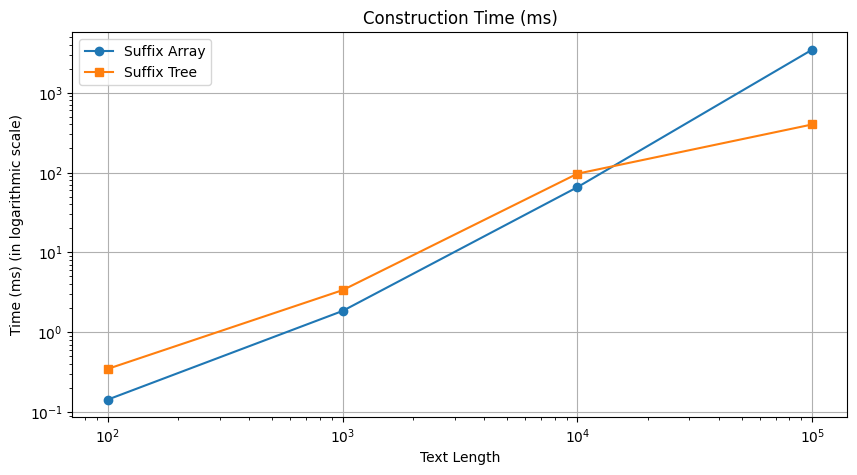

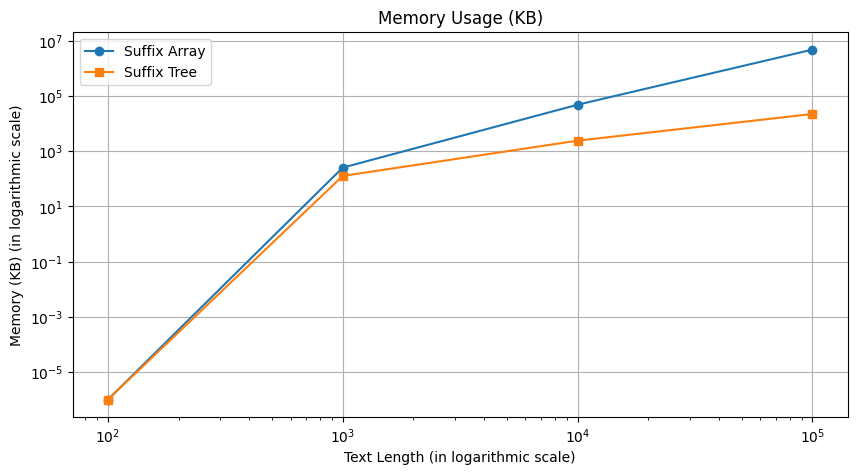

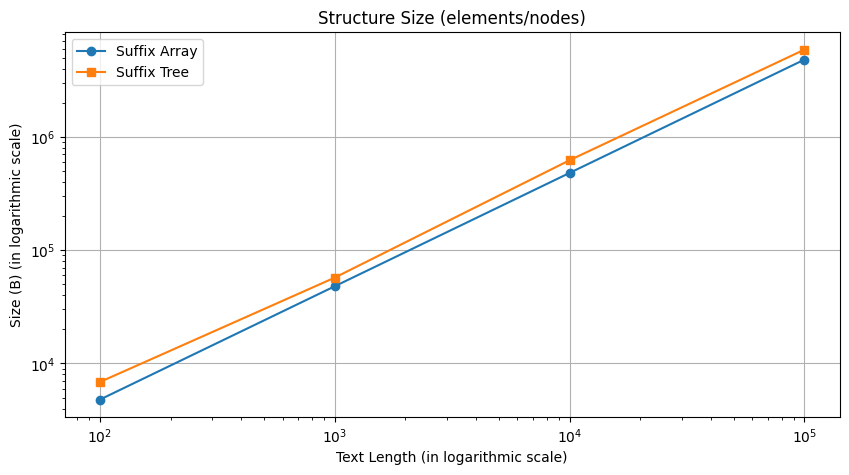

In [ ]:
sa_df.columns = sa_df.columns.astype(int)
st_df.columns = st_df.columns.astype(int)

text_sizes = sa_df.columns.tolist()
sa_label, st_label = 'Suffix Array', 'Suffix Tree'

# Construction Time
plt.figure(figsize=(10, 5))
plt.plot(text_sizes, sa_df.loc["construction_time_ms"], marker='o', label=sa_label)
plt.plot(text_sizes, st_df.loc["construction_time_ms"], marker='s', label=st_label)
plt.title("Construction Time (ms)")
plt.xlabel("Text Length (in logarithmic scale)")
plt.ylabel("Time (ms) (in logarithmic scale)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Memory Usage
plt.figure(figsize=(10, 5))
plt.plot(text_sizes, sa_df.loc["memory_usage_kb"].replace(0, 1e-6), marker='o', label=sa_label)
plt.plot(text_sizes, st_df.loc["memory_usage_kb"].replace(0, 1e-6), marker='s', label=st_label)
plt.title("Memory Usage (KB)")
plt.xlabel("Text Length (in logarithmic scale)")
plt.ylabel("Memory (KB) (in logarithmic scale)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Structure Size
plt.figure(figsize=(10, 5))
plt.plot(text_sizes, sa_df.loc["size"], marker='o', label=sa_label)
plt.plot(text_sizes, st_df.loc["size"], marker='s', label=st_label)
plt.title("Structure Size (elements/nodes)")
plt.xlabel("Text Length (in logarithmic scale)")
plt.ylabel("Size (B) (in logarithmic scale)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()
